In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path
import math
from matplotlib.colors import ListedColormap

from datetime import time, timedelta, datetime, date


plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['figure.dpi'] = 300


# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"

DIR_ABORDAGENS = DIRETORIO_PRINCIPAL / "analise_abordagens"
DIR_GRAFICOS = DIR_ABORDAGENS / "graficos_analise"
DIR_KMEANS = DIRETORIO_PRINCIPAL / "KMeansRandom"
DIR_DICT = DIRETORIO_PRINCIPAL / "DICT"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"



In [2]:
caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
caminho
diretorios = {'dict':DIR_DICT,'kmeans':DIR_KMEANS, 'nmf':DIR_NMF}

nome_abordagem = {'cadastro':"_approach_cadastro", 'doenca':"_approach_doenca",
                  'medidas':"_approach_medidas",'estatistica':"_approach_estatistica",
                 'escolho_doenca':"_approach_escolho_doenca", 'categorias':"_approach_classes",
                 'medidas_masc':"_approach_medidas_masc",'medidas_fem':"_approach_medidas_fem",
                 'medidas_diast':"_approach_medidas_diastolica", 'medidas_sist':"_approach_medidas_sistolica",
                 'medidas_importantes':"_approach_medidas_importantes",
                 'simplificado':"_approach_simplificado" }

In [3]:
analise = 'dict'
print(analise.capitalize())

Dict


In [4]:
from matplotlib.colors import ListedColormap
def grafico_barras_empilhadas(df):
    df.set_index('Cluster')\
      .reindex(df.set_index('Cluster').sum().sort_values().index, axis=1)\
      .T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
              figsize=(12,6))

In [5]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a analise ")

caminho_medidas = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas']}"
caminho_estatistica = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['estatistica']}"
caminho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['doenca']}"
caminho_cadastro = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['cadastro']}"
caminho_escolho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}"
caminho_categorias = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['categorias']}"
caminho_medidas_masc = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_masc']}"
caminho_medidas_fem = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_fem']}"
caminho_medidas_diast = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_diast']}"
caminho_medidas_sist = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_sist']}"
caminho_medidas_importantes = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_importantes']}"
caminho_simplificado = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['simplificado']}"



Informe a analise kmeans


In [6]:
#n = float(input('Digite algo: ').replace(',','.'))

In [7]:
caminho_medidas

WindowsPath('D:/Projeto_PA/Projeto_PA_validado/KMeansRandom/KMEANS_approach_medidas')

In [8]:
# 3 Abordagens

abordagem_cadastro    = list()
abordagem_medidas     = list()
abordagem_estatistica = list()
abordagem_doenca      = list()
abordagem_escolho_doenca = list()
abordagem_categorias  = list()
abordagem_medidas_masc = list()
abordagem_medidas_fem   = list()
abordagem_medidas_importantes   = list()
abordagem_simplificado    = list()

try:
    grupo_leitura = 1
    while 1:

        abordagem_estatistica.append(pd.read_csv(f"{caminho_estatistica}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1   
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas.append(pd.read_csv(f"{caminho_medidas}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_doenca.append(pd.read_csv(f"{caminho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1
except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_cadastro.append(pd.read_csv(f"{caminho_cadastro}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_escolho_doenca.append(pd.read_csv(f"{caminho_escolho_doenca}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_categorias.append(pd.read_csv(f"{caminho_categorias}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_masc.append(pd.read_csv(f"{caminho_medidas_masc}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_fem.append(pd.read_csv(f"{caminho_medidas_fem}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_medidas_importantes.append(pd.read_csv(f"{caminho_medidas_importantes}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass

try:
    grupo_leitura = 1
    while 1:

        abordagem_simplificado.append(pd.read_csv(f"{caminho_simplificado}_grupo_{grupo_leitura}.csv", sep=";", encoding='latin1'))
        grupo_leitura += 1

except:
    pass



In [9]:
abordagem_categorias[0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,6,1999-03-23,M,19.0,100.0,197,25.8,2018-12-26 08:06:19,1,147.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
1,9,1982-04-28,M,36.0,100.0,185,29.2,2018-12-26 09:56:35,1,152.0,...,104.5,11583.0,8198.0,2783.5,558.5,10.83,12.82,37,52,1.051359
2,11,1974-04-29,M,44.0,81.0,176,26.1,2018-12-26 10:01:51,1,100.0,...,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7,1.050556
3,17,1976-05-20,M,42.0,87.0,175,28.4,2018-12-26 10:12:44,1,145.0,...,88.5,10621.0,7194.0,2801.0,610.0,17.55,14.13,20,26,0.922891
4,19,1981-12-16,M,37.0,85.0,164,31.6,2018-12-26 10:18:07,1,140.0,...,79.5,9837.0,6359.5,3002.0,470.0,13.82,11.01,10,16,1.039121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,21771,1972-12-11,F,47.0,63.0,"1,58",25.2,2020-09-10 14:09:58,1,125.0,...,81.5,10659.0,6608.0,3437.0,567.5,10.07,7.81,11,10,1.093419
3363,21772,1984-06-20,M,36.0,84.0,180,25.9,2020-09-10 14:18:12,1,124.0,...,78.0,9520.5,6376.0,2629.0,475.5,10.08,8.03,5,6,1.093462
3364,21787,1970-10-19,M,49.0,90.0,183,26.9,2020-09-10 16:21:02,1,114.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
3365,21788,1985-03-15,F,35.0,93.0,167,33.3,2020-09-10 16:44:53,1,107.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243


In [10]:
abordagem_medidas[0].loc[:,['IMC','Hipotensao']]

,IMC,Hipotensao
0,40.6,True
1,29.4,True
2,26.1,True
3,24.0,True
4,23.6,True
...,...,...
4121,25.9,True
4122,28.1,True
4123,22.4,True
4124,33.0,True


In [11]:
#print(f"{caminho_doenca}_grupo_{1}.csv")
#print(f"{caminho_medidas}_grupo_{1}.csv")
#print(f"{caminho_estatistica}_grupo_{1}.csv")
#print(f"{caminho_cadastro}_grupo_{1}.csv")

In [12]:
#  variáveis

# Valores de Referência Normal das Sistólicas e Diastólicas
max_sist = 140
min_sist = 100
max_diast = 90
min_diast = 60

# PERÍODOS 
#      Matutino 6h-8h59       Dataset 6h-8h45
#      Diurno 9h-20h59                9h-20h45
#      Vespertino 21h-22h59           21h-22h45
#      Noturno 23h-05h59              23h-5h30

matutino = (time(6,0), time(9,0))
diurno = (time(9,0), time(21,0))
vespertino = (time(21,0), time(1,0))
noturno = (time(1,0), time(6,0))

# Identificando o intervalo de todas as PASs e todas as PADs
#sist = mapas.loc[:,'sist 9:00':'sist 8:45']
#diast = mapas.loc[:,'diast 9:00':'diast 8:45']



In [13]:
def media_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'sist 6:00':'sist 8:45'],
                   medidas.loc[:,'sist 9:00':'sist 20:45'],
                   medidas.loc[:,'sist 21:00':'sist 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_sistolica_noite(medidas):
    dados = medidas.loc[:,'sist 23:00':'sist 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_dia(medidas):
    dados = pd.concat([medidas.loc[:,'diast 6:00':'diast 8:45'],
                   medidas.loc[:,'diast 9:00':'diast 20:45'],
                   medidas.loc[:,'diast 21:00':'diast 22:45']],axis=1)
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def media_diastolica_noite(medidas):
    dados = medidas.loc[:,'diast 23:00':'diast 5:30']
    return(np.round(np.mean(np.mean(dados,axis=1)),2))

def variancia_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def variancia_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.var(dados,axis=1)),2))

def mediana_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.median(np.median(dados,axis=1)))

def mediana_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.median(np.median(dados,axis=1)))

def auc_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def auc_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.trapz(dados,axis=1)),2))

def desvio_sistolica(medidas):
    dados = medidas.loc[:,'sist 9:00':'sist 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))

def desvio_diastolica(medidas):
    dados = medidas.loc[:,'diast 9:00':'diast 8:45']
    return(np.round(np.mean(np.std(dados,axis=1)),2))

def descenso_noturno(medidas):
    dados = medidas.loc[:,'Diferença % Dipping'].dropna()
    dados = dados - 1
    return np.round(np.mean(dados) * 100,2)


lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                 'DP Sistolica em 24h','DP Diastolica em 24h','Descenso Noturno']

funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
           media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
          auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica,descenso_noturno]

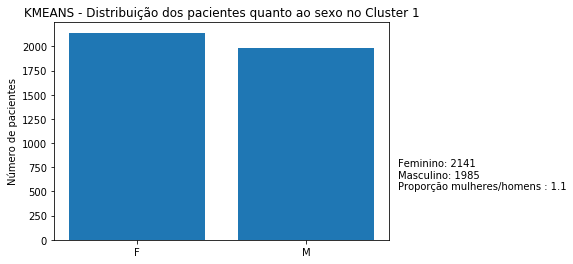

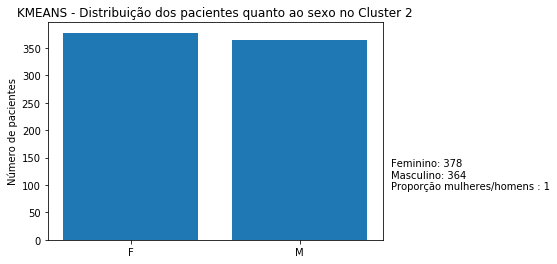

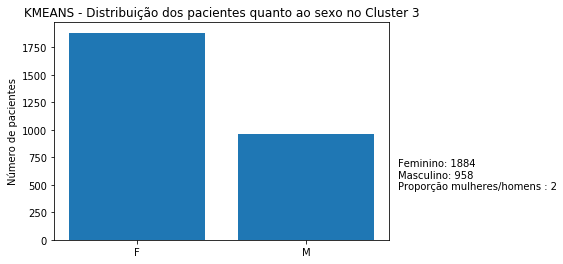

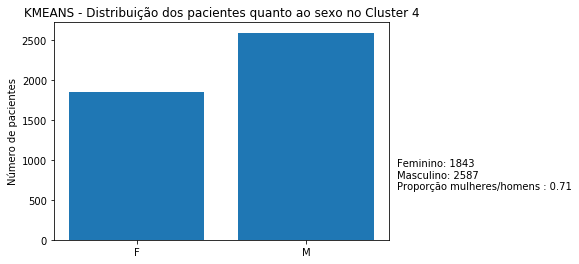

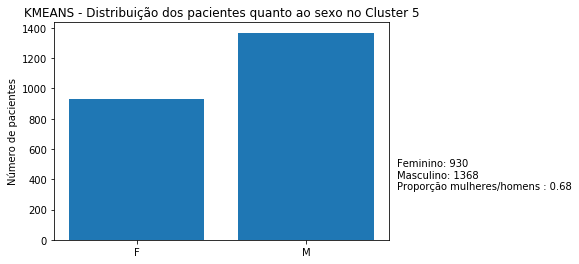

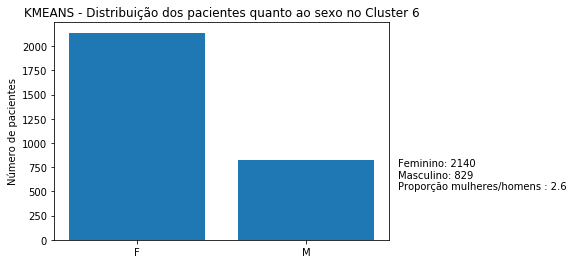

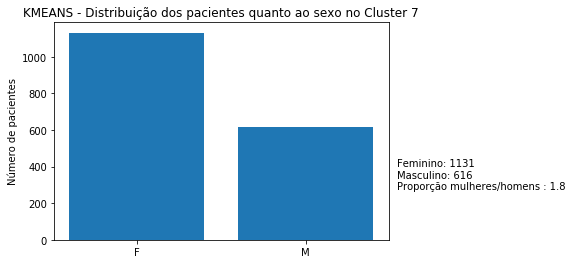

In [14]:
try:    
    def plota_histograma_genero(dados,grupo):

        gender = dados['genero'].value_counts()
        gender = gender[["F", "M"]]
        plt.bar(gender.index,gender)
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos pacientes quanto ao sexo no Cluster {grupo}', ylabel='Número de pacientes')

        legenda = f"Feminino: {gender['F']:n}\nMasculino: {gender['M']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, na variável da esquerda:
        # a = 10; a += 5 , resulta em a == 15
        legenda += "\n" + f"Proporção mulheres/homens : { gender['F'] / gender['M']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_sexo" / f"grafico_distribuicao_sexo_cluster{grupo}.svg", bbox_inches='tight')
        plt.show()

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_genero(abordagem_medidas[grupo],grupo + 1)
except:
    pass

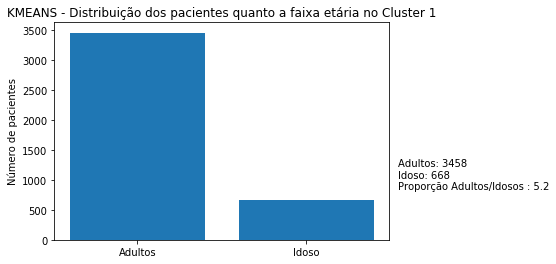

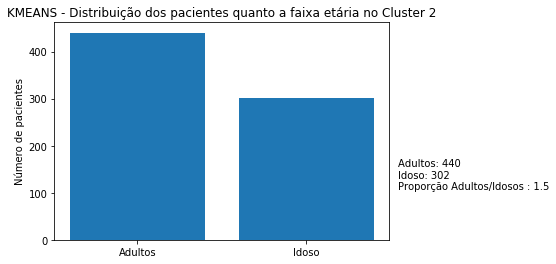

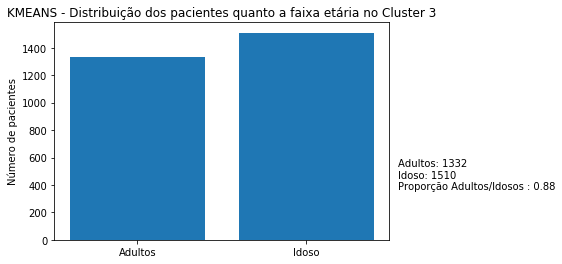

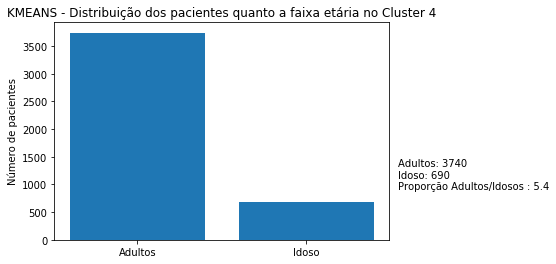

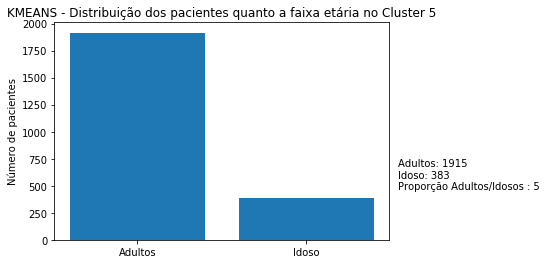

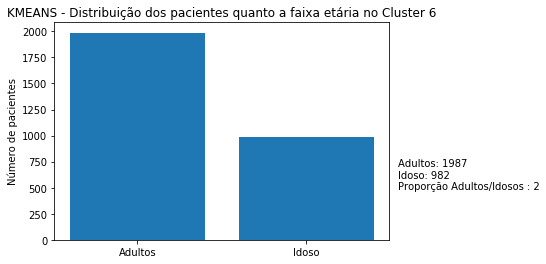

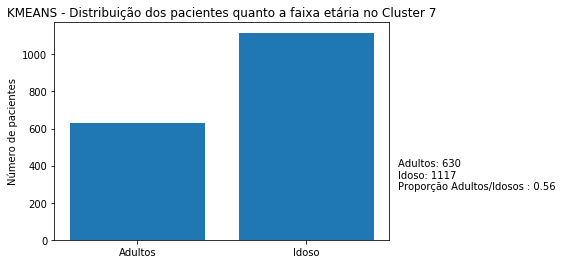

In [15]:

def faixas_etarias(idade):
    classes = ["Adultos","Idoso"]
    intervalos = [(0, 65),(65, 200)]
    #classes = ["Adultos","Meia-idade","Idoso"]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

try:    
    def plota_histograma_idade(dados,grupo):
        faixa_idade = dados['idade']
        faixa_idade = faixa_idade.apply(faixas_etarias)
        faixa_idade = faixa_idade.value_counts()
        faixa_idade = faixa_idade[['Adultos','Idoso']]
        plt.bar(faixa_idade.index,faixa_idade)
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos pacientes quanto a faixa etária no Cluster {grupo}', ylabel='Número de pacientes')
        legenda = f"Adultos: {faixa_idade['Adultos']:n}\nIdoso: {faixa_idade['Idoso']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, na variável da esquerda:
        # a = 10; a += 5 , resulta em a == 15
        legenda += "\n" + f"Proporção Adultos/Idosos : { faixa_idade['Adultos'] / faixa_idade['Idoso']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_idade" / f"grafico_distribuicao_idade_cluster{grupo}.svg", bbox_inches='tight')
        plt.show()
        

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_idade(abordagem_medidas[grupo],grupo + 1)
except:
    pass

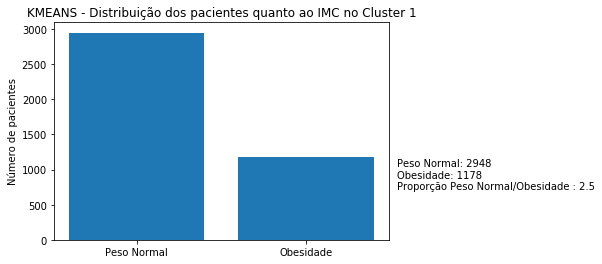

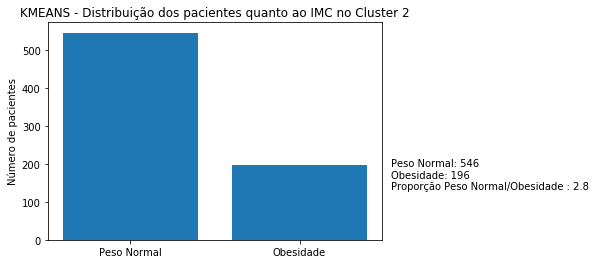

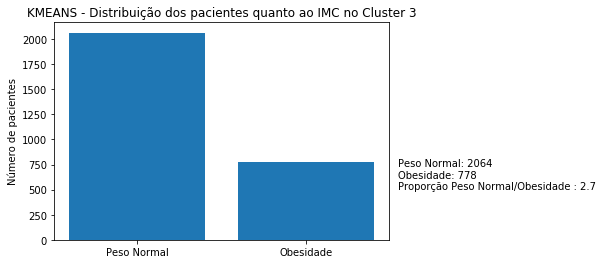

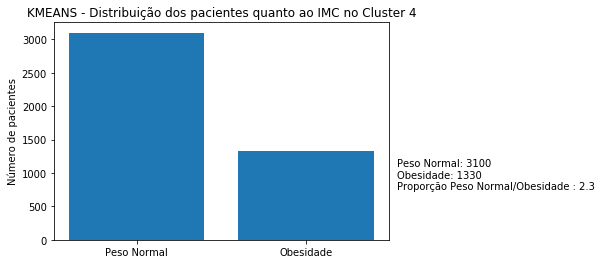

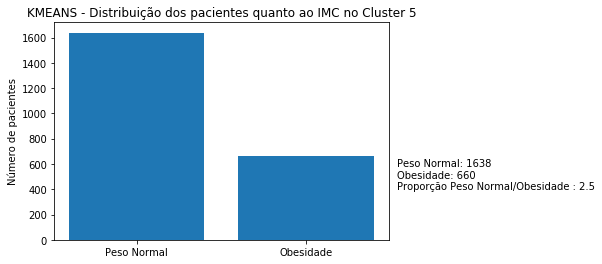

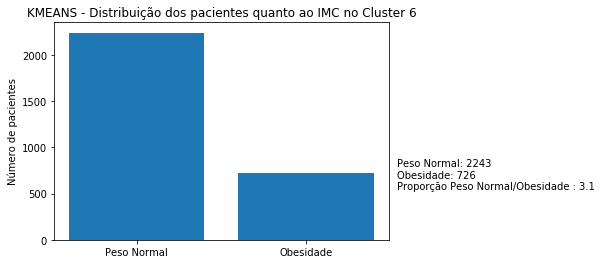

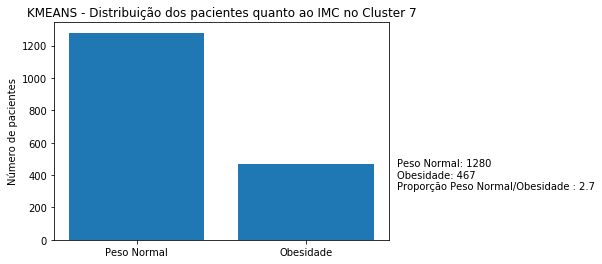

In [16]:
def faixas_imc(imc):
    classes = ["Peso Normal","Obesidade"]
    intervalos = [(0, 30),(30, 1000)]
    #classes = ["Peso Normal","Sobrepeso", "Obesimc"]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = ["baixo peso","normal","sobrepeso","obesimc grau I","obesimc grau II","obesimc Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]


try:    
    def plota_histograma_imc(dados,grupo):
        faixa_imc = dados['IMC']
        faixa_imc = faixa_imc.apply(faixas_imc)
        faixa_imc = faixa_imc.value_counts()
        faixa_imc = faixa_imc[["Peso Normal","Obesidade"]]
        plt.bar(faixa_imc.index,faixa_imc)
        plt.gca().set(title=f'{algoritmo.upper()} - Distribuição dos pacientes quanto ao IMC no Cluster {grupo}', ylabel='Número de pacientes')
        legenda = f"Peso Normal: {faixa_imc['Peso Normal']:n}\nObesidade: {faixa_imc['Obesidade']:n}"
        # Os operadores aumentados '+=', '-=', etc... fazem uma operação com, e guardam o resultado de volta, na variável da esquerda:
        # a = 10; a += 5 , resulta em a == 15
        legenda += "\n" + f"Proporção Peso Normal/Obesidade : { faixa_imc['Peso Normal'] / faixa_imc['Obesidade']:.02n}"
        plt.gcf().text(0.92, 0.3, legenda, fontsize=10)
        plt.savefig(DIR_GRAFICOS / "grafico_imc" / f"grafico_distribuicao_imc_cluster{grupo}.svg", bbox_inches='tight')
        plt.show()
        

    for grupo in range(len(abordagem_medidas)):
        plota_histograma_imc(abordagem_medidas[grupo],grupo + 1)
except:
    pass

## Qtd da Abordagem Estatísitica

In [17]:
try:
    qtd_estatistica = pd.DataFrame()

    qtd_estatistica['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_estatistica) + 1)]
    qtd_estatistica['QTD Pacientes'] = [len(n) for n in abordagem_estatistica]

    total_pacientes = np.sum([len(n) for n in abordagem_estatistica])

    qtd_estatistica['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_estatistica]


    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_estatistica)):
            lista_analise.append(funcao[analise](abordagem_estatistica[grupo]))

        qtd_estatistica[lista_calculo[analise]] = lista_analise

    qtd_estatistica = qtd_estatistica.T.reset_index()
    qtd_estatistica.columns = qtd_estatistica.iloc[0,:]
    qtd_estatistica = qtd_estatistica.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_estatistica.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_estatistica.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [18]:
qtd_estatistica

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,2206,4450,1692,4375,2641,3222,568
2,QTD Pacientes %,11.52,23.23,8.83,22.84,13.79,16.82,2.97
3,Media Sistolica em 24h,133.53,115.8,139.46,126.17,106.88,119.74,154
4,Media Diastolica em 24h,74.88,76.76,93.36,83.62,66.14,67.86,86.12
5,Media Sistolica Daytime,135.06,117.35,141.15,127.91,108.22,121.19,155.29
6,Media Sistolica Nighttime,126.08,108.28,131.28,117.76,100.4,112.66,147.73
7,Media Diastolica Daytime,76.24,78.58,95.22,85.56,67.61,69.25,87.4
8,Media Diastolica Nighttime,68.3,67.91,84.29,74.19,59.01,61.1,79.92
9,Variancia Sistolica em 24h,258.06,134.77,208.2,169.34,124.98,186.54,380.46
10,Variancia Diastolica em 24h,119.5,109.38,143.59,124.55,92.23,105.29,157.12


In [19]:
#descenso_noturno(abordagem_estatistica[0])
abordagem_estatistica[0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,6,1999-03-23,M,19.0,100.0,197,25.8,1,2018-12-26 08:06:19,147.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
1,7,1978-01-26,F,40.0,65.0,"1,64",24.2,1,2018-12-26 08:19:06,140.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
2,15,1933-02-16,F,85.0,68.0,151,29.8,1,2018-12-26 10:08:12,166.0,...,74.0,11307.5,6435.5,3922.0,868.5,16.56,9.47,26,4,0.999183
3,20,1941-04-05,M,77.0,60.0,164,22.3,1,2018-12-26 10:20:31,152.0,...,76.0,10476.5,6266.5,3370.0,780.5,18.99,11.46,19,11,0.913632
4,26,1952-04-20,F,66.0,58.0,148,26.5,1,2018-12-26 10:50:47,164.0,...,81.5,11514.5,6473.0,4025.5,959.0,20.72,17.77,37,28,1.085636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,21740,1963-06-26,F,57.0,68.0,160,26.6,1,2020-09-10 09:17:34,144.0,...,78.0,10441.0,6321.5,3398.0,694.5,19.42,12.11,16,13,1.074915
2202,21742,1943-04-24,F,77.0,44.0,"1,63",16.6,1,2020-09-10 09:20:57,154.0,...,72.0,11287.0,5824.0,4629.5,794.5,18.89,11.87,33,16,1.167201
2203,21754,1953-12-20,F,66.0,68.0,158,27.2,1,2020-09-10 10:44:17,155.0,...,72.0,10624.0,5794.0,4007.5,802.5,18.89,12.24,26,19,1.114660
2204,21771,1972-12-11,F,47.0,63.0,"1,58",25.2,1,2020-09-10 14:09:58,125.0,...,81.5,10659.0,6608.0,3437.0,567.5,10.07,7.81,11,10,1.093419


## Qtd da Abordagem Doença

In [20]:
# Quantidade da abordagem por doença
try:
    lista_doencas = list(abordagem_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_doencas = pd.DataFrame()

    qtd_doencas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_doenca) + 1)]

    total_pacientes = np.sum([len(n) for n in abordagem_doenca])

    qtd_doencas['QTD Pacientes'] = [len(n) for n in abordagem_doenca]

    qtd_doencas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_doenca]

    for doenca in lista_doencas:
        lista_qtd = []
        lista_porcentagem = []
        for grupo in range(len(abordagem_doenca)):
            lista_qtd.append(len(abordagem_doenca[grupo][abordagem_doenca[grupo][doenca] == True]))
            lista_porcentagem.append(round(lista_qtd[grupo]/len(abordagem_doenca[grupo][doenca]) * 100,2))
        qtd_doencas[doenca] = lista_qtd
        qtd_doencas[f'{doenca} %'] = lista_porcentagem
    
    lista_descenso = []
    for grupo in range(len(abordagem_doenca)):
        lista_descenso.append(descenso_noturno(abordagem_doenca[grupo]))
    
    qtd_doencas['Descenso Noturno %'] = lista_descenso
        
    qtd_doencas = qtd_doencas.T.reset_index()
    qtd_doencas.columns = qtd_doencas.iloc[0,:]
    qtd_doencas = qtd_doencas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_doencas.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [21]:
qtd_doencas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,1934,5813,2860,2071,2870,2290,1316
2,QTD Pacientes %,10.1,30.35,14.93,10.81,14.98,11.96,6.87
3,Hipotensao,1912,4857,2513,1837,2753,2110,1275
4,Hipotensao %,98.86,83.55,87.87,88.7,95.92,92.14,96.88
5,Sistolica Isolada,1,4,6,0,11,1,0
6,Sistolica Isolada %,0.05,0.07,0.21,0,0.38,0.04,0
7,Diastolica Isolada,3,34,12,1,30,1,0
8,Diastolica Isolada %,0.16,0.58,0.42,0.05,1.05,0.04,0
9,Dipping,1934,0,0,2070,0,2290,0
10,Dipping %,100,0,0,99.95,0,100,0


## Qtd da Abordagem Cadastro

In [22]:
def faixas_imc(imc):
    classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    
#    classes = ["baixo peso","normal","sobrepeso","obesidade grau I","obesidade grau II","obesidade Grau III"]
#    intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias(idade):
    classes = ["Adultos","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    
#    classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
#    intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

In [23]:
def faixa_genero(cadastro):
    total = len(cadastro)
    masculino = len(cadastro[cadastro['genero'] == 'M'])
    feminino = len(cadastro[cadastro['genero'] == 'F'])
    indeterminado = total - masculino - feminino
    faixas = [masculino, np.round(masculino/total * 100, 2),feminino, np.round(feminino/total * 100, 2)]
    return faixas

lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]

In [24]:
# Quantidade da abordagem por dados cadastrais
try:
    qtd_dados_cadastrais = pd.DataFrame()

    qtd_dados_cadastrais['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_cadastro) + 1)]
    qtd_dados_cadastrais['QTD Pacientes'] = [len(n) for n in abordagem_cadastro]
    total_pacientes = np.sum([len(n) for n in abordagem_cadastro])
    qtd_dados_cadastrais['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_cadastro]
    lista_total_grupos = [len(i) for i in abordagem_cadastro]
    lista_total_grupos = np.array(lista_total_grupos)

    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[]]
    for grupo in range(len(abordagem_cadastro)):
        resultado = faixa_genero(abordagem_cadastro[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_cadastrais[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['idade']
                                                              .apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
#################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()

        for grupo in range(len(abordagem_cadastro)):
            lista_grupos.append(len(abordagem_cadastro[grupo][abordagem_cadastro[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_dados_cadastrais[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_cadastrais[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    #qtd_dados_cadastrais['Não obeso'] = qtd_dados_cadastrais['Peso Normal'] + qtd_dados_cadastrais['Sobrepeso']
    
    lista_descenso = []
    for grupo in range(len(abordagem_cadastro)):
        lista_descenso.append(descenso_noturno(abordagem_cadastro[grupo]))
    
    qtd_dados_cadastrais['Descenso Noturno %'] = lista_descenso
    
    qtd_dados_cadastrais = qtd_dados_cadastrais.T.reset_index()
    qtd_dados_cadastrais.columns = qtd_dados_cadastrais.iloc[0,:]
    qtd_dados_cadastrais = qtd_dados_cadastrais.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_cadastrais.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_cadastro.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [25]:
qtd_dados_cadastrais

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,1934,5813,2860,2071,2870,2290,1316
2,QTD Pacientes %,10.1,30.35,14.93,10.81,14.98,11.96,6.87
3,Masculino,909,2566,1144,1095,1268,1082,643
4,Masculino %,47,44.14,40,52.87,44.18,47.25,48.86
5,Feminino,1025,3247,1716,976,1602,1208,673
6,Feminino %,53,55.86,60,47.13,55.82,52.75,51.14
7,Adultos,938,2168,589,1162,1161,899,600
8,Adultos %,48.5,37.3,20.59,56.11,40.45,39.26,45.59
9,Meia-idade,653,1834,802,577,944,728,447
10,Meia-idade %,33.76,31.55,28.04,27.86,32.89,31.79,33.97


## Qtd da Abordagem Medidas

In [26]:
# Quantidade da abordagem por medidas
try:
    qtd_dados_medidas = pd.DataFrame()

    qtd_dados_medidas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas) + 1)]
    qtd_dados_medidas['QTD Pacientes'] = [len(n) for n in abordagem_medidas]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas])
    qtd_dados_medidas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas]
    lista_total_grupos = [len(i) for i in abordagem_medidas]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas)):
        resultado = faixa_genero(abordagem_medidas[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["peso normal","sobrepeso", "obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    qtd_dados_medidas['Não obeso'] = qtd_dados_medidas['Peso Normal'] + qtd_dados_medidas['Sobrepeso']
    qtd_dados_medidas['Não obeso %'] =  np.round(qtd_dados_medidas['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas)):
            lista_analise.append(funcao[analise](abordagem_medidas[grupo]))

        qtd_dados_medidas[lista_calculo[analise]] = lista_analise
    
    lista_descenso = []
    for grupo in range(len(abordagem_medidas)):
        lista_descenso.append(descenso_noturno(abordagem_medidas[grupo]))

    qtd_dados_medidas['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_sem_T = qtd_dados_medidas
    qtd_dados_medidas = qtd_dados_medidas.T.reset_index()
    qtd_dados_medidas.columns = qtd_dados_medidas.iloc[0,:]
    qtd_dados_medidas = qtd_dados_medidas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [27]:
qtd_dados_medidas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,4126,742,2842,4430,2298,2969,1747
2,QTD Pacientes %,21.54,3.87,14.84,23.13,12,15.5,9.12
3,Masculino,1985,364,958,2587,1368,829,616
4,Masculino %,48.11,49.06,33.71,58.4,59.53,27.92,35.26
5,Feminino,2141,378,1884,1843,930,2140,1131
6,Feminino %,51.89,50.94,66.29,41.6,40.47,72.08,64.74
7,Adultos,2037,200,603,2241,1122,1096,218
8,Adultos %,49.37,26.95,21.22,50.59,48.83,36.91,12.48
9,Meia-idade,1421,240,729,1499,793,891,412
10,Meia-idade %,34.44,32.35,25.65,33.84,34.51,30.01,23.58


In [28]:
abordagem_medidas[0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,8,1990-03-07,M,28.0,120.0,172,40.6,1,2018-12-26 08:26:59,113.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
1,10,1965-09-18,M,53.0,89.0,174,29.4,1,2018-12-26 09:59:12,122.0,...,76.0,9821.5,6122.5,3111.5,538.0,10.51,10.24,5,10,1.015233
2,11,1974-04-29,M,44.0,81.0,176,26.1,1,2018-12-26 10:01:51,100.0,...,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7,1.050556
3,13,1963-06-23,F,55.0,60.0,158,24.0,1,2018-12-26 10:04:36,131.0,...,70.0,9767.5,6112.0,3093.0,506.0,19.92,15.62,19,22,1.184304
4,21,1960-07-07,F,58.0,53.0,150,23.6,1,2018-12-26 10:23:39,123.0,...,78.0,9521.0,6284.0,2655.5,535.5,11.75,8.63,7,6,0.976355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,21772,1984-06-20,M,36.0,84.0,180,25.9,1,2020-09-10 14:18:12,124.0,...,78.0,9520.5,6376.0,2629.0,475.5,10.08,8.03,5,6,1.093462
4122,21775,1955-09-04,M,65.0,94.0,"1,83",28.1,1,2020-09-10 14:40:03,105.0,...,78.0,9742.5,6171.5,2984.5,546.0,14.42,8.85,13,6,1.020233
4123,21782,1979-05-23,F,41.0,56.0,"1,58",22.4,1,2020-09-10 15:31:01,121.0,...,83.0,9108.0,6613.5,2069.5,391.5,14.49,12.30,19,13,1.181546
4124,21783,1969-05-24,M,51.0,93.0,168,33.0,1,2020-09-10 15:40:30,119.0,...,74.0,9121.5,5963.5,2605.0,513.0,14.69,11.86,17,16,1.214029


## QTD DOENÇA Sem HIPOTENSÃO e NORMOTENSO

In [29]:
# Quantidade da abordagem por range de doença sem Hipertensão e sem Normotenso
try:
    
    lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Sistolica Isolada':'Whitecoat'].columns)
    # lista_escolho_doenca = list(abordagem_escolho_doenca[0].loc[:,'Hipotensao':'Normotenso'].columns)

    qtd_escolho_doenca = pd.DataFrame()

    qtd_escolho_doenca['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_escolho_doenca) + 1)]
    
    total_pacientes = np.sum([len(n) for n in abordagem_escolho_doenca])

    qtd_escolho_doenca['QTD Pacientes'] = [len(n) for n in abordagem_escolho_doenca]

    qtd_escolho_doenca['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_escolho_doenca]

    for doenca in lista_escolho_doenca:
        lista_qtd_escolho_doenca = []
        lista_porcentagem_escolho_doenca = []
        for grupo in range(len(abordagem_escolho_doenca)):
            lista_qtd_escolho_doenca.append(len(abordagem_escolho_doenca[grupo][abordagem_escolho_doenca[grupo][doenca] == True]))
            lista_porcentagem_escolho_doenca.append(round(lista_qtd_escolho_doenca[grupo]/len(abordagem_escolho_doenca[grupo][doenca]) * 100,2))
        
        qtd_escolho_doenca[doenca] = lista_qtd_escolho_doenca
        qtd_escolho_doenca[f'{doenca} %'] = lista_porcentagem_escolho_doenca

    lista_descenso = []
    for grupo in range(len(abordagem_escolho_doenca)):
        lista_descenso.append(descenso_noturno(abordagem_escolho_doenca[grupo]))
    
    qtd_escolho_doenca['Descenso Noturno %'] = lista_descenso
    
    qtd_escolho_doenca = qtd_escolho_doenca.T.reset_index()
    qtd_escolho_doenca.columns = qtd_escolho_doenca.iloc[0,:]
    qtd_escolho_doenca = qtd_escolho_doenca.iloc[1:,:]

    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_escolho_doenca.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_escolho_doenca.csv", 
                            sep=";", encoding="latin1", index=False)
except:
    pass

In [30]:
abordagem_escolho_doenca[0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,11,1974-04-29,M,44.0,81.0,176,26.1,1,2018-12-26 10:01:51,100.0,...,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7,1.050556
1,12,1994-11-26,M,24.0,65.0,175,21.2,1,2018-12-26 10:04:10,117.0,...,63.0,9116.5,5149.0,3268.0,655.5,8.93,9.65,10,28,1.057488
2,31,1963-01-20,F,55.0,62.0,165,22.8,1,2018-12-26 13:19:42,113.0,...,75.0,10023.0,6001.5,3319.0,646.5,9.13,7.20,3,0,1.041423
3,33,1982-09-03,F,36.0,71.0,163,26.7,1,2018-12-26 13:50:59,108.0,...,68.0,9739.0,5426.5,3495.5,767.0,11.64,11.94,7,23,1.054230
4,34,1957-06-24,M,61.0,72.0,"1,74",23.8,1,2018-12-26 14:20:27,134.0,...,79.5,9624.0,6421.5,2602.5,554.0,14.21,10.27,11,14,1.007642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,21746,1953-02-19,M,67.0,60.0,161,23.1,1,2020-09-10 09:54:05,120.0,...,67.0,10003.0,5389.0,3829.5,720.0,16.97,8.39,14,13,1.020118
2866,21753,1944-11-03,F,75.0,73.0,"1,55",30.4,1,2020-09-10 10:34:54,132.0,...,77.0,9324.0,6043.5,2640.0,589.5,12.56,12.64,8,14,1.065510
2867,21755,1953-12-11,F,66.0,60.0,163,22.6,1,2020-09-10 10:48:47,125.0,...,72.0,8914.5,5700.5,2634.0,548.5,11.13,8.90,18,12,1.053598
2868,21759,1975-04-06,M,45.0,124.0,"1,85",36.2,1,2020-09-10 11:18:49,136.0,...,70.0,8506.5,5569.0,2380.5,531.0,12.99,12.50,19,18,1.074546


In [31]:
#lista_descenso = []
#for grupo in range(len(abordagem_escolho_doenca)):
#    lista_descenso.append(descenso_noturno(abordagem_escolho_doenca[grupo]))
#lista_descenso

In [32]:
qtd_escolho_doenca

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,2870,1934,2860,5813,2071,2290,1316
2,QTD Pacientes %,14.98,10.1,14.93,30.35,10.81,11.96,6.87
3,Sistolica Isolada,11,1,6,4,0,1,0
4,Sistolica Isolada %,0.38,0.05,0.21,0.07,0,0.04,0
5,Diastolica Isolada,30,3,12,34,1,1,0
6,Diastolica Isolada %,1.05,0.16,0.42,0.58,0.05,0.04,0
7,Dipping,0,1934,0,0,2070,2290,0
8,Dipping %,0,100,0,0,99.95,100,0
9,Non Dipping,2870,0,0,5813,0,0,0
10,Non Dipping %,100,0,0,100,0,0,0


In [33]:
df = abordagem_escolho_doenca[0]
df[(df['Dipping'] == False) & (df['Non Dipping'] == False)]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping


## QTD da Abordagem CATEGORIA

In [34]:
# Quantidade dos dados cadastrais
try:
    qtd_categoria = pd.DataFrame()

    qtd_categoria['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_categorias) + 1)]
    qtd_categoria['QTD Pacientes'] = [len(n) for n in abordagem_categorias]
    total_pacientes = np.sum([len(n) for n in abordagem_categorias])
    qtd_categoria['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_categorias]
    lista_total_grupos = [len(i) for i in abordagem_categorias]
    lista_total_grupos = np.array(lista_total_grupos)
    
#  SEXO
    # lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %','Indeterminado','Indeterminado %']
    lista_sexo = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_sexo = [[],[],[],[]]
    for grupo in range(len(abordagem_categorias)):
        resultado = faixa_genero(abordagem_categorias[grupo])
        colunas_sexo[0].append(resultado[0])
        colunas_sexo[1].append(resultado[1])
        colunas_sexo[2].append(resultado[2])
        colunas_sexo[3].append(resultado[3])

    for faixa in range(len(lista_sexo)):
        qtd_categoria[lista_sexo[faixa]] = colunas_sexo[faixa]
        
#   IDADE
    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_idade[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#   IMC
    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
#####################################################################################    
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()

        for grupo in range(len(abordagem_categorias)):
            lista_grupos.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))

        np.array(lista_grupos)
        qtd_categoria[lista_faixa_imc[faixa]] = lista_grupos
        qtd_categoria[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

#################################################################
#   Quantidade e % das ESTATÍSTICAS
    lista_calculo_categorias = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise_categorias in range(len(lista_calculo_categorias)):
        lista_analise_categorias = list()
        for grupo in range(len(abordagem_categorias)):
            lista_analise_categorias.append(funcao[analise_categorias](abordagem_categorias[grupo]))
            
        qtd_categoria[lista_calculo_categorias[analise_categorias]] = lista_analise_categorias

#
###############################################################
# Quantidade e % das DOENÇAS em cada grupo
    lista_doencas_categoria = list(abordagem_categorias[0].loc[:,'Hipotensao':'Normotenso'].columns)
    for doenca_categoria in lista_doencas_categoria:
        print (doenca_categoria)
        lista_qtd_categoria = []
        lista_porcentagem_categoria = []
        for grupo in range(len(abordagem_categorias)):
###################################################################################################################
            lista_qtd_categoria.append(len(abordagem_categorias[grupo][abordagem_categorias[grupo][doenca_categoria] == True]))
            lista_porcentagem_categoria.append(round(lista_qtd_categoria[grupo]/len(abordagem_categorias[grupo][doenca_categoria]) * 100,2))
        qtd_categoria[doenca_categoria] = lista_qtd_categoria
        qtd_categoria[f'{doenca_categoria} %'] = lista_porcentagem_categoria


    #qtd_categoria = qtd_categoria.T.reset_index()
    #qtd_categoria.columns = qtd_categoria.iloc[0,:]
    #qtd_categoria = qtd_categoria.iloc[1:,:]
    
    lista_descenso = []
    for grupo in range(len(abordagem_categorias)):
        lista_descenso.append(descenso_noturno(abordagem_categorias[grupo]))
    
    qtd_categoria['Descenso Noturno %'] = lista_descenso
    qtd_categoria_sem_T = qtd_categoria
    qtd_categoria = qtd_categoria.T.reset_index()
    qtd_categoria.columns = qtd_categoria.iloc[0,:]
    qtd_categoria = qtd_categoria.iloc[1:,:]
    
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_categoria.to_csv(DIR_ABORDAGENS / f"{algoritmo.upper()}_qtd_approach_categorias.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

Hipotensao
Sistolica Isolada
Diastolica Isolada
Dipping
Non Dipping
Extreme Dipping
Reverse Dipping
Morning Surge
Masked
Whitecoat
Normotenso


In [35]:
 qtd_categoria

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,3367,2502,3852,2127,2268,2155,2883
2,QTD Pacientes %,17.58,13.06,20.11,11.1,11.84,11.25,15.05
3,Masculino,1924,913,1616,1486,862,751,1155
4,Masculino %,57.14,36.49,41.95,69.86,38.01,34.85,40.06
5,Feminino,1443,1589,2236,641,1406,1404,1728
6,Feminino %,42.86,63.51,58.05,30.14,61.99,65.15,59.94
7,Adultos,3367,0,0,1262,0,1152,1736
8,Adultos %,100,0,0,59.33,0,53.46,60.22
9,Meia-idade,0,0,2121,811,903,1003,1147
10,Meia-idade %,0,0,55.06,38.13,39.81,46.54,39.78


In [36]:
abordagem_categorias[0]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,6,1999-03-23,M,19.0,100.0,197,25.8,2018-12-26 08:06:19,1,147.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
1,9,1982-04-28,M,36.0,100.0,185,29.2,2018-12-26 09:56:35,1,152.0,...,104.5,11583.0,8198.0,2783.5,558.5,10.83,12.82,37,52,1.051359
2,11,1974-04-29,M,44.0,81.0,176,26.1,2018-12-26 10:01:51,1,100.0,...,74.0,9001.5,5952.5,2469.5,525.5,8.59,8.47,8,7,1.050556
3,17,1976-05-20,M,42.0,87.0,175,28.4,2018-12-26 10:12:44,1,145.0,...,88.5,10621.0,7194.0,2801.0,610.0,17.55,14.13,20,26,0.922891
4,19,1981-12-16,M,37.0,85.0,164,31.6,2018-12-26 10:18:07,1,140.0,...,79.5,9837.0,6359.5,3002.0,470.0,13.82,11.01,10,16,1.039121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,21771,1972-12-11,F,47.0,63.0,"1,58",25.2,2020-09-10 14:09:58,1,125.0,...,81.5,10659.0,6608.0,3437.0,567.5,10.07,7.81,11,10,1.093419
3363,21772,1984-06-20,M,36.0,84.0,180,25.9,2020-09-10 14:18:12,1,124.0,...,78.0,9520.5,6376.0,2629.0,475.5,10.08,8.03,5,6,1.093462
3364,21787,1970-10-19,M,49.0,90.0,183,26.9,2020-09-10 16:21:02,1,114.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
3365,21788,1985-03-15,F,35.0,93.0,167,33.3,2020-09-10 16:44:53,1,107.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243


## QTD da Abordagem Medidas Feminino

In [37]:
# Quantidade da abordagem por medidas_fem
try:
    qtd_dados_medidas_fem = pd.DataFrame()

    qtd_dados_medidas_fem['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas_fem) + 1)]
    qtd_dados_medidas_fem['QTD Pacientes'] = [len(n) for n in abordagem_medidas_fem]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas_fem])
    qtd_dados_medidas_fem['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas_fem]
    lista_total_grupos = [len(i) for i in abordagem_medidas_fem]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas_fem)):
        resultado = faixa_genero(abordagem_medidas_fem[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas_fem[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_fem)):
            lista_grupos.append(len(abordagem_medidas_fem[grupo][abordagem_medidas_fem[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_fem[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas_fem[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
########################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_fem)):
            lista_grupos.append(len(abordagem_medidas_fem[grupo][abordagem_medidas_fem[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_fem[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas_fem[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas_fem)):
            lista_analise.append(funcao[analise](abordagem_medidas_fem[grupo]))

        qtd_dados_medidas_fem[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas_fem)):
        lista_descenso.append(descenso_noturno(abordagem_medidas_fem[grupo]))
    
    qtd_dados_medidas_fem['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_fem_sem_T = qtd_dados_medidas_fem
    qtd_dados_medidas_fem = qtd_dados_medidas_fem.T.reset_index()
    qtd_dados_medidas_fem.columns = qtd_dados_medidas_fem.iloc[0,:]
    qtd_dados_medidas_fem = qtd_dados_medidas_fem.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas_fem.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas_fem.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

## QTD da Abordagem Medidas Masculino

In [38]:
# Quantidade da abordagem por medidas_masc
try:
    qtd_dados_medidas_masc = pd.DataFrame()

    qtd_dados_medidas_masc['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas_masc) + 1)]
    qtd_dados_medidas_masc['QTD Pacientes'] = [len(n) for n in abordagem_medidas_masc]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas_masc])
    qtd_dados_medidas_masc['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas_masc]
    lista_total_grupos = [len(i) for i in abordagem_medidas_masc]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas_masc)):
        resultado = faixa_genero(abordagem_medidas_masc[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas_masc[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_masc)):
            lista_grupos.append(len(abordagem_medidas_masc[grupo][abordagem_medidas_masc[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_masc[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas_masc[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas_masc)):
            lista_grupos.append(len(abordagem_medidas_masc[grupo][abordagem_medidas_masc[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas_masc[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas_masc[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas_masc)):
            lista_analise.append(funcao[analise](abordagem_medidas_masc[grupo]))

        qtd_dados_medidas_masc[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas_masc)):
        lista_descenso.append(descenso_noturno(abordagem_medidas_masc[grupo]))
    
    qtd_dados_medidas_masc['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_masc_sem_T = qtd_dados_medidas_masc
    qtd_dados_medidas_masc = qtd_dados_medidas_masc.T.reset_index()
    qtd_dados_medidas_masc.columns = qtd_dados_medidas_masc.iloc[0,:]
    qtd_dados_medidas_masc = qtd_dados_medidas_masc.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas_masc.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_medidas_masc.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [39]:
qtd_dados_medidas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,4126,742,2842,4430,2298,2969,1747
2,QTD Pacientes %,21.54,3.87,14.84,23.13,12,15.5,9.12
3,Masculino,1985,364,958,2587,1368,829,616
4,Masculino %,48.11,49.06,33.71,58.4,59.53,27.92,35.26
5,Feminino,2141,378,1884,1843,930,2140,1131
6,Feminino %,51.89,50.94,66.29,41.6,40.47,72.08,64.74
7,Adultos,2037,200,603,2241,1122,1096,218
8,Adultos %,49.37,26.95,21.22,50.59,48.83,36.91,12.48
9,Meia-idade,1421,240,729,1499,793,891,412
10,Meia-idade %,34.44,32.35,25.65,33.84,34.51,30.01,23.58


In [40]:
abordagem_medidas_fem[5]

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,data_exame,grupo,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,18,1953-04-18,F,65.0,72.0,172,24.3,2018-12-26 10:15:40,6,142.0,...,87.0,11003.5,6952.5,3237.0,735.5,18.78,14.23,37,28,1.024866
1,42,1969-10-11,F,49.0,74.0,"1,63",27.9,2018-12-26 17:28:58,6,111.0,...,88.0,10280.5,7302.0,2422.5,512.0,12.74,12.18,4,22,1.038017
2,76,1961-02-28,F,57.0,78.0,"1,65",28.7,2018-12-27 15:13:10,6,113.0,...,92.0,10744.5,7356.5,2769.5,565.5,11.92,12.88,17,40,1.044961
3,104,1970-02-08,F,48.0,69.0,170,23.9,2019-01-02 08:03:31,6,111.0,...,92.0,9898.0,7434.0,2025.5,414.0,10.82,11.36,3,45,1.182709
4,113,1966-11-11,F,52.0,68.0,155,28.3,2019-01-02 11:22:57,6,153.0,...,82.0,10968.5,6664.5,3476.5,748.0,10.19,7.26,21,11,0.997445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,21664,1946-12-23,F,73.0,58.0,156,23.8,2020-09-08 15:23:00,6,145.0,...,85.0,11175.5,6849.5,3658.5,620.5,12.56,9.53,24,17,1.141222
1167,21685,1957-09-27,F,62.0,108.0,"1,68",38.3,2020-09-09 09:58:12,6,157.0,...,84.0,10608.0,6656.0,3207.5,657.0,11.51,12.12,15,22,1.072868
1168,21702,1965-01-18,F,55.0,86.0,169,30.1,2020-09-09 11:46:04,6,135.0,...,91.0,10535.5,7255.5,2702.0,552.5,11.27,9.49,14,41,1.042148
1169,21708,1962-02-16,F,58.0,70.0,162,26.7,2020-09-09 13:46:07,6,131.0,...,84.0,11188.5,6806.5,3560.5,761.0,15.33,14.85,33,32,1.096430


In [41]:
lista_descenso = []
for grupo in range(len(abordagem_medidas_masc)):
    lista_descenso.append(descenso_noturno(abordagem_medidas_masc[grupo]))


## Qtd por Medidas

In [42]:
# Quantidade da abordagem por medidas
try:
    qtd_dados_medidas = pd.DataFrame()

    qtd_dados_medidas['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_medidas) + 1)]
    qtd_dados_medidas['QTD Pacientes'] = [len(n) for n in abordagem_medidas]
    total_pacientes = np.sum([len(n) for n in abordagem_medidas])
    qtd_dados_medidas['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_medidas]
    lista_total_grupos = [len(i) for i in abordagem_medidas]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_medidas)):
        resultado = faixa_genero(abordagem_medidas[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_medidas[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]

    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["Peso Normal","Sobrepeso", "Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]

    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_medidas)):
            lista_grupos.append(len(abordagem_medidas[grupo][abordagem_medidas[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_medidas[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_medidas[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)

    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_medidas)):
            lista_analise.append(funcao[analise](abordagem_medidas[grupo]))

        qtd_dados_medidas[lista_calculo[analise]] = lista_analise

    lista_descenso = []
    for grupo in range(len(abordagem_medidas)):
        lista_descenso.append(descenso_noturno(abordagem_medidas[grupo]))
    
    qtd_dados_medidas['Descenso Noturno %'] = lista_descenso
    qtd_dados_medidas_sem_T = qtd_dados_medidas
    qtd_dados_medidas = qtd_dados_medidas.T.reset_index()
    qtd_dados_medidas.columns = qtd_dados_medidas.iloc[0,:]
    qtd_dados_medidas = qtd_dados_medidas.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_medidas.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_qtd_medidas.csv", 
                           sep=";", encoding="latin1", index=False)
except:
    pass

In [43]:
#qtd = 0
#cont = 1
#for i in abordagem_medidas:
#    qtd += len(i)
#    print(f'Total CLuster {cont}: {len(i)}')
#    cont+=1
#print(f"Total de pacientes: {qtd}")

In [44]:
qtd_dados_medidas

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,4126,742,2842,4430,2298,2969,1747
2,QTD Pacientes %,21.54,3.87,14.84,23.13,12,15.5,9.12
3,Masculino,1985,364,958,2587,1368,829,616
4,Masculino %,48.11,49.06,33.71,58.4,59.53,27.92,35.26
5,Feminino,2141,378,1884,1843,930,2140,1131
6,Feminino %,51.89,50.94,66.29,41.6,40.47,72.08,64.74
7,Adultos,2037,200,603,2241,1122,1096,218
8,Adultos %,49.37,26.95,21.22,50.59,48.83,36.91,12.48
9,Meia-idade,1421,240,729,1499,793,891,412
10,Meia-idade %,34.44,32.35,25.65,33.84,34.51,30.01,23.58


## Qtd da Abordagem Simplificado

In [45]:
# Quantidade da abordagem por simplificado
try:
    qtd_dados_simplificado = pd.DataFrame()

    qtd_dados_simplificado['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_simplificado) + 1)]
    qtd_dados_simplificado['QTD Pacientes'] = [len(n) for n in abordagem_simplificado]
    total_pacientes = np.sum([len(n) for n in abordagem_simplificado])
    qtd_dados_simplificado['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_simplificado]
    lista_total_grupos = [len(i) for i in abordagem_simplificado]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_simplificado)):
        resultado = faixa_genero(abordagem_simplificado[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_simplificado[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    #lista_faixa_idade = ["Adultos","Meia-idade","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_simplificado[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    #lista_faixa_imc = ["peso normal","sobrepeso", "obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_simplificado[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    
    qtd_dados_simplificado['Não obeso'] = qtd_dados_simplificado['Peso Normal'] + qtd_dados_simplificado['Sobrepeso']
    qtd_dados_simplificado['Não obeso %'] =  np.round(qtd_dados_simplificado['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]

    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_simplificado)):
            lista_analise.append(funcao[analise](abordagem_simplificado[grupo]))

        qtd_dados_simplificado[lista_calculo[analise]] = lista_analise
    
    lista_descenso = []
    for grupo in range(len(abordagem_simplificado)):
        lista_descenso.append(descenso_noturno(abordagem_simplificado[grupo]))

    qtd_dados_simplificado['Descenso Noturno %'] = lista_descenso
    qtd_dados_simplificado_sem_T = qtd_dados_simplificado
    qtd_dados_simplificado = qtd_dados_simplificado.T.reset_index()
    qtd_dados_simplificado.columns = qtd_dados_simplificado.iloc[0,:]
    qtd_dados_simplificado = qtd_dados_simplificado.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_simplificado.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [46]:
qtd_dados_simplificado

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,1747,742,2297,2842,4431,4125,2970
2,QTD Pacientes %,9.12,3.87,11.99,14.84,23.13,21.54,15.51
3,Masculino,616,364,1367,958,2588,1985,829
4,Masculino %,35.26,49.06,59.51,33.71,58.41,48.12,27.91
5,Feminino,1131,378,930,1884,1843,2140,2141
6,Feminino %,64.74,50.94,40.49,66.29,41.59,51.88,72.09
7,Adultos,218,200,1122,603,2241,2036,1097
8,Adultos %,12.48,26.95,48.85,21.22,50.58,49.36,36.94
9,Meia-idade,412,240,793,729,1499,1421,891
10,Meia-idade %,23.58,32.35,34.52,25.65,33.83,34.45,30


## Plota histograma medidas (média) de cada grupo

In [47]:
def histograma_abordagens_sistolica(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'sist 9:00':'sist 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8)
        plt.xticks(intervalo)
        plt.xlabel('Média Pressão Sistólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Pressão Sistólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_sistolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

def histograma_abordagens_diastolica(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'diast 9:00':'diast 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8)
        plt.xticks(intervalo)
        plt.xlabel('Média Pressão Diastólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Pressão Diastólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_diastolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

def histograma_abordagens(ls_abordagens,ls_nome_abordagens):
    for abordagem in range(len(ls_abordagens)):
        histograma_abordagens_sistolica(ls_abordagens[abordagem],ls_nome_abordagens[abordagem])
        histograma_abordagens_diastolica(ls_abordagens[abordagem],ls_nome_abordagens[abordagem])

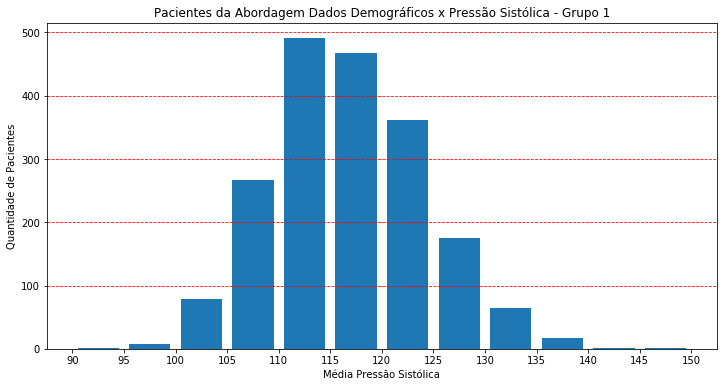

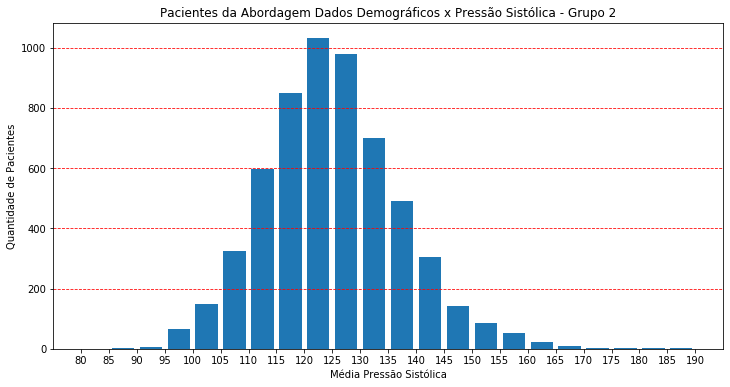

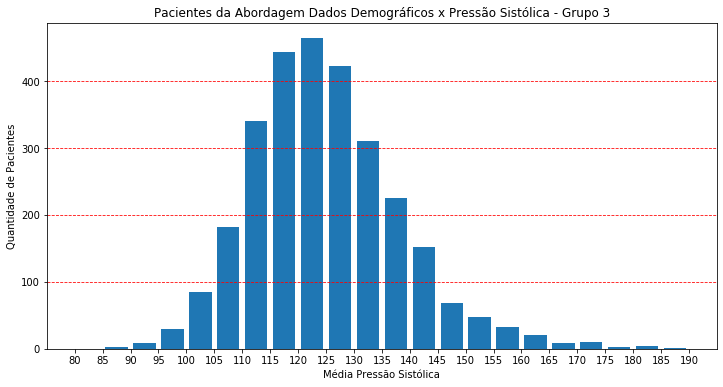

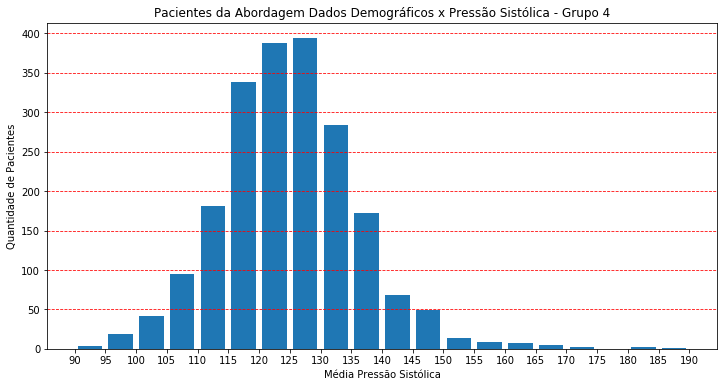

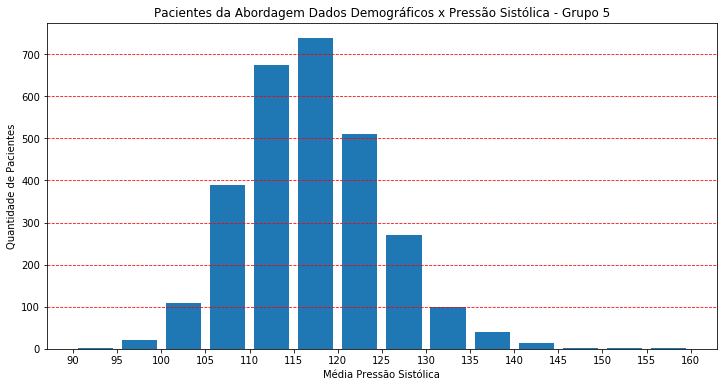

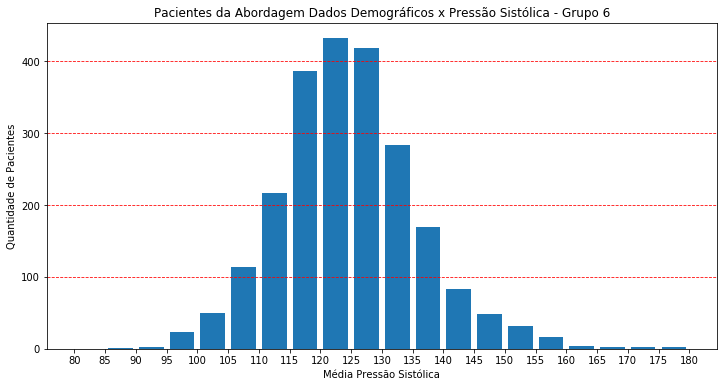

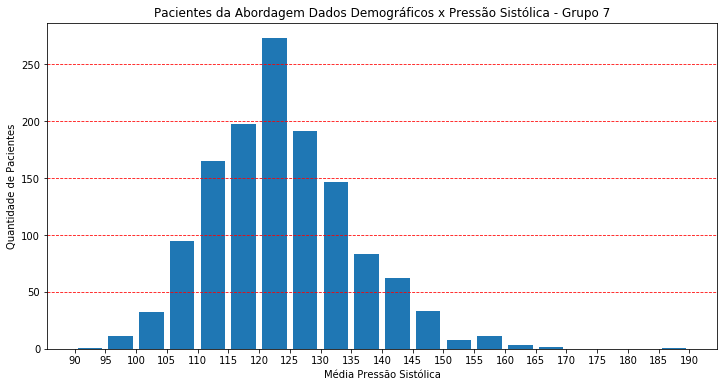

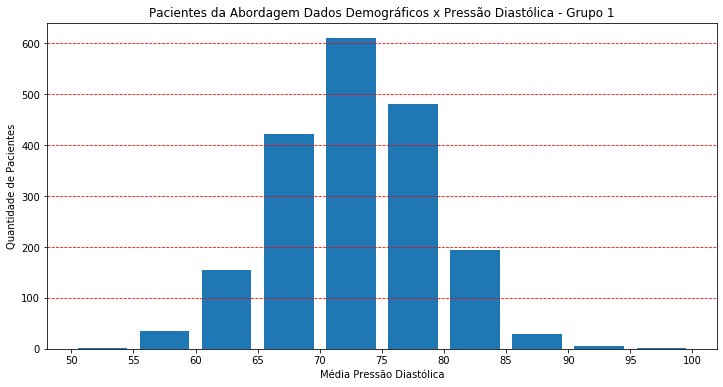

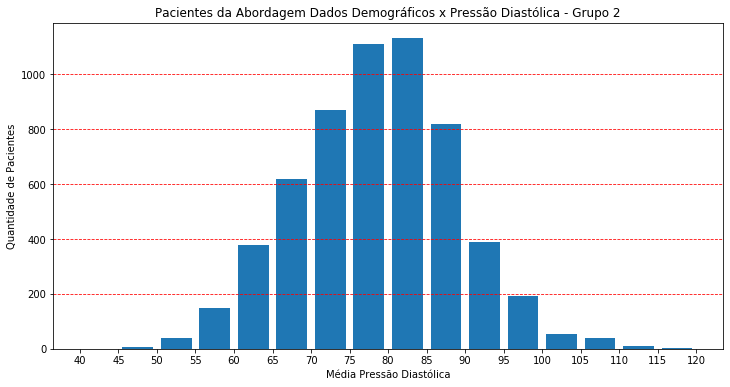

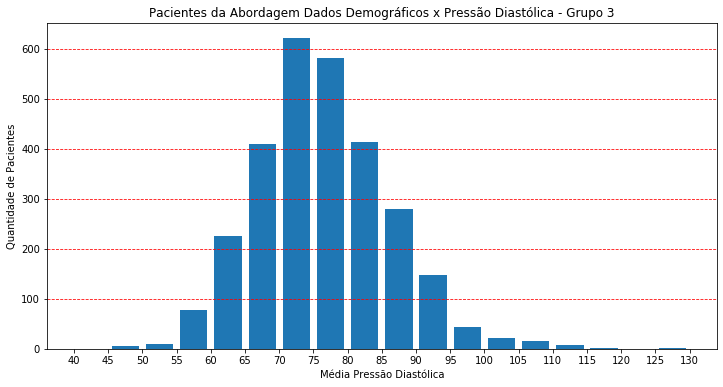

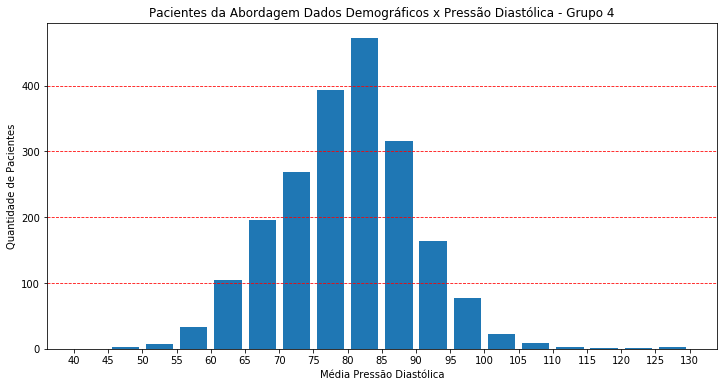

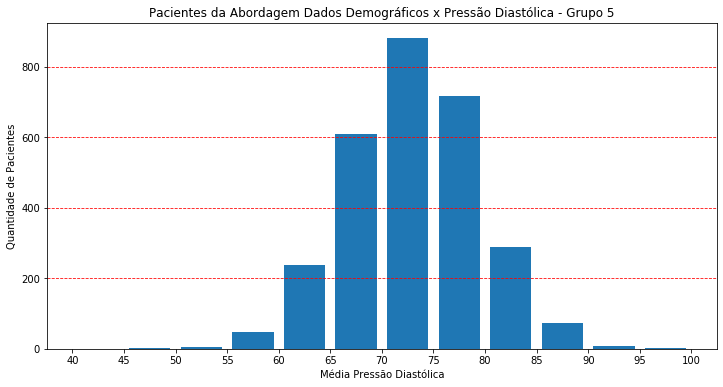

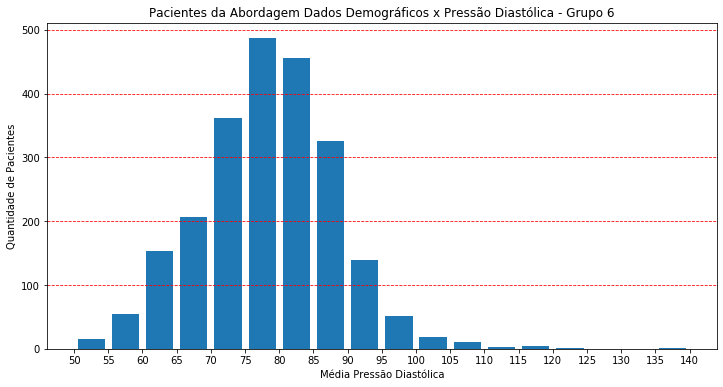

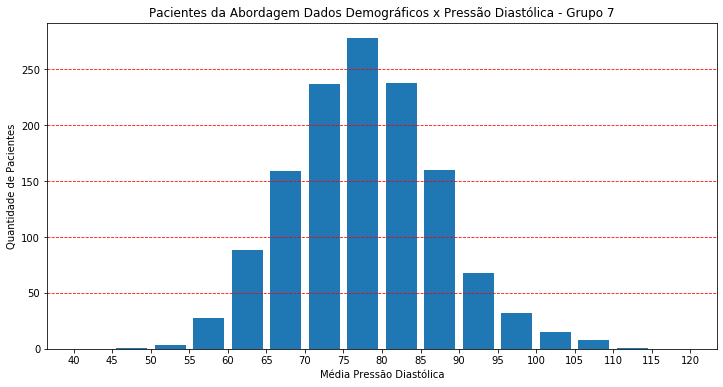

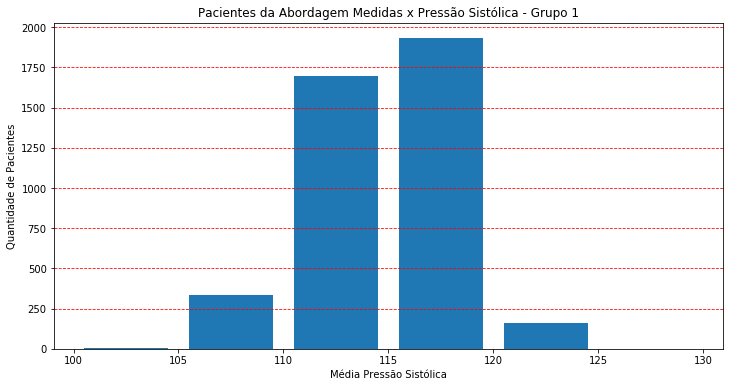

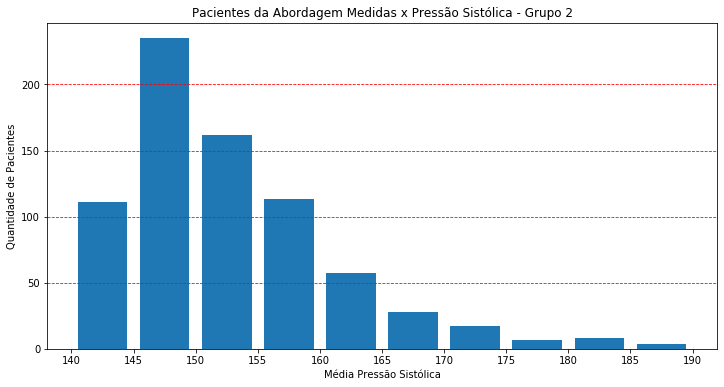

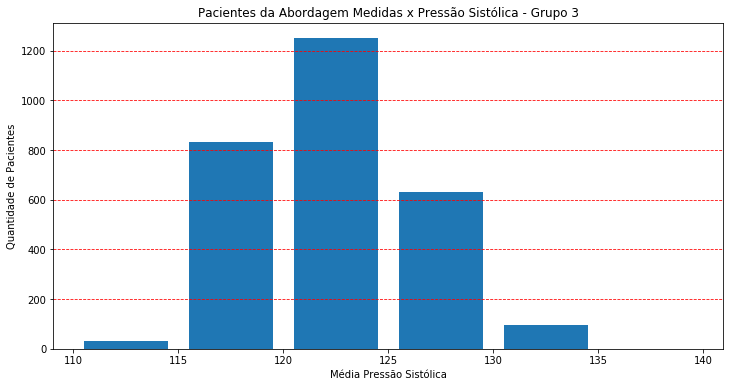

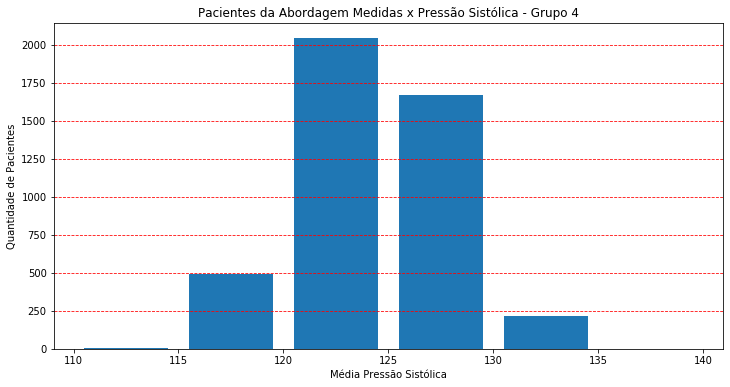

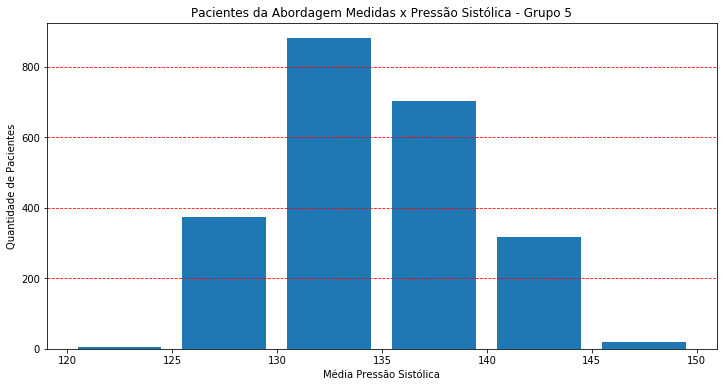

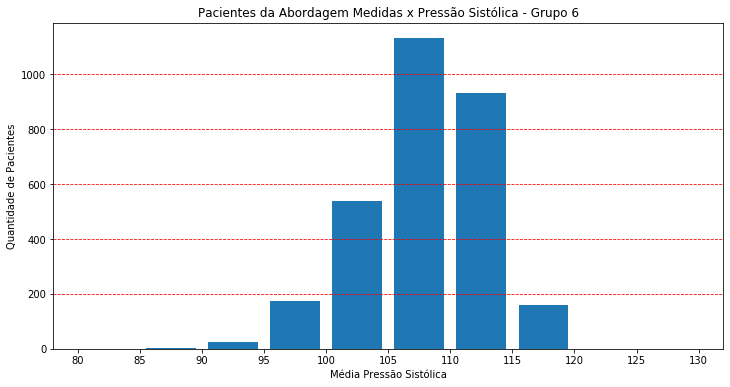

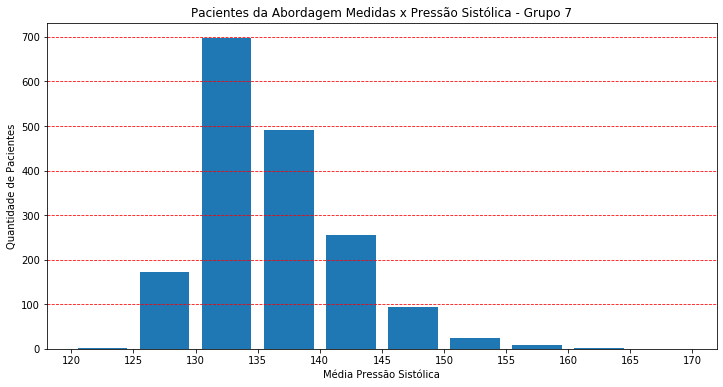

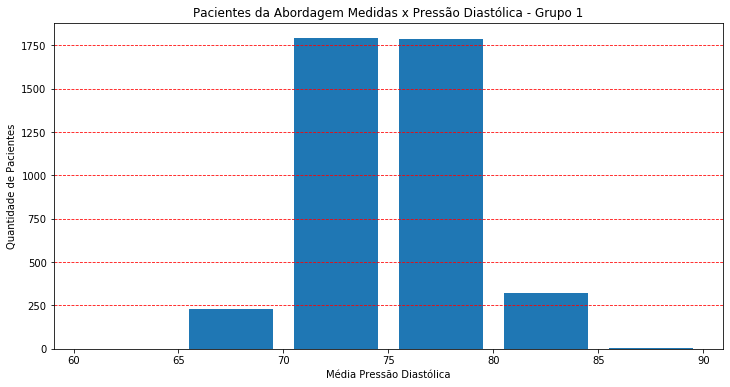

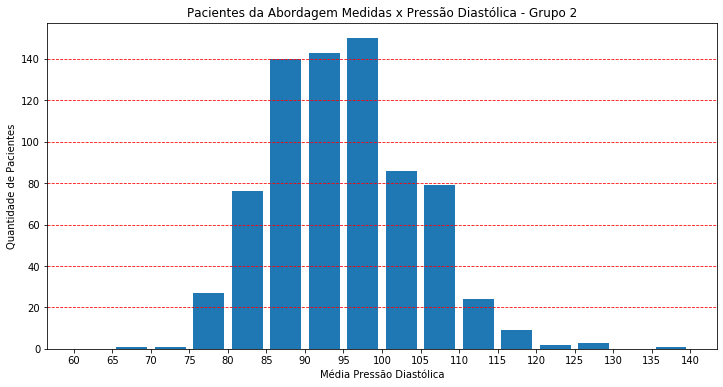

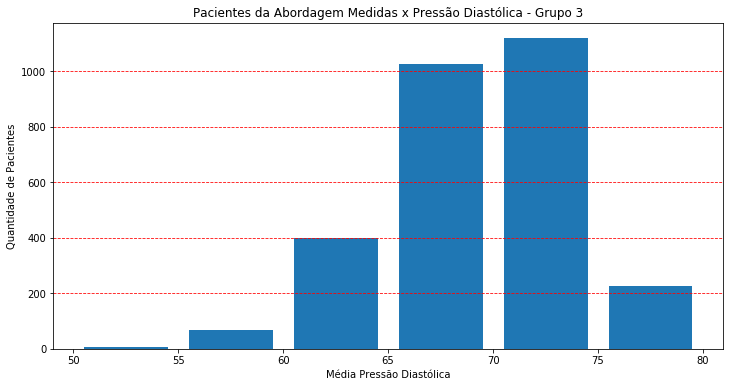

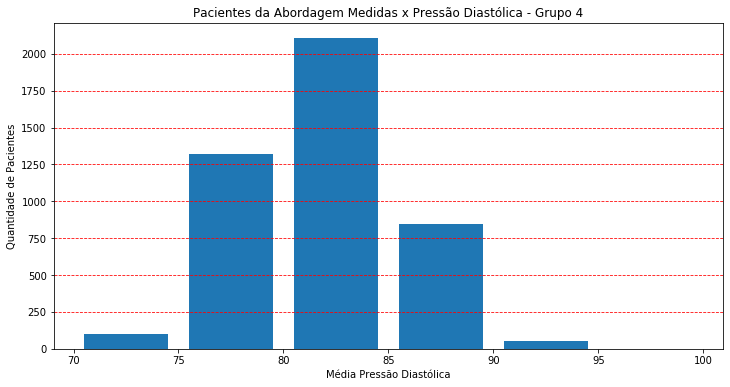

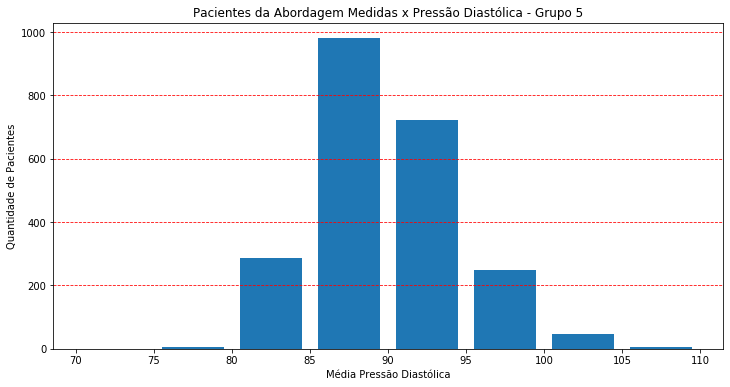

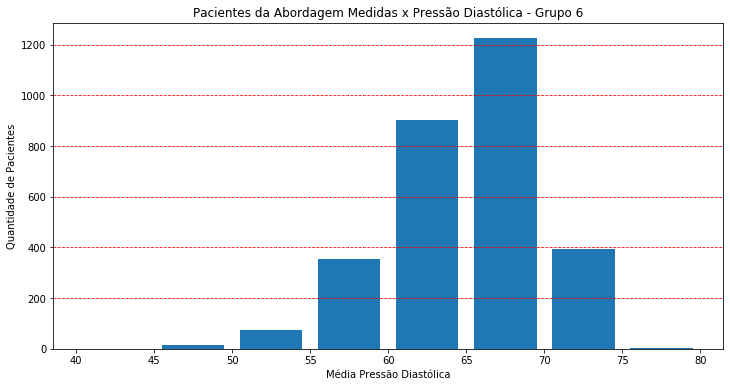

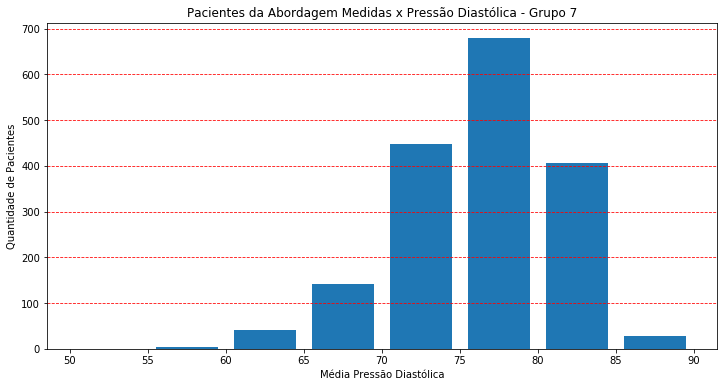

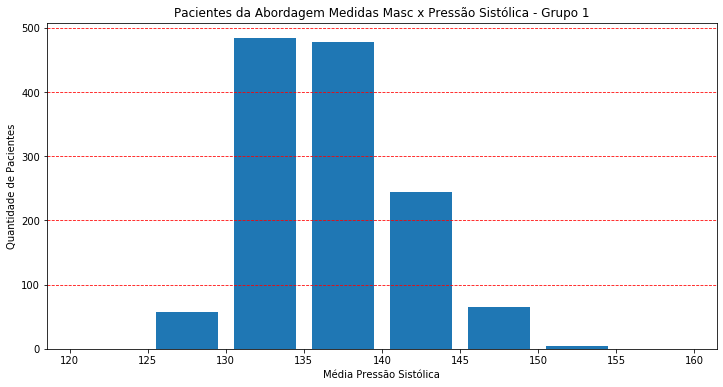

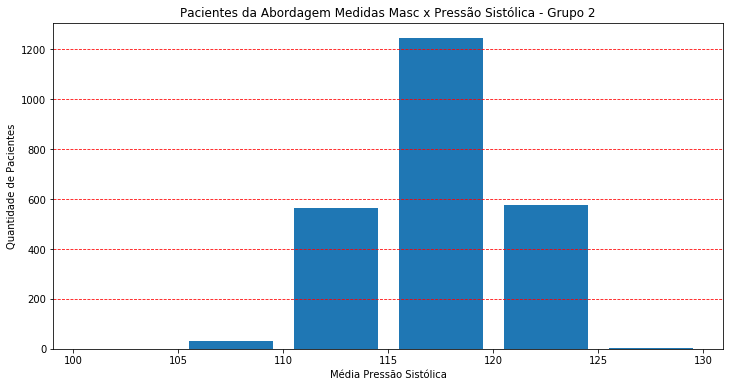

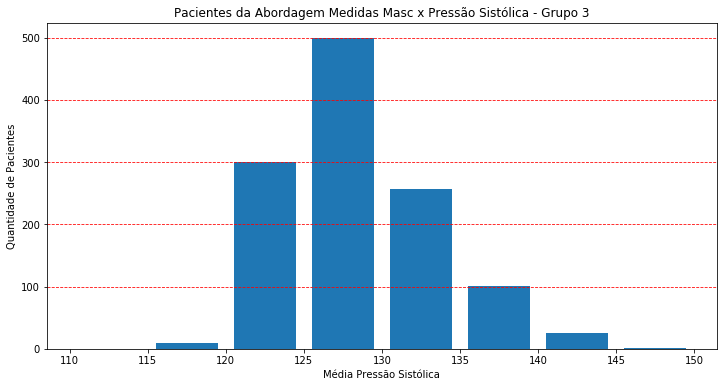

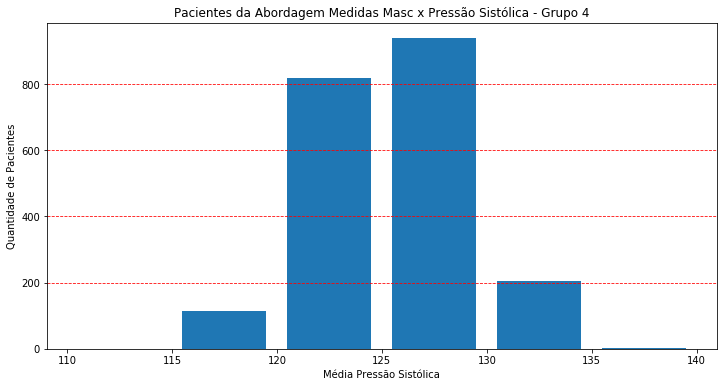

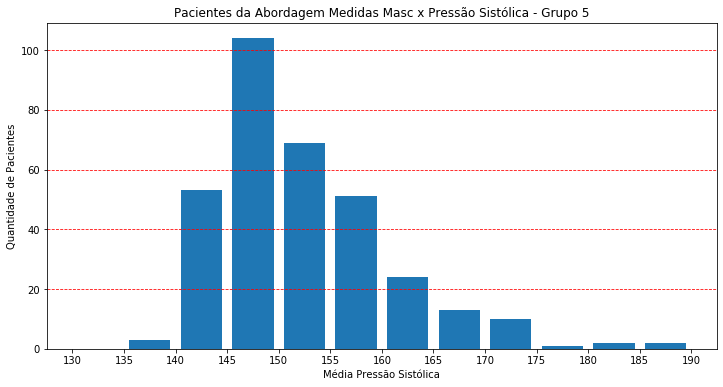

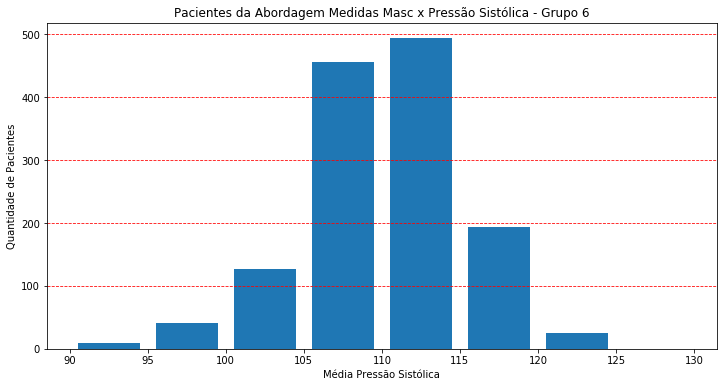

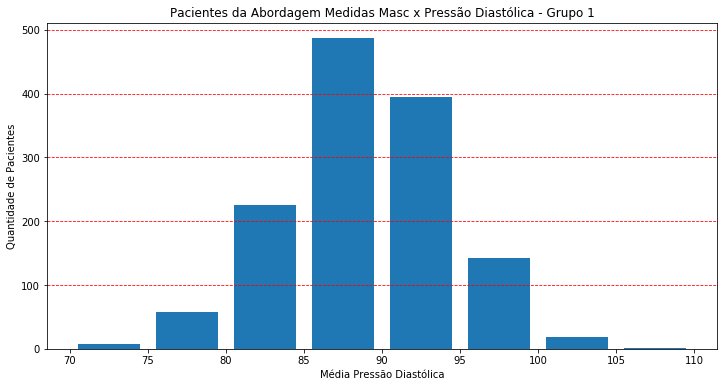

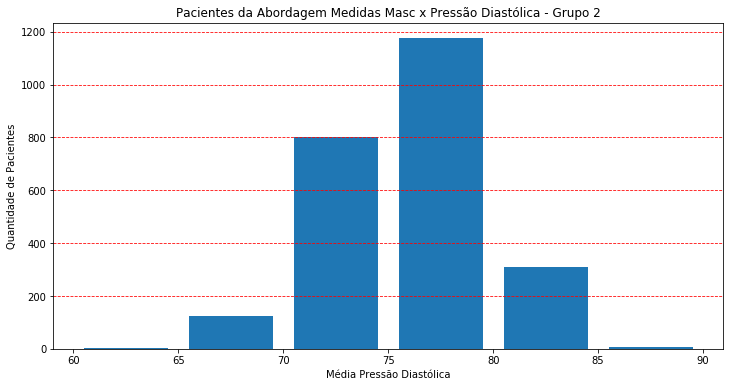

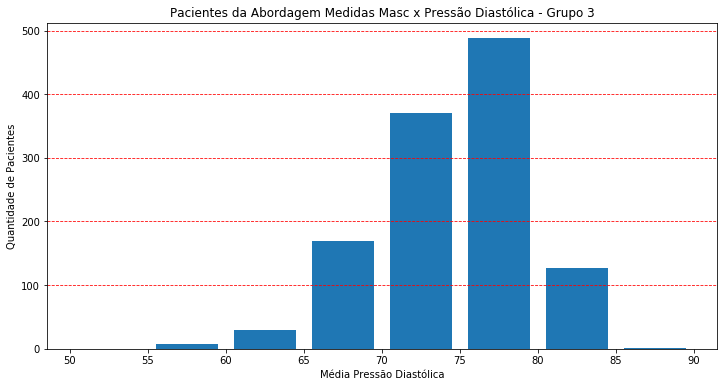

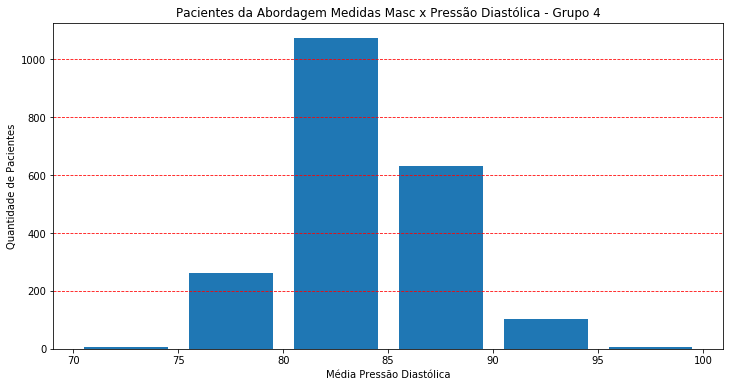

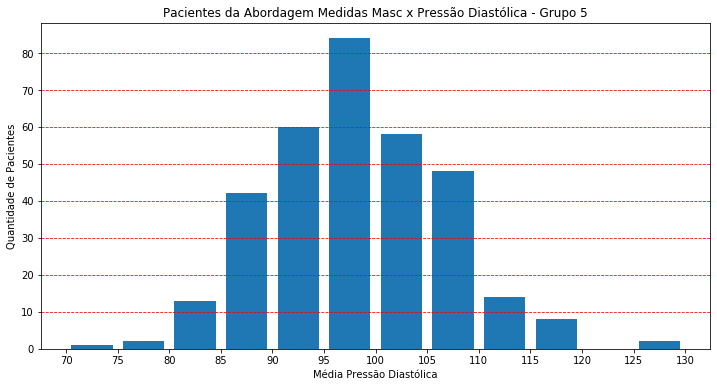

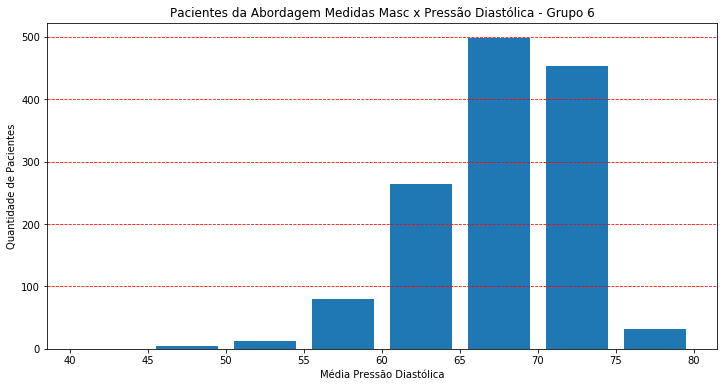

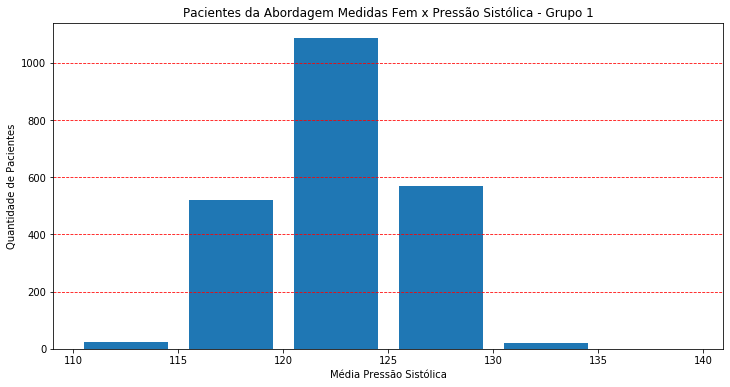

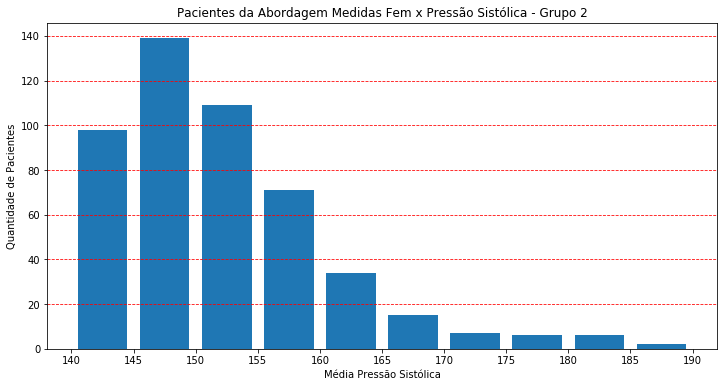

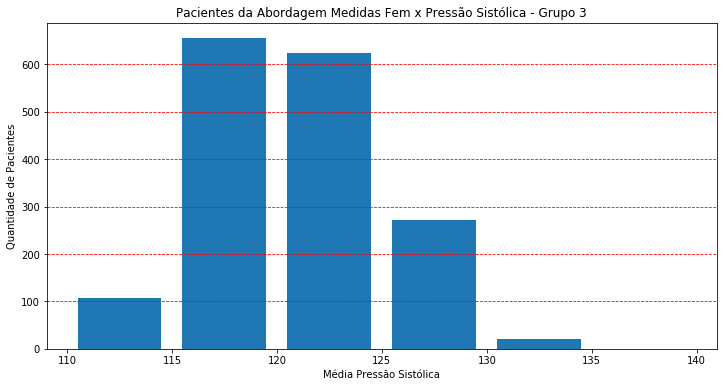

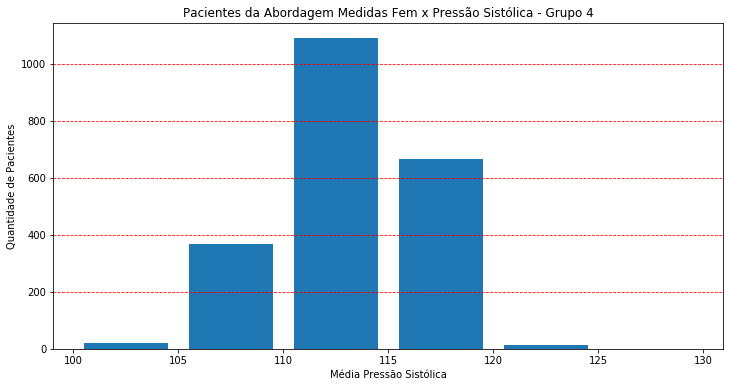

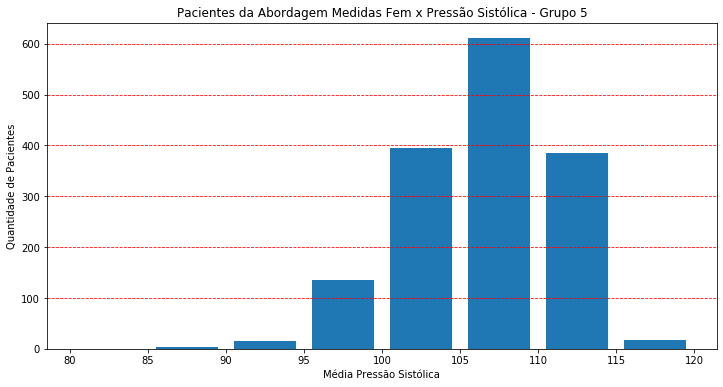

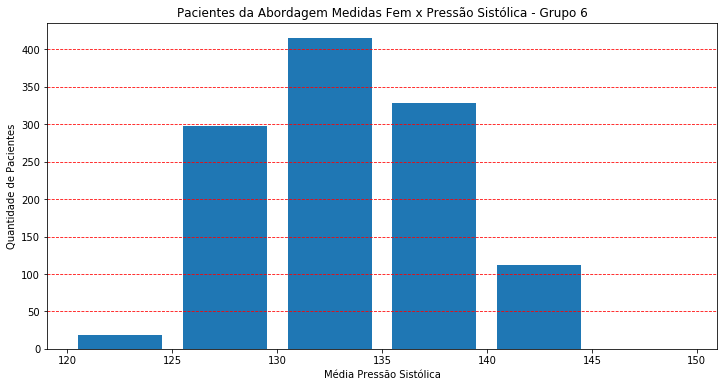

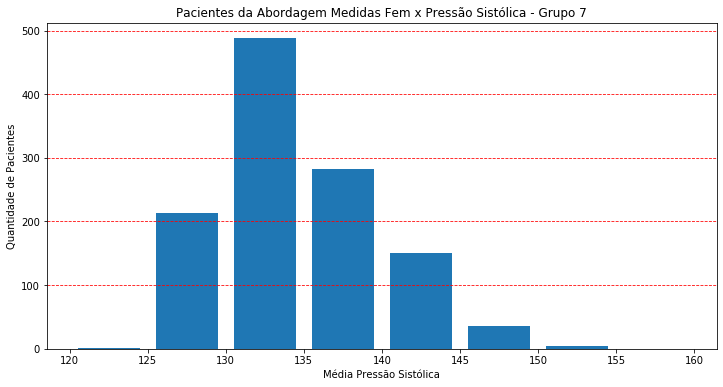

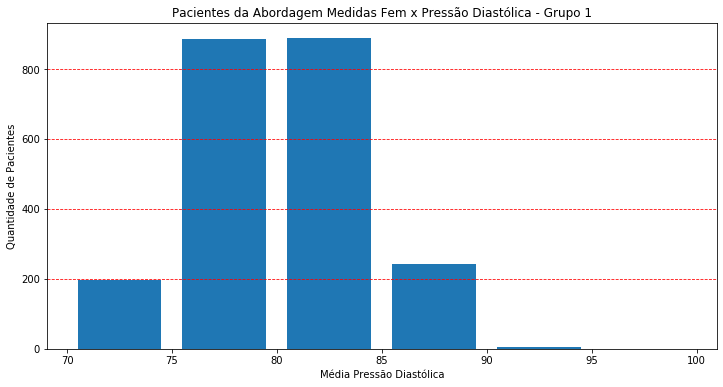

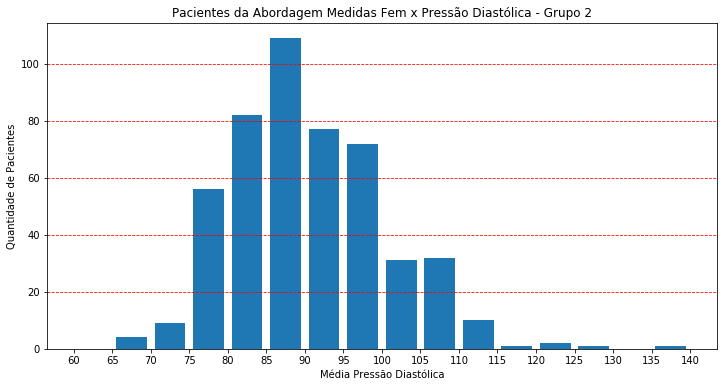

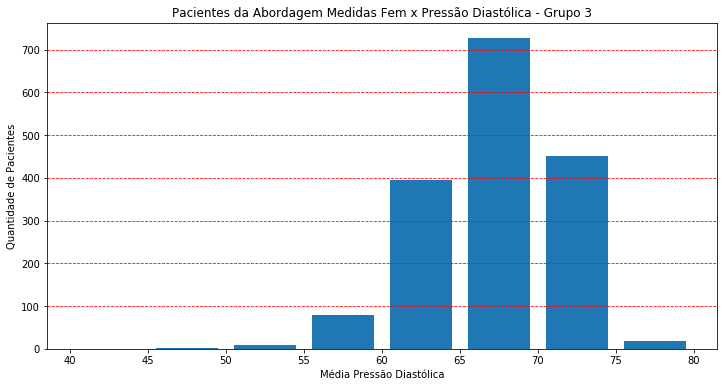

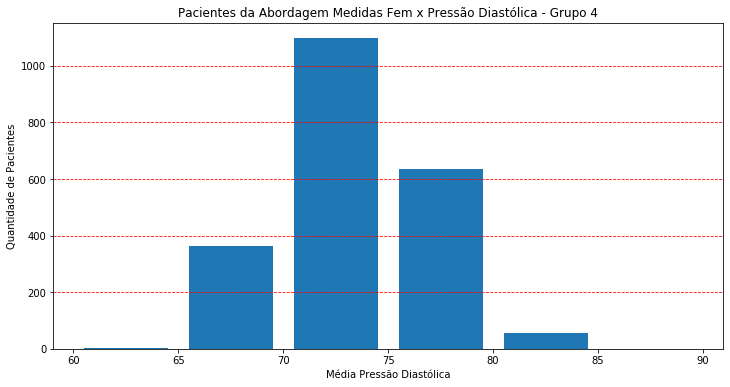

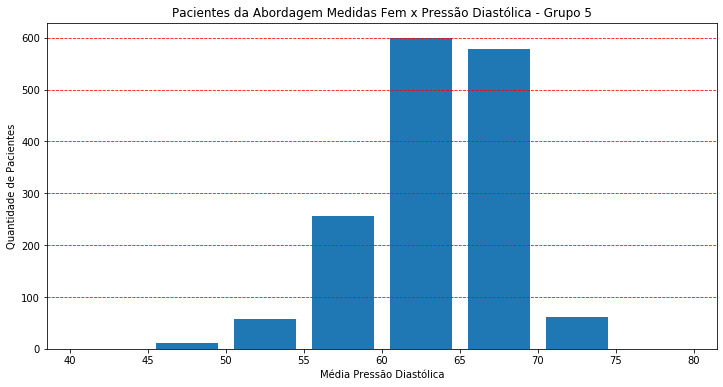

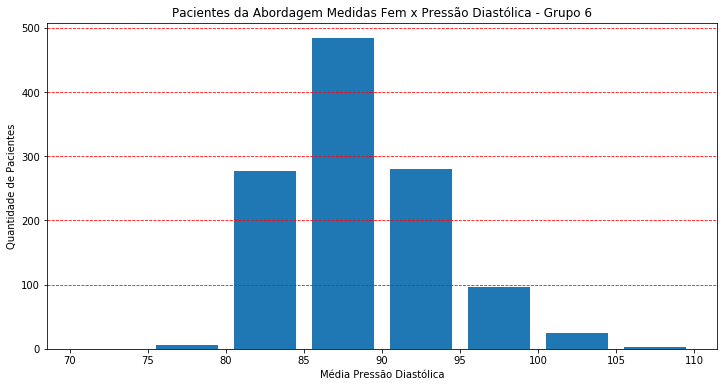

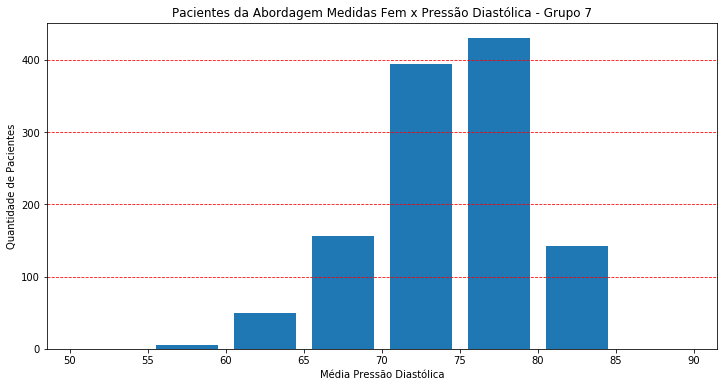

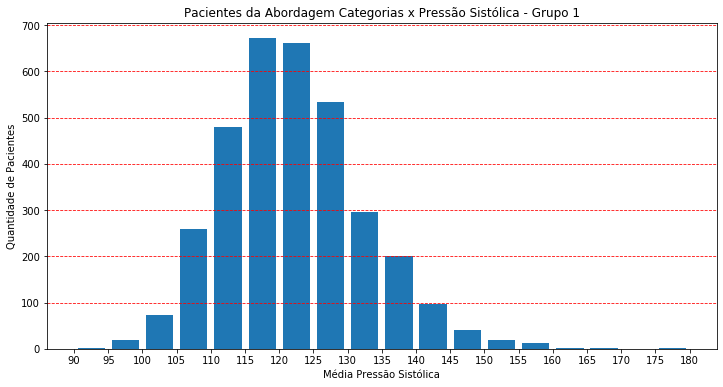

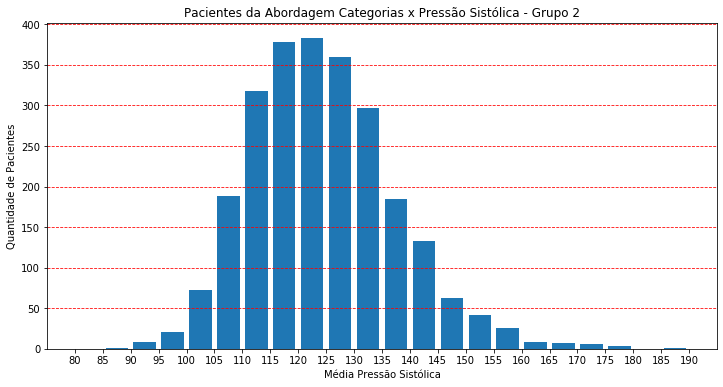

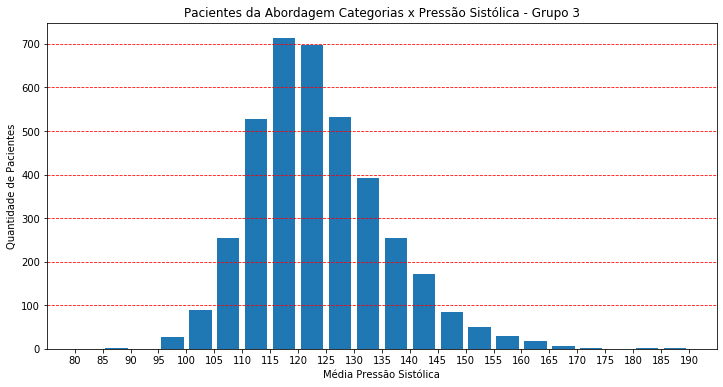

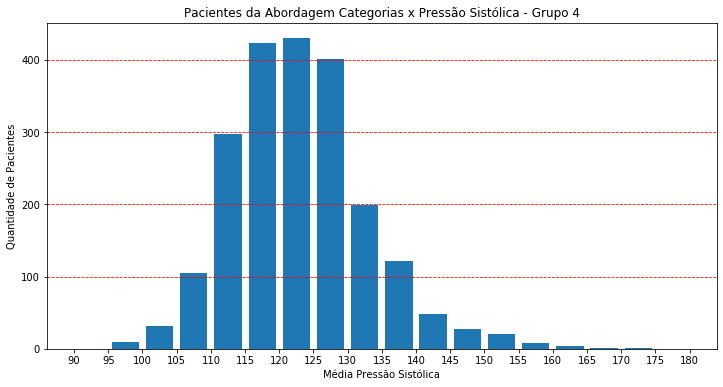

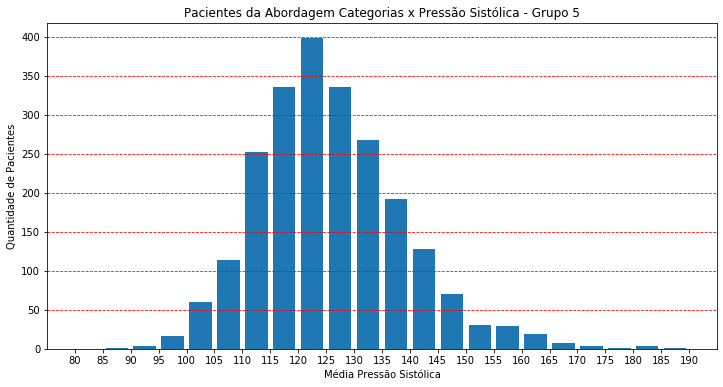

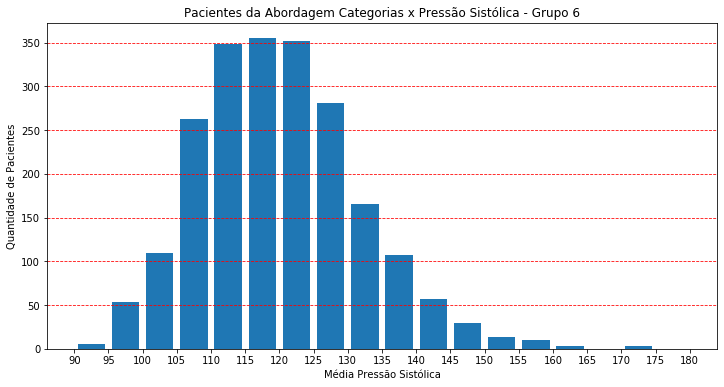

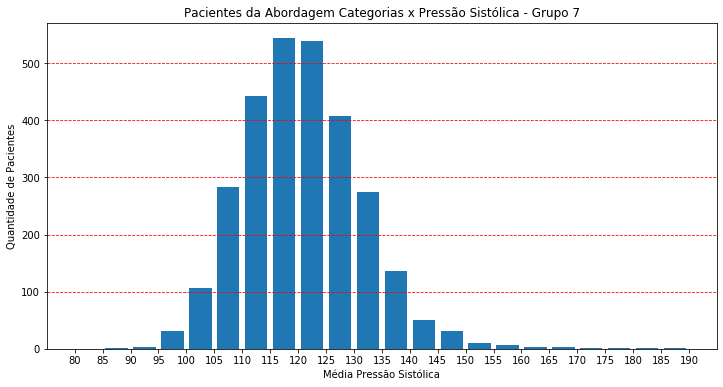

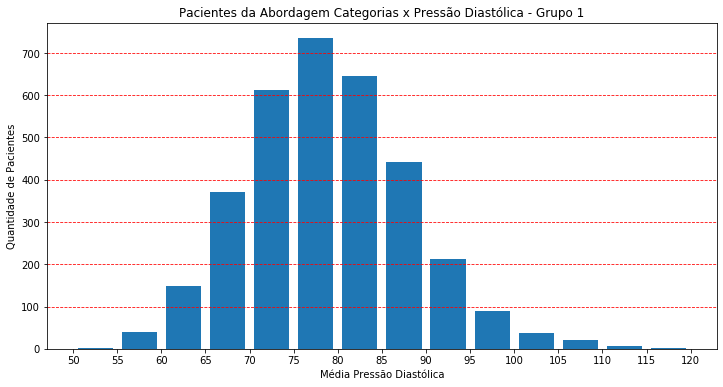

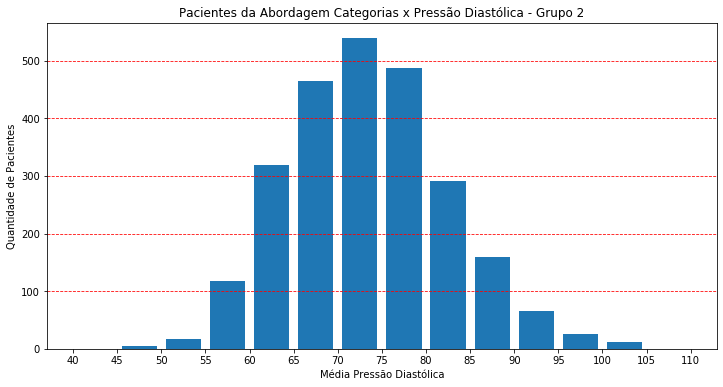

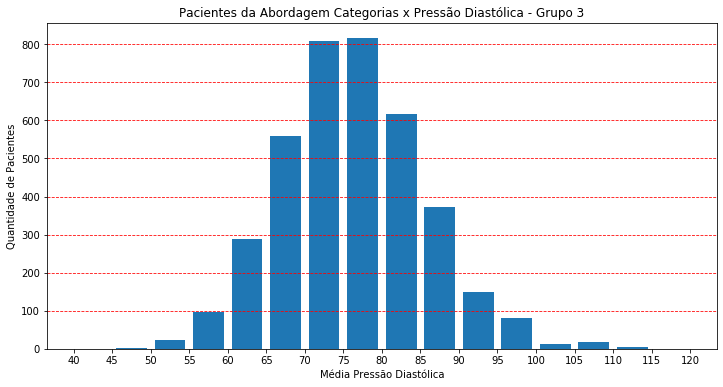

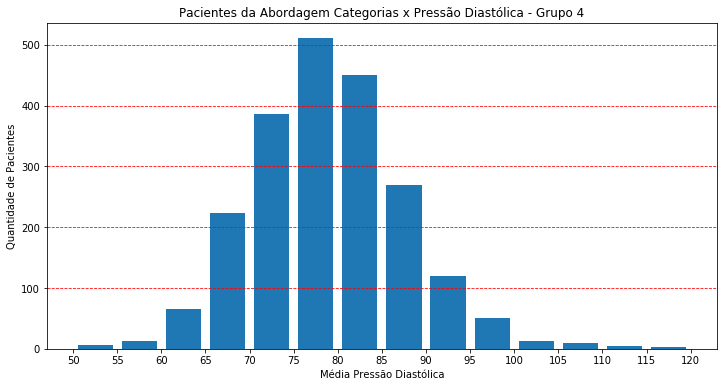

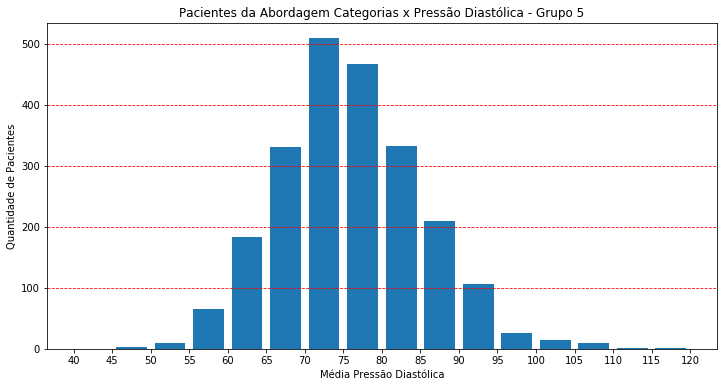

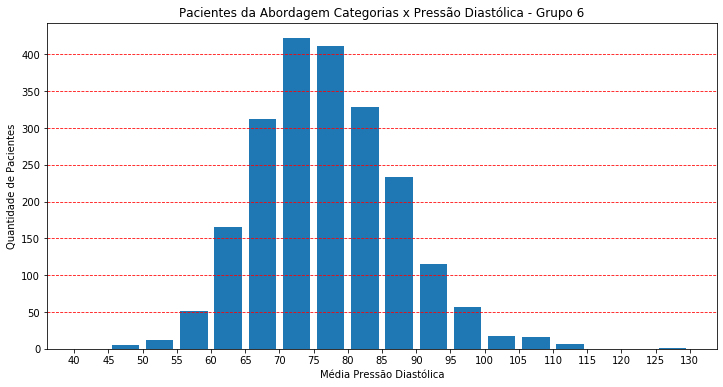

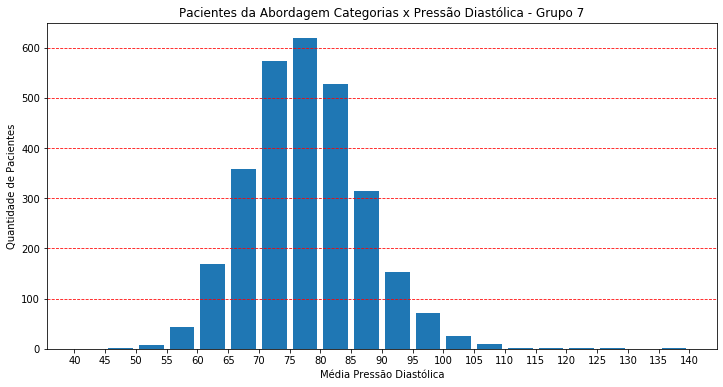

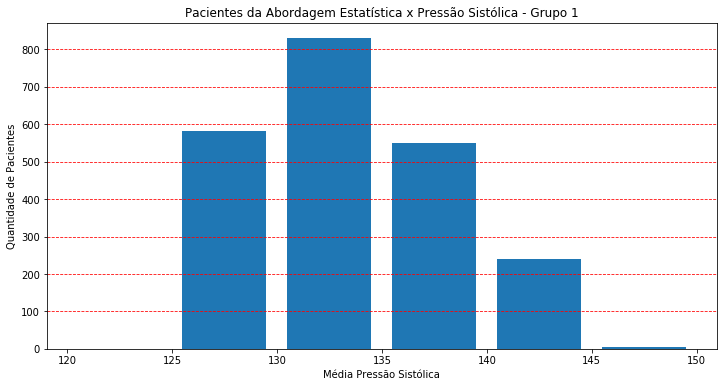

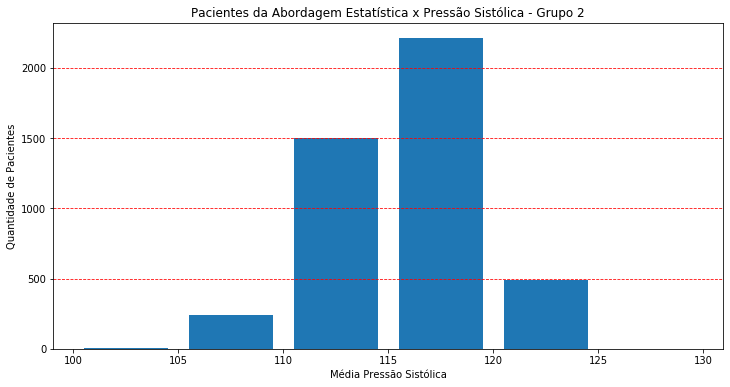

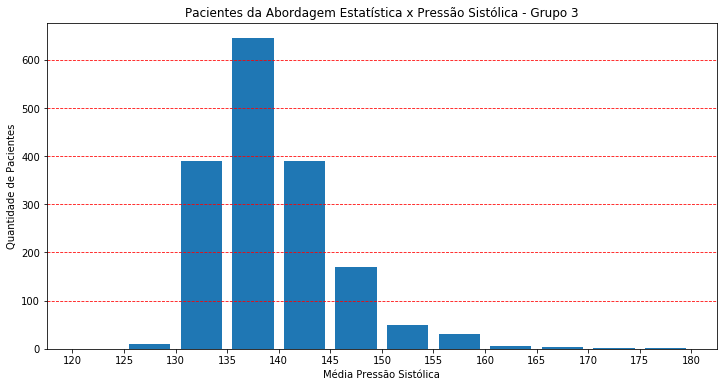

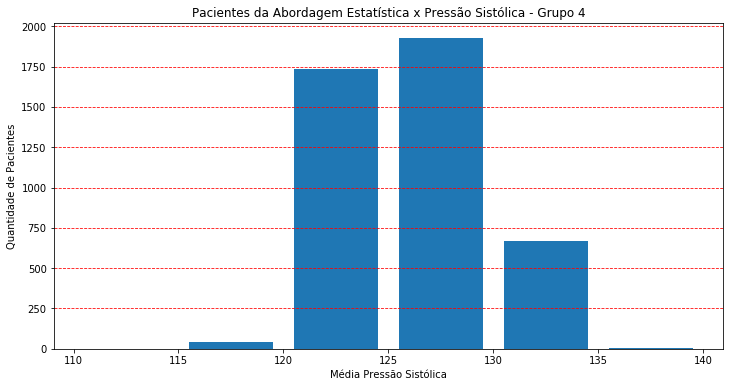

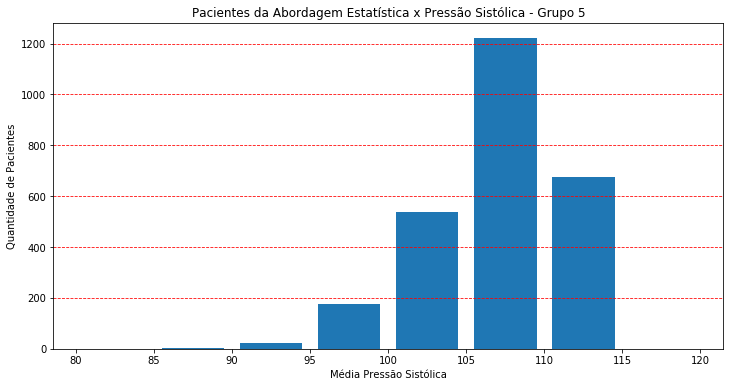

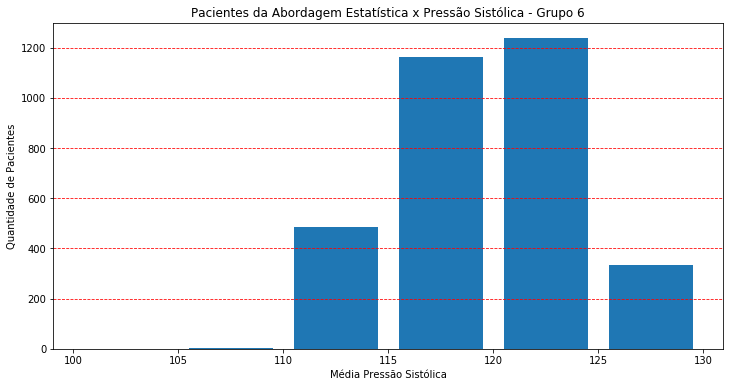

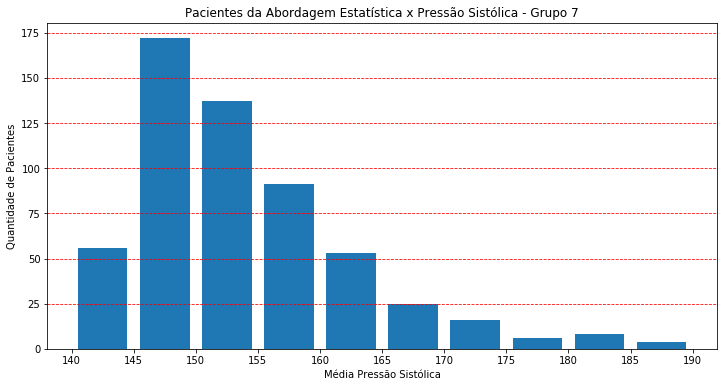

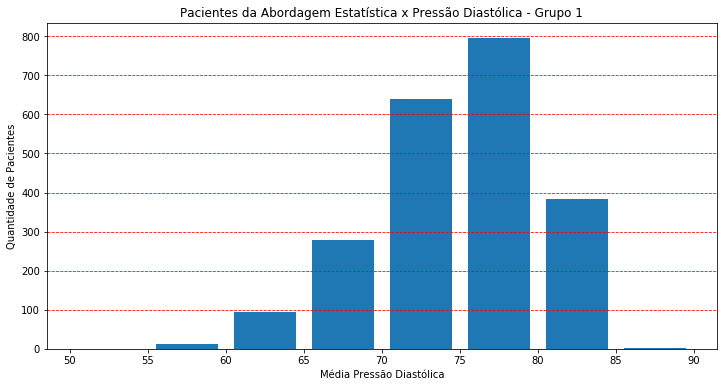

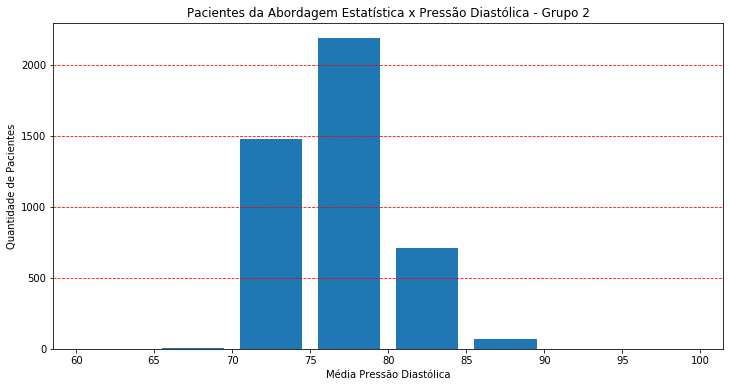

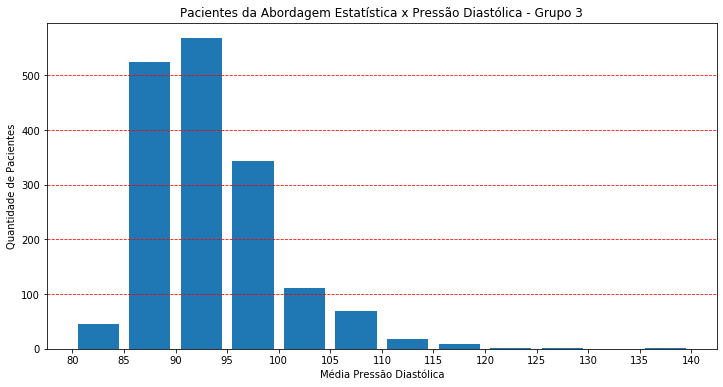

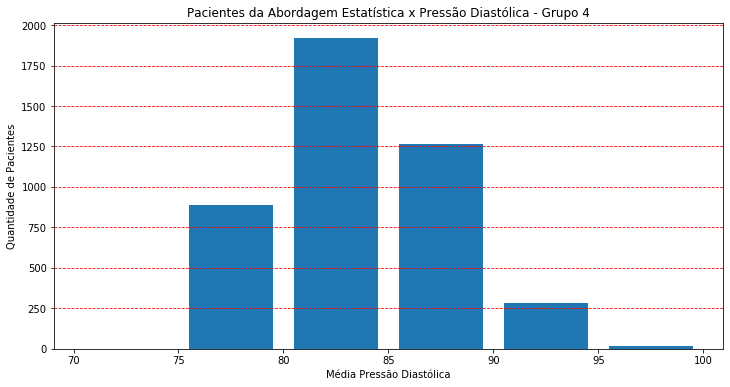

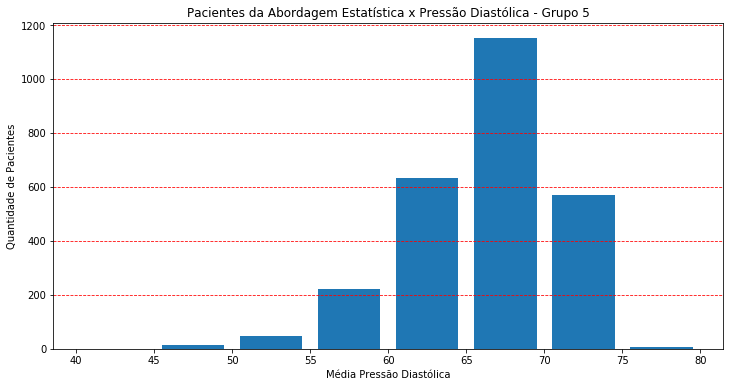

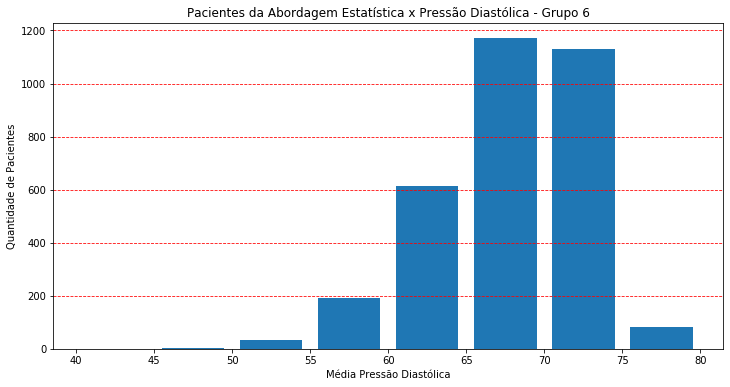

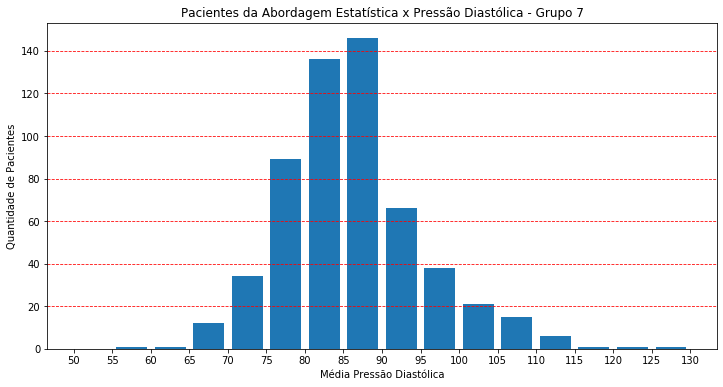

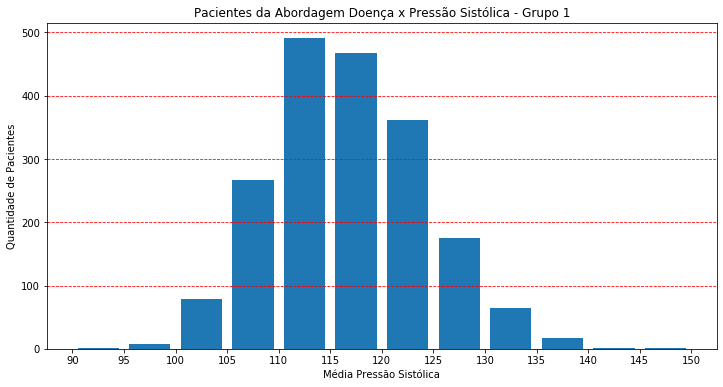

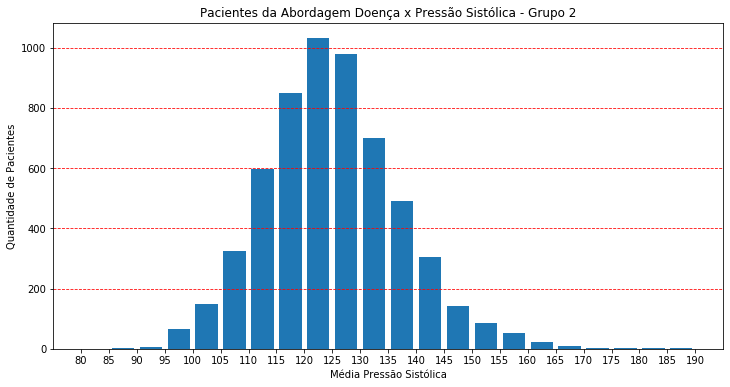

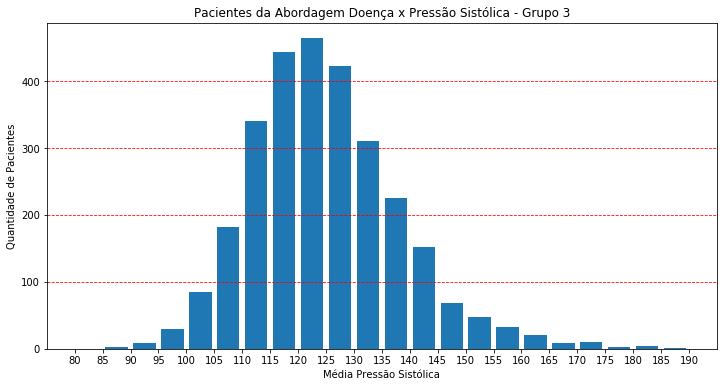

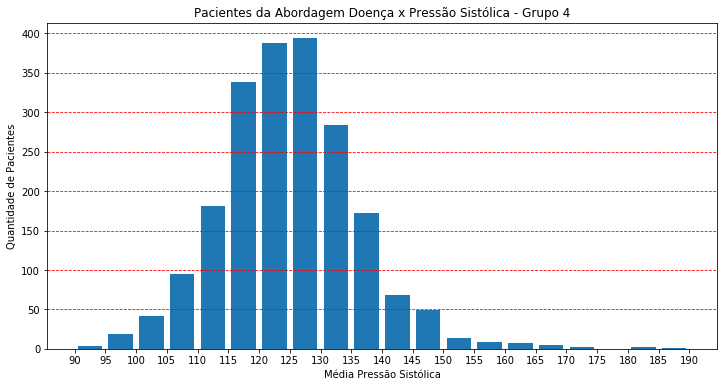

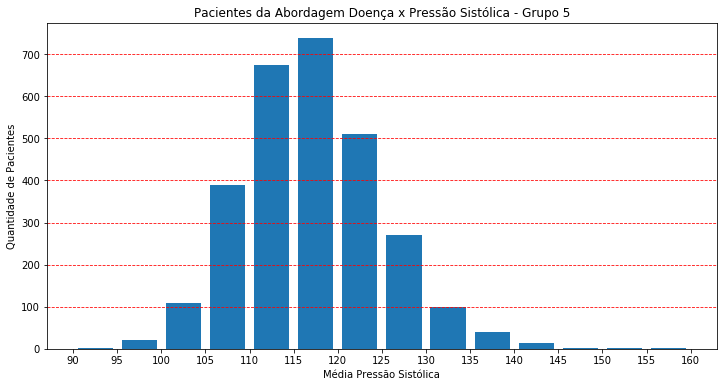

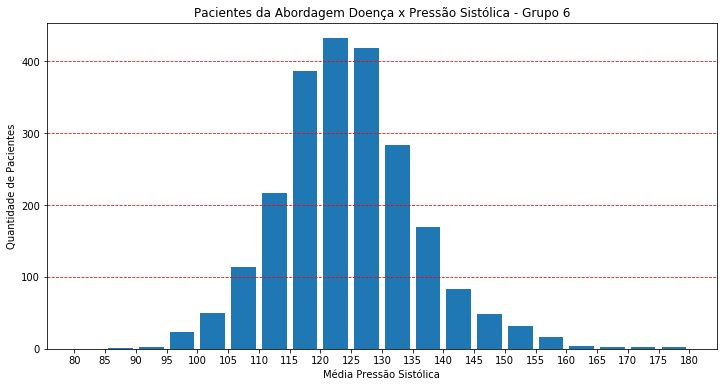

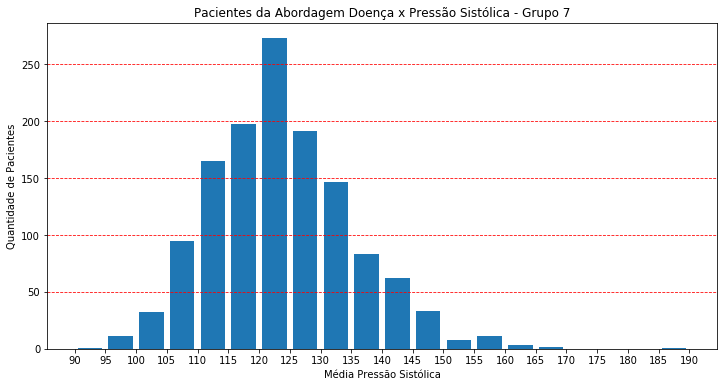

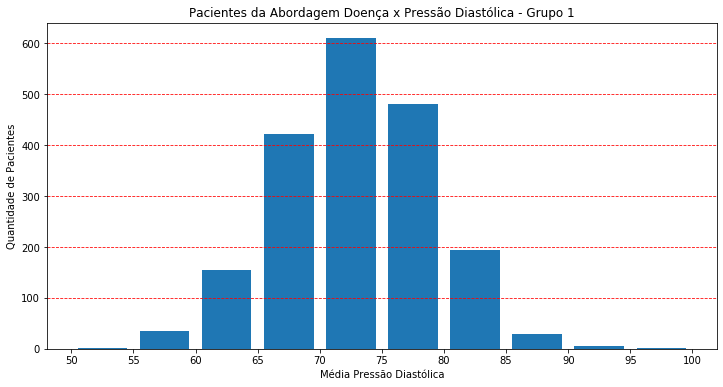

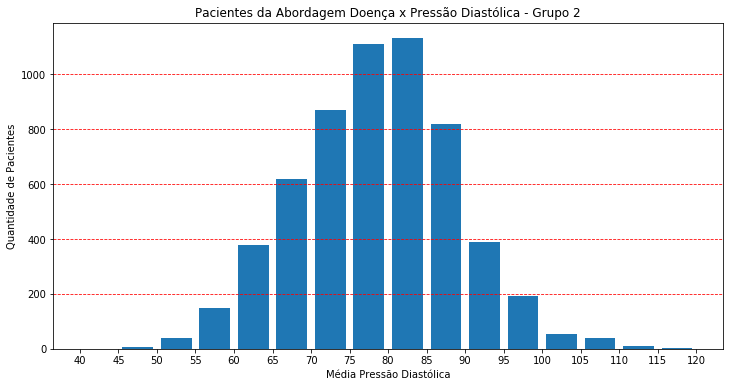

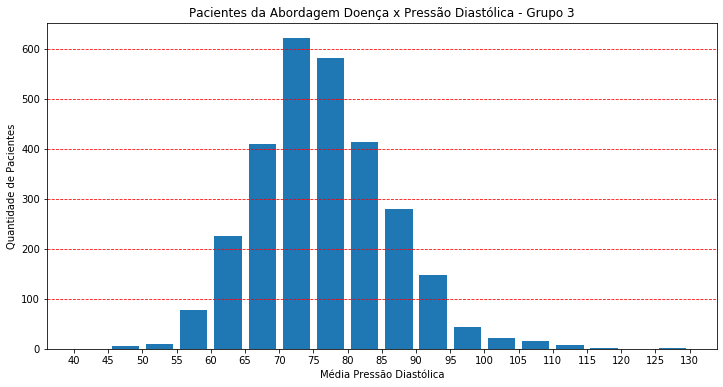

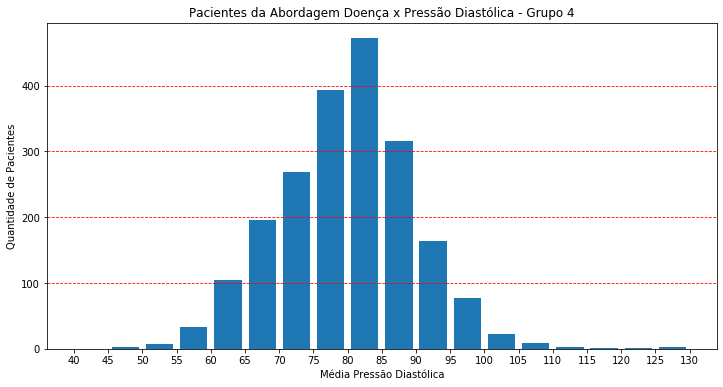

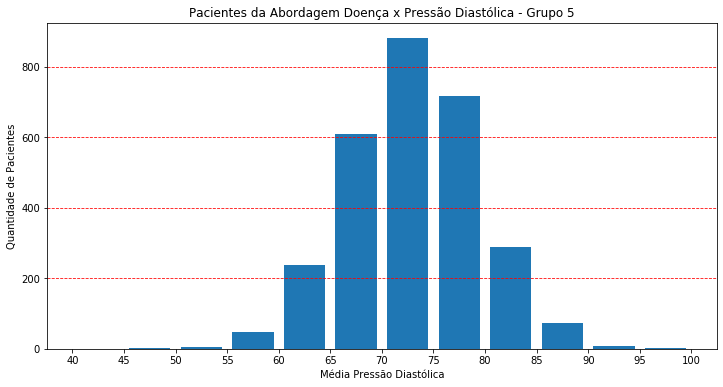

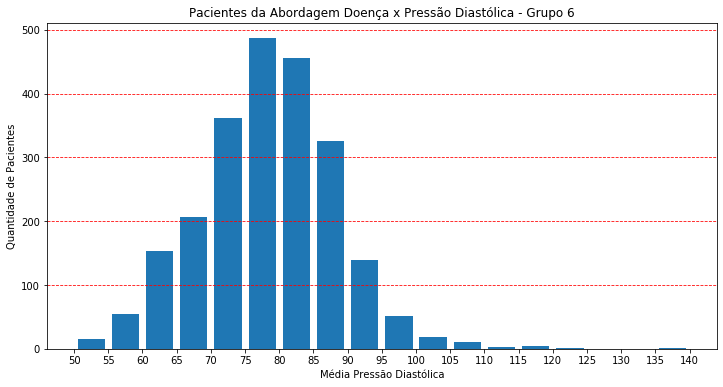

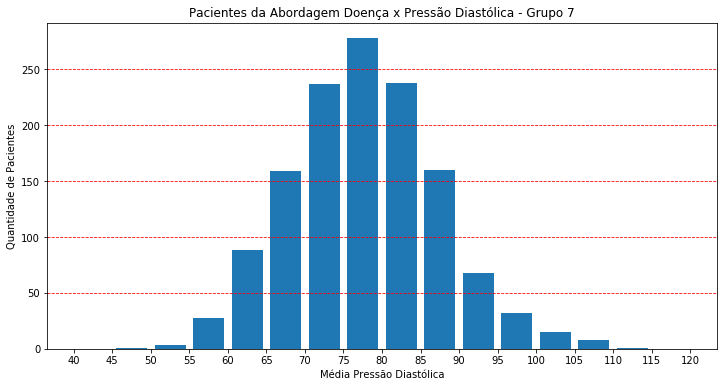

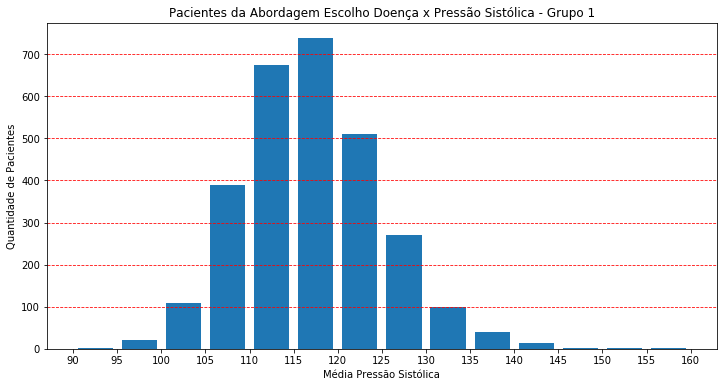

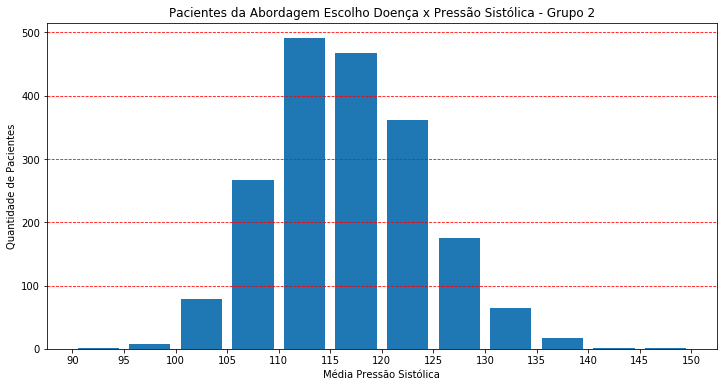

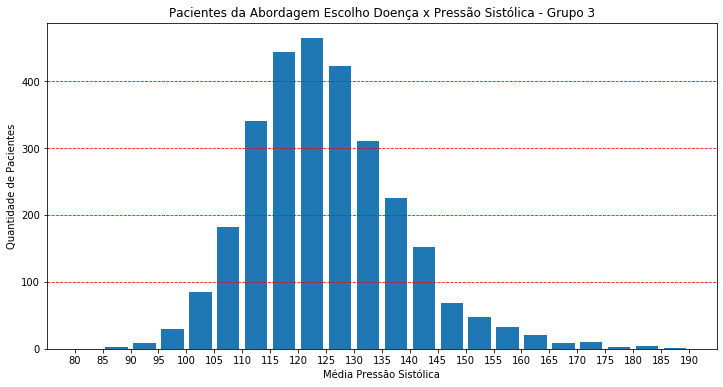

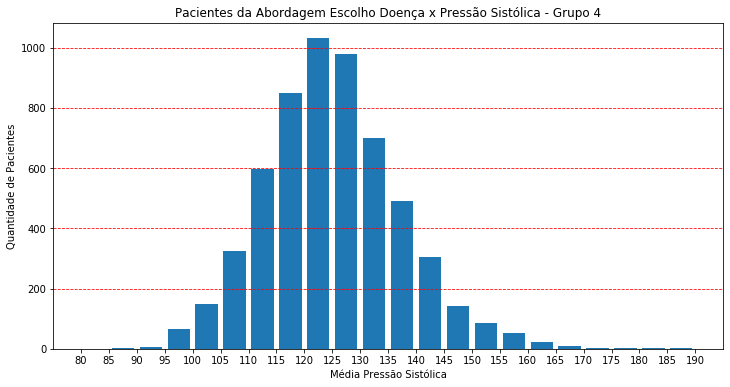

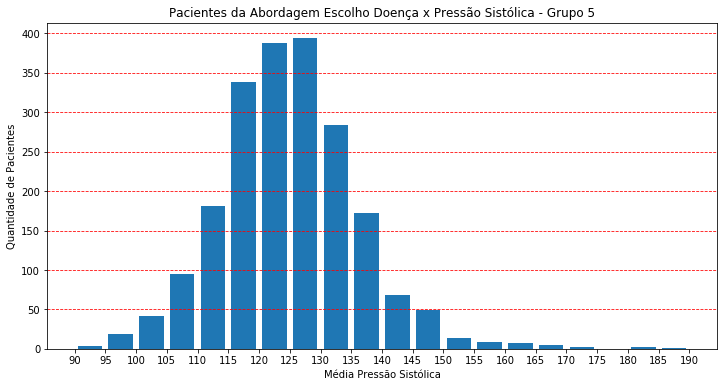

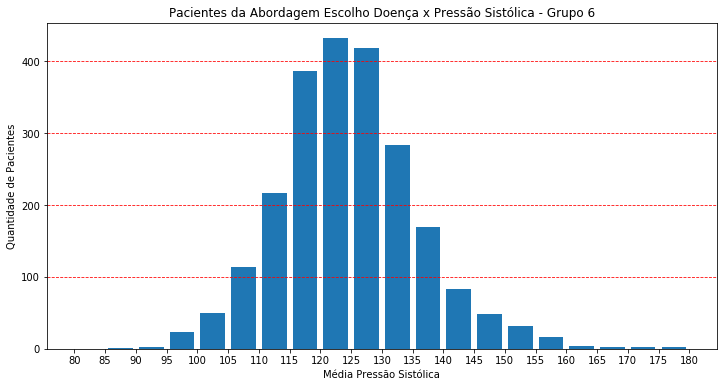

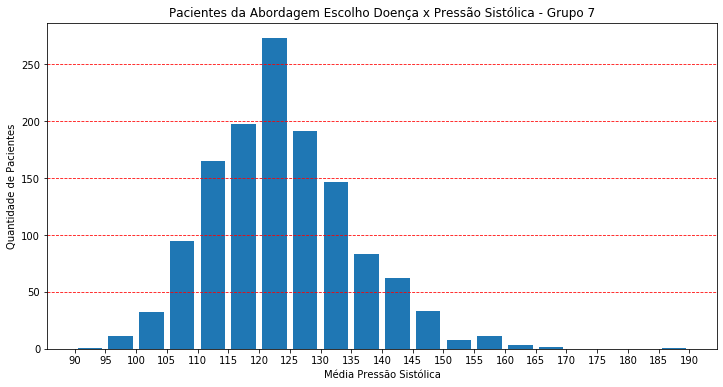

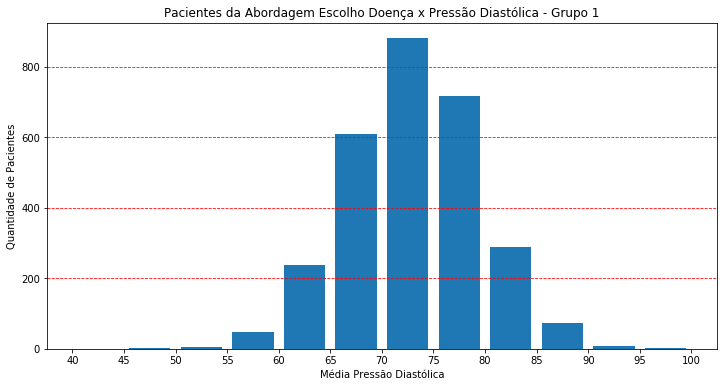

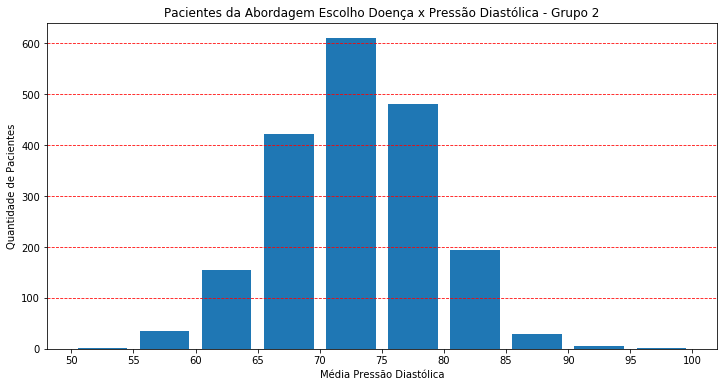

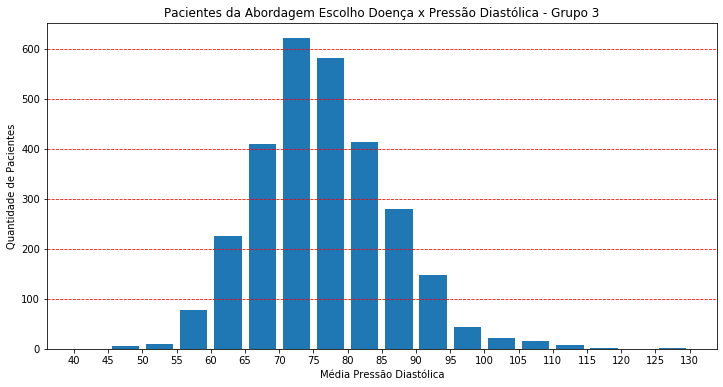

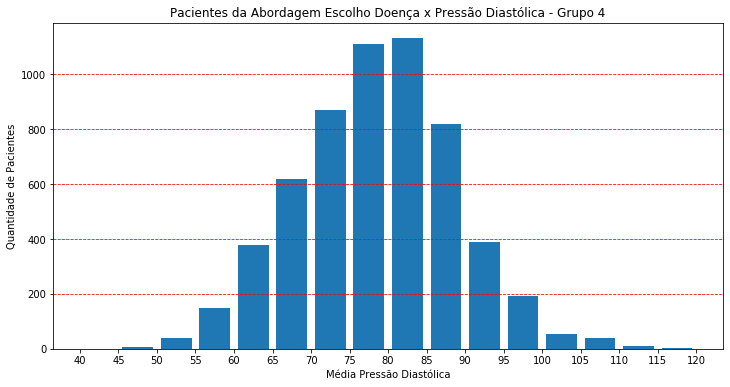

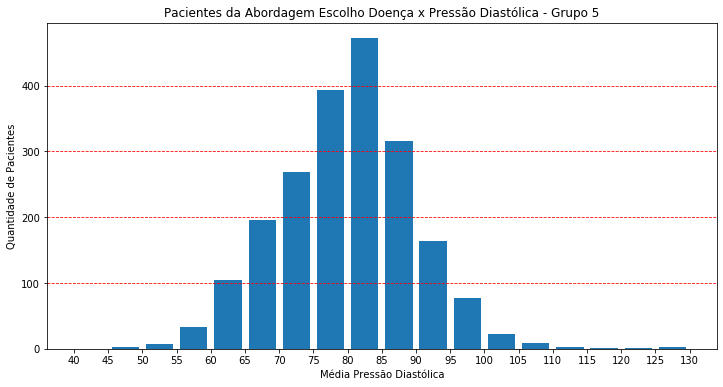

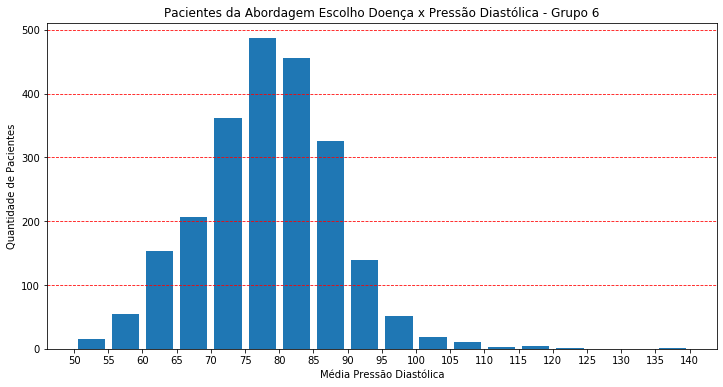

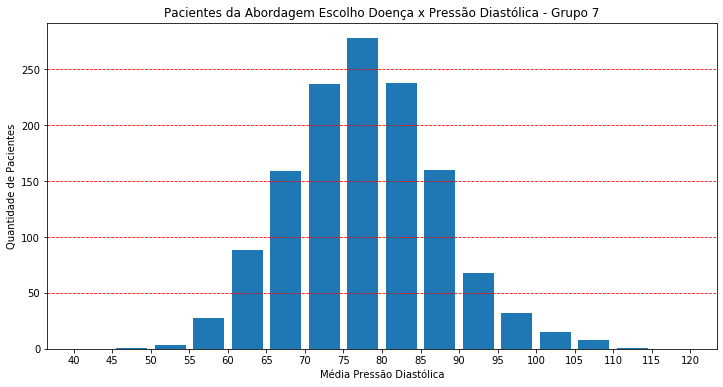

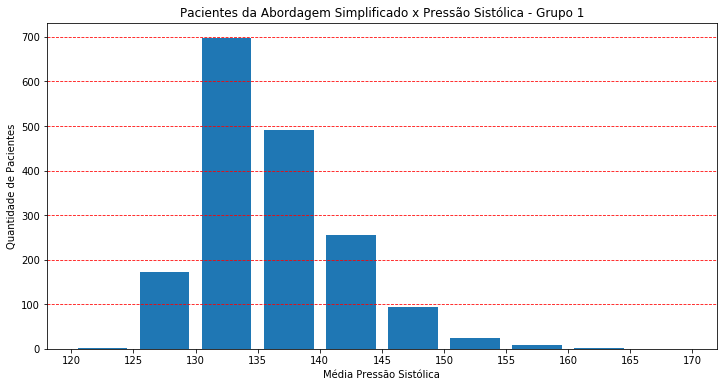

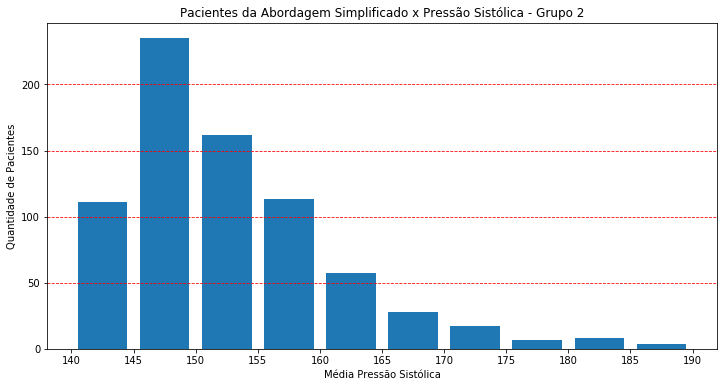

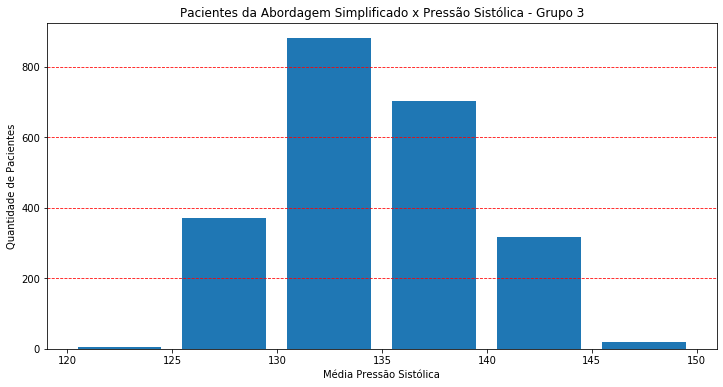

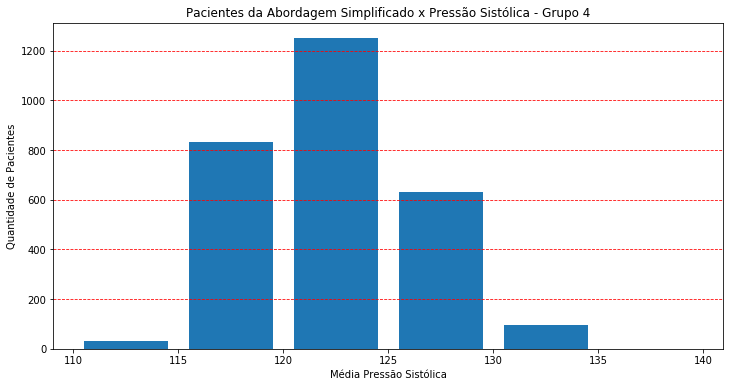

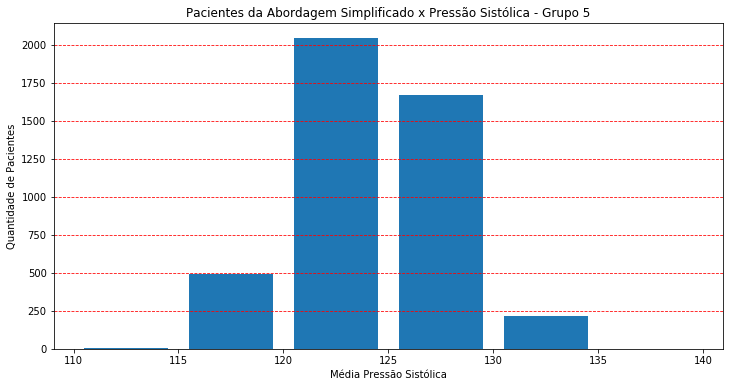

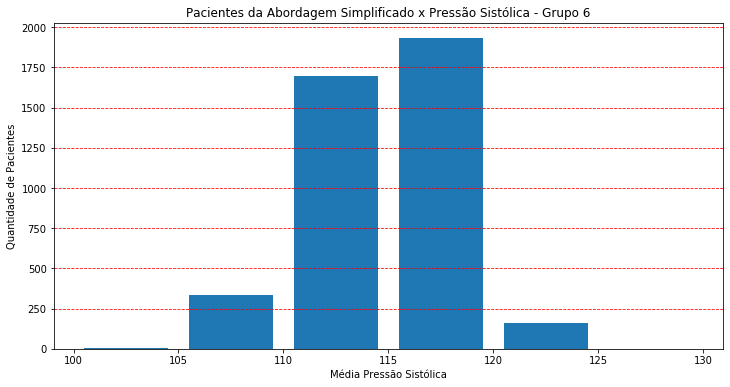

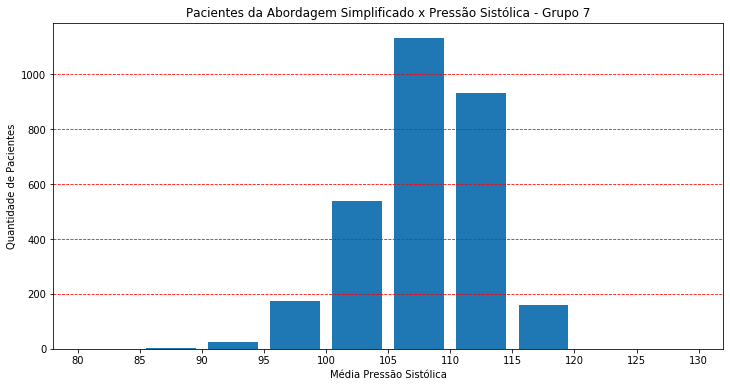

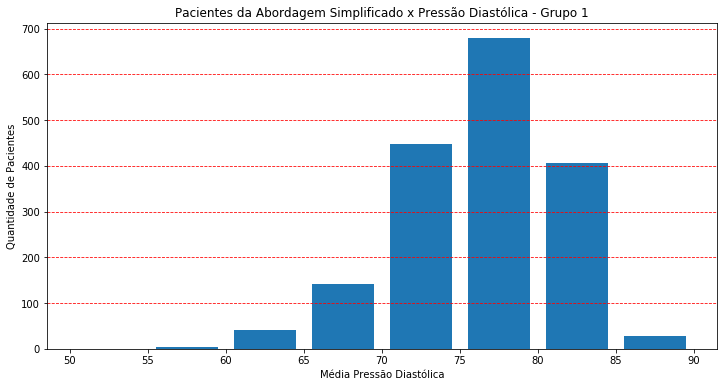

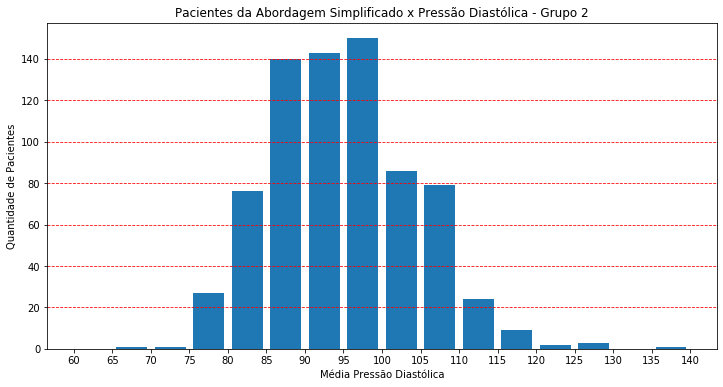

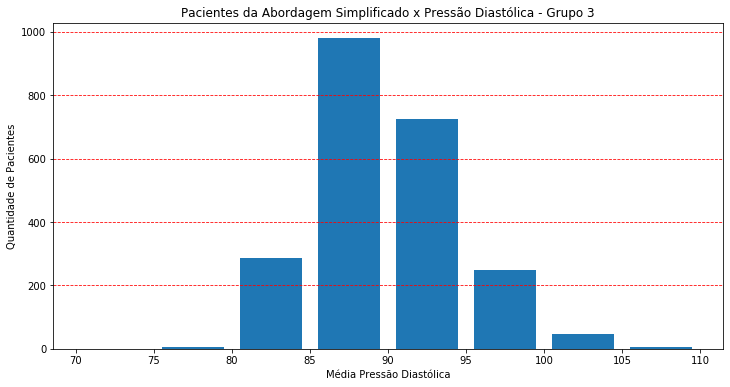

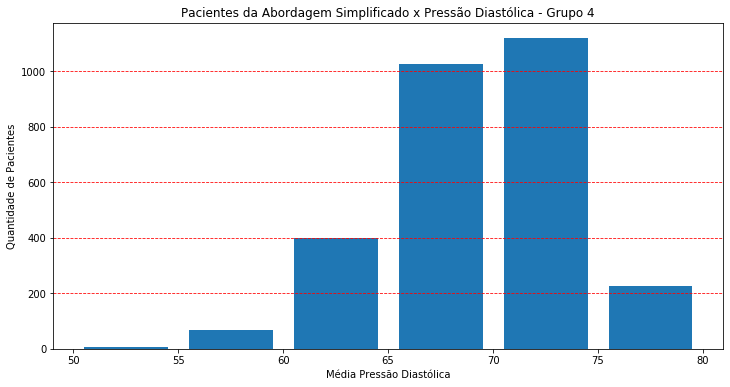

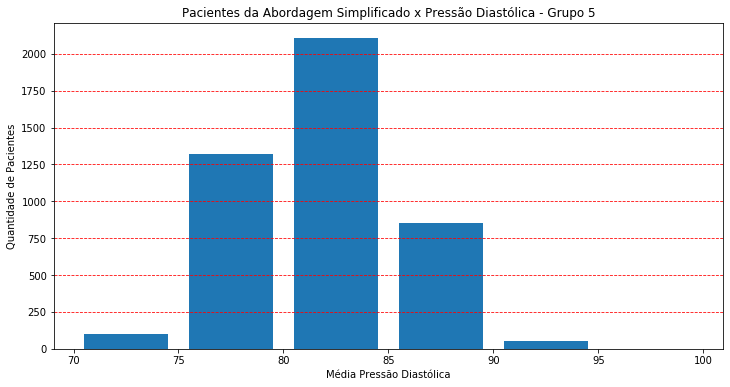

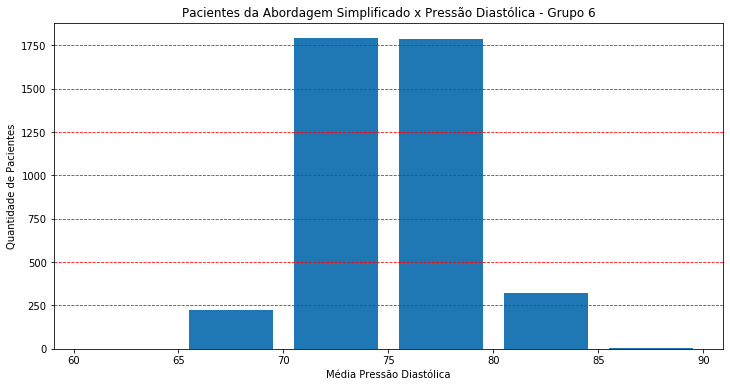

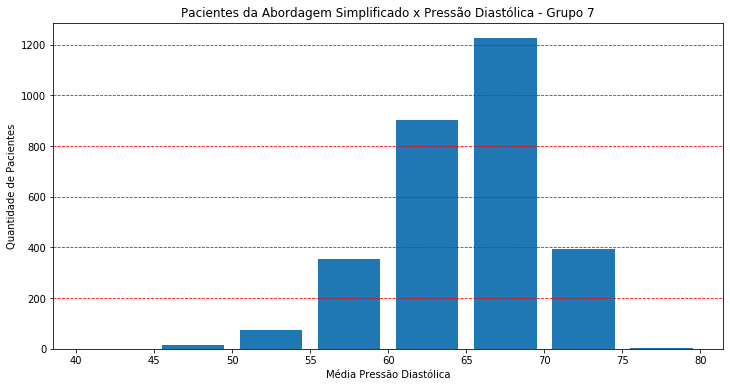

Wall time: 1min 58s


In [48]:
ls_abordagens = [abordagem_cadastro, abordagem_medidas, abordagem_medidas_masc, abordagem_medidas_fem,
                 abordagem_categorias, abordagem_estatistica, abordagem_doenca, abordagem_escolho_doenca, abordagem_simplificado]

ls_nomes = ['Dados Demográficos','Medidas','Medidas Masc','Medidas Fem','Categorias', 'Estatística', 'Doença', 'Escolho Doença','Simplificado']

%time histograma_abordagens(ls_abordagens, ls_nomes)

In [49]:
#time_labels = ['9:00','9:15','9:30','9:45','10:00','10:15','10:30','10:45','11:00','11:15','11:30','11:45','12:00','12:15',
#               '12:30','12:45', '13:00','13:15', '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', 
#               '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15',
#               '18:30', '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45', '21:00', '21:15',
#               '21:30', '21:45', '22:00', '22:15', '22:30', '22:45', '23:00', '23:30', '0:00', '0:30', '1:00', '1:30',
#               '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:15', '6:30', '6:45', '7:00',
#               '7:15', '7:30', '7:45', '8:00', '8:15', '8:30', '8:45']

In [50]:
def grafico_barras_empilhadas(df1,abordagem,demogra, duas_cores = False):
          #.reindex(df.set_index('Cluster').sum().sort_values().index, axis=1)\
    df = df1.copy()
    if  duas_cores:
        cores = [sns.color_palette("GnBu", 10)[3],sns.color_palette("GnBu", 10)[9]]
    else:
        cores = sns.color_palette("GnBu", 10)[2:]
        
    df.set_index('Cluster')\
      .reindex(df.set_index('Cluster').sum().index, axis=1)\
      .T.plot(kind='bar', stacked=True,
              colormap=ListedColormap(cores), 
              figsize=(12,6))
    plt.legend(loc=(1.04,1))
    plt.axhline(50, color="gray",linewidth=2.0, linestyle="dotted")
    plt.title(f"Percentual dos Clusters da Abordagem {abordagem} - Variável {demogra}",fontsize=16)
    plt.ylabel("Percentual")
    plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_empilhado_{abordagem.lower().replace(" ","_")}_{demogra.lower()}.svg',
               bbox_inches="tight", pad_inches=1)
    plt.show()

In [51]:
sns.color_palette("GnBu", 10)

[(0.9035447904652056, 0.9627681660899654, 0.881753171856978),
 (0.8436755094194541, 0.939038831218762, 0.8205920799692425),
 (0.7767474048442907, 0.9125259515570934, 0.7622145328719724),
 (0.6704498269896194, 0.8711880046136101, 0.7149711649365629),
 (0.5460207612456748, 0.8240522875816993, 0.7474048442906575),
 (0.41868512110726647, 0.7646289888504422, 0.7898500576701268),
 (0.29457900807381776, 0.6893656286043829, 0.8206689734717416),
 (0.19123414071510958, 0.5742099192618224, 0.7586620530565167),
 (0.09219530949634756, 0.47040369088811995, 0.7057900807381776),
 (0.03137254901960784, 0.36416762783544787, 0.6275586312956556)]

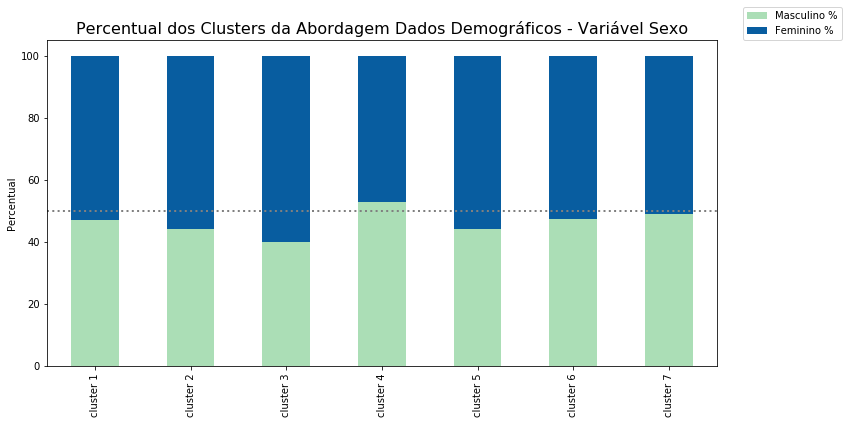

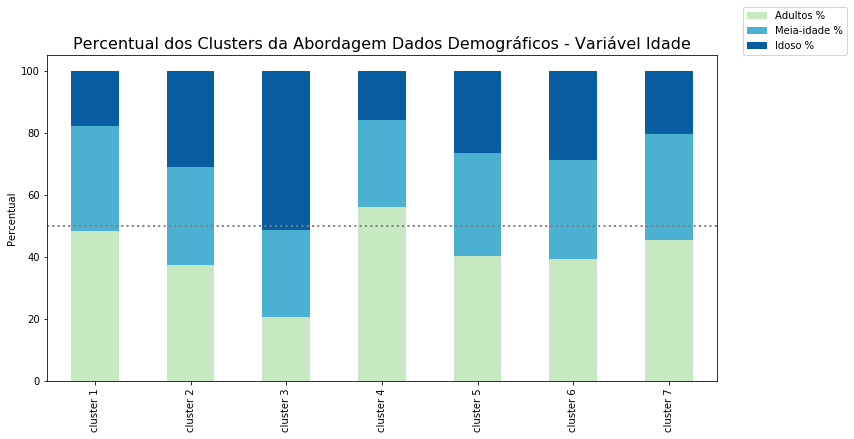

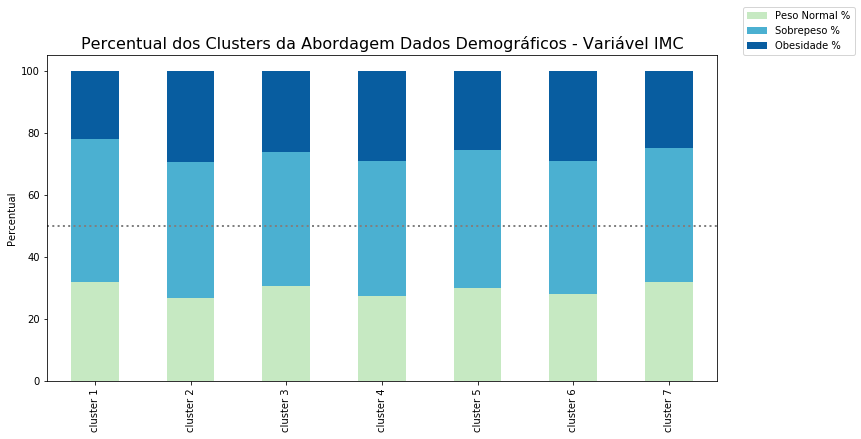

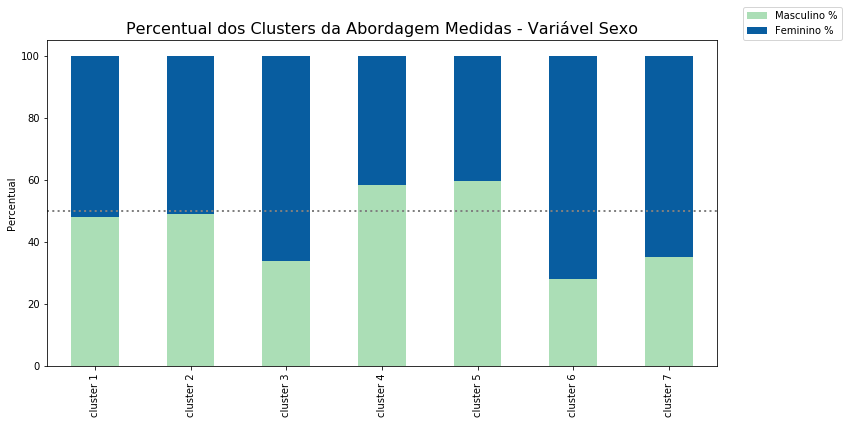

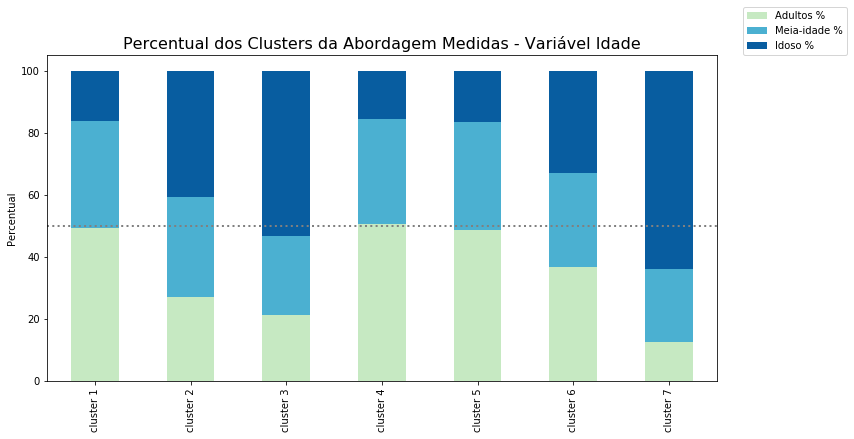

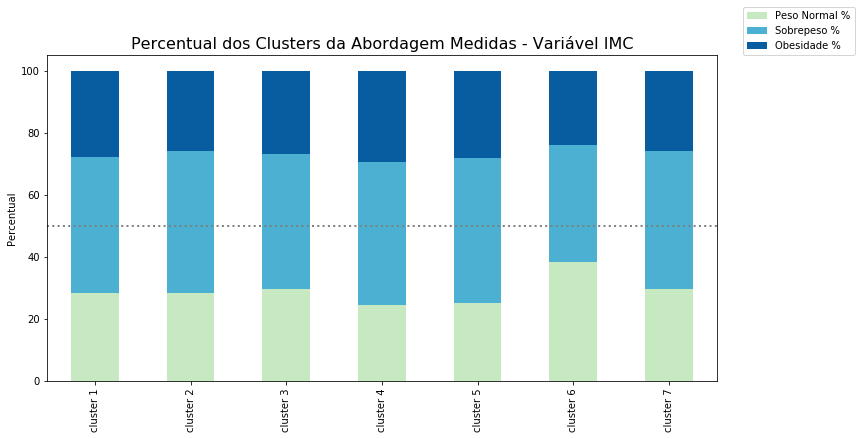

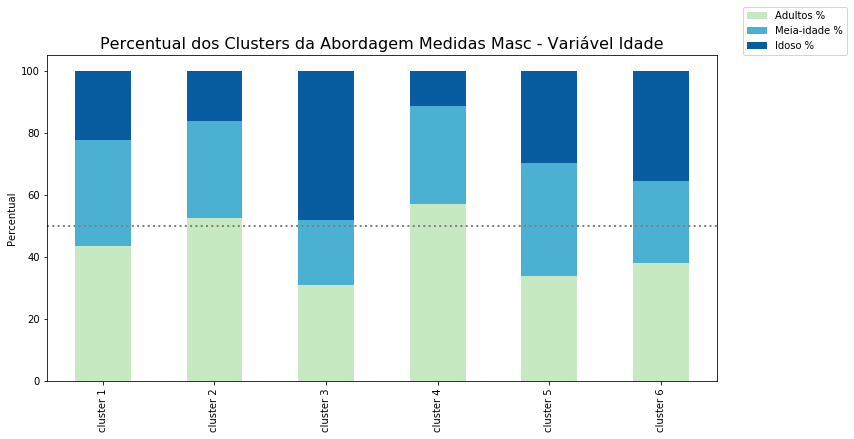

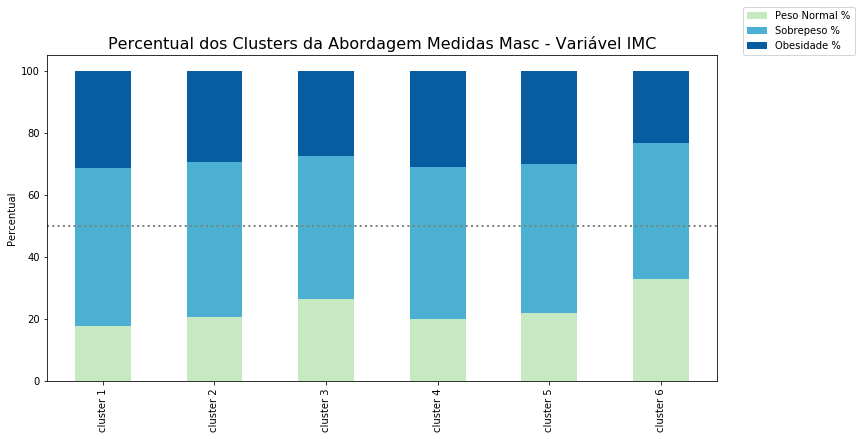

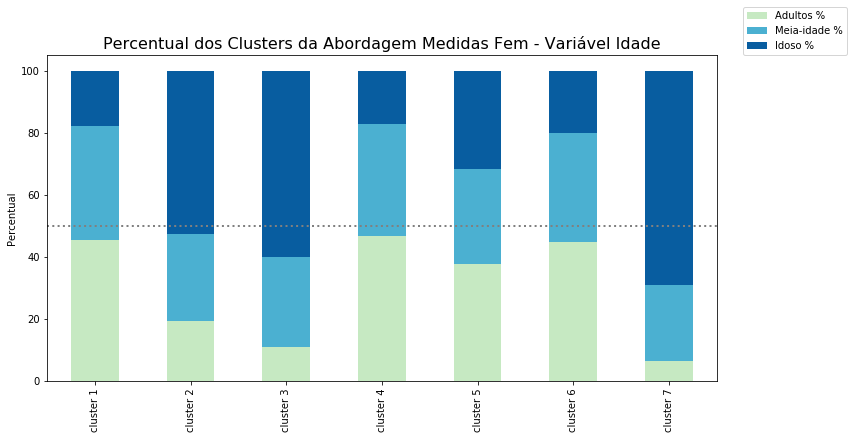

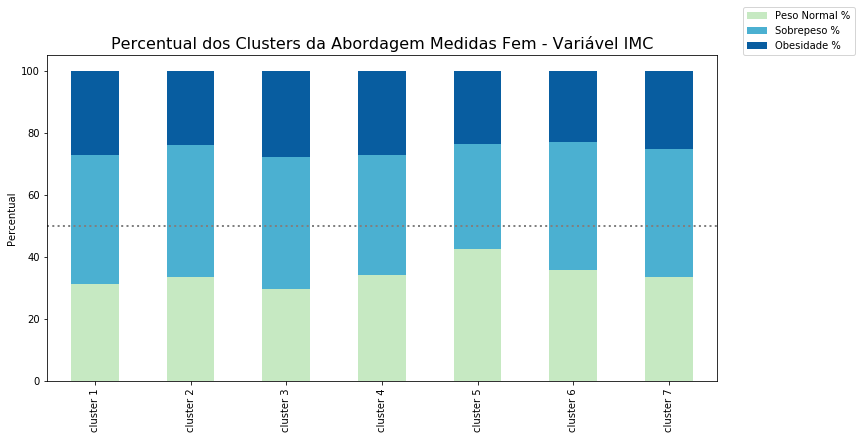

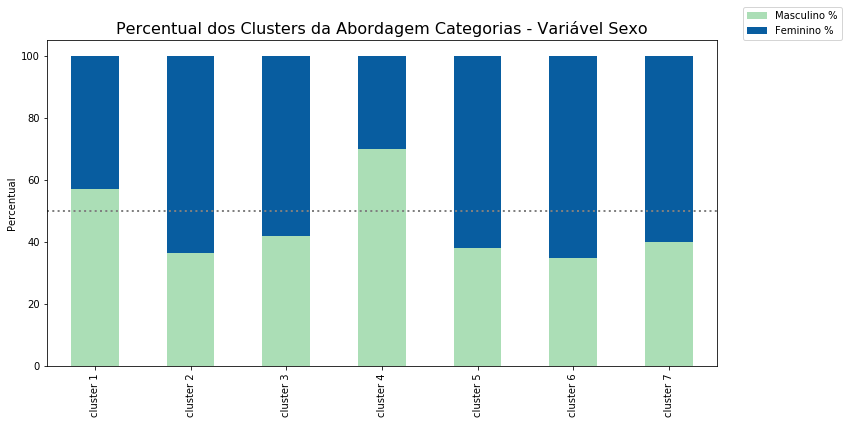

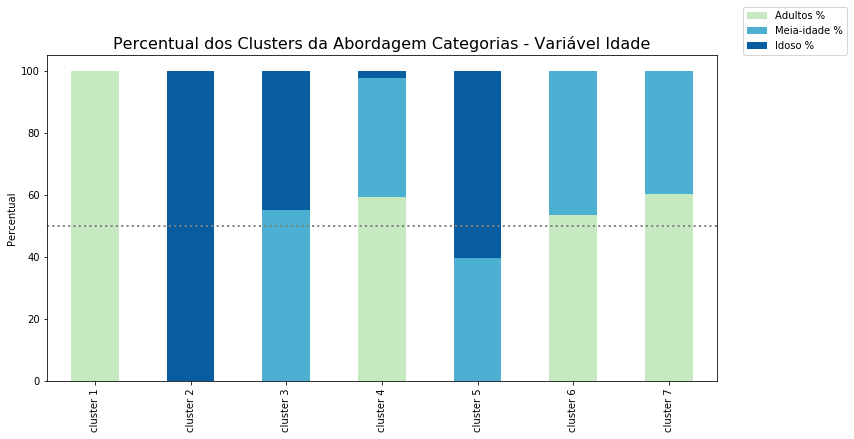

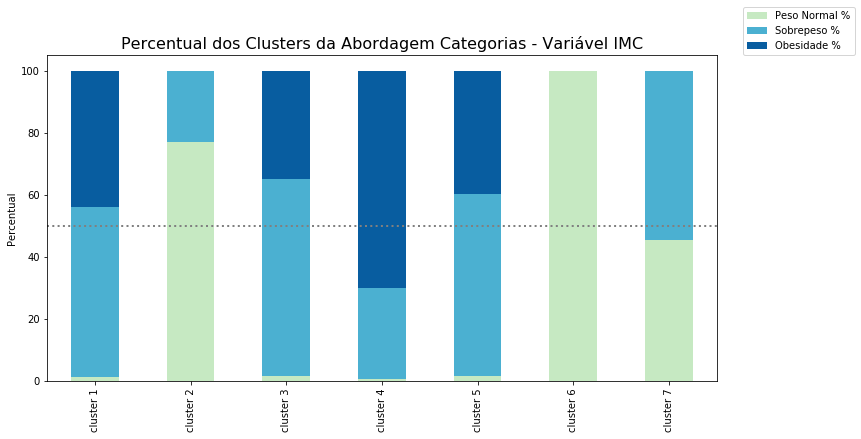

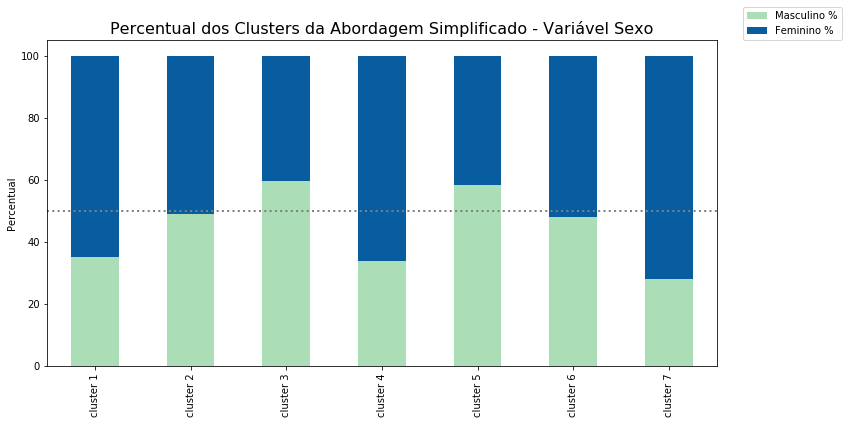

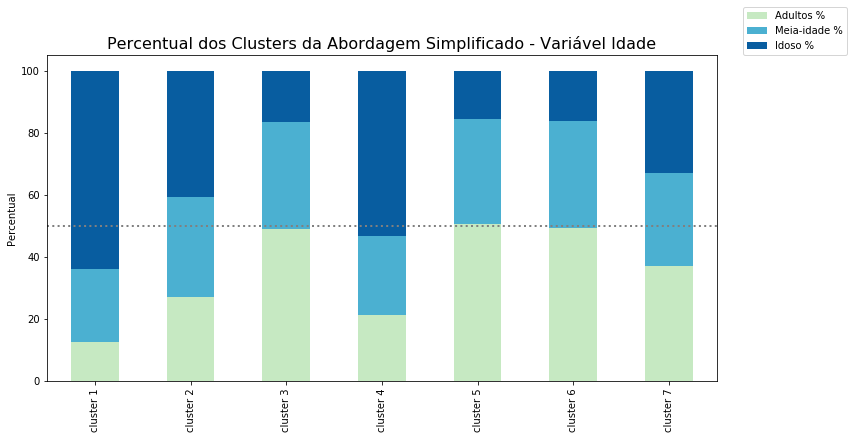

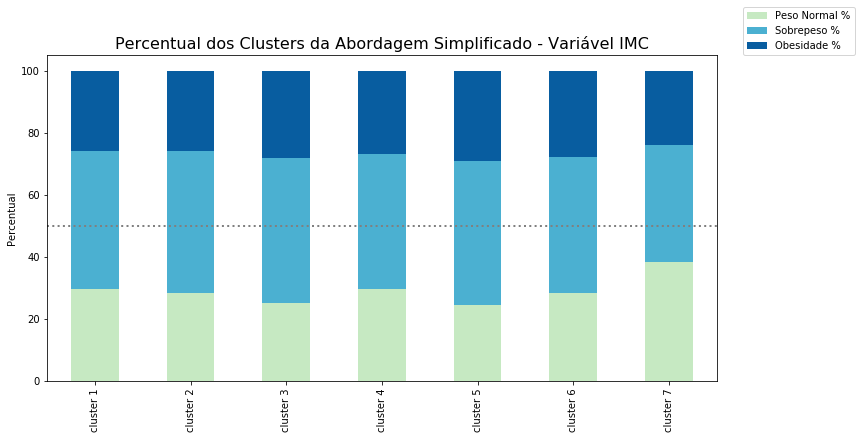

In [52]:
ls_barras_empilhadas = [qtd_dados_cadastrais,qtd_dados_medidas,qtd_dados_medidas_masc,qtd_dados_medidas_fem, qtd_categoria,qtd_dados_simplificado]
ls_nomes_barras = ['Dados Demográficos','Medidas','Medidas Masc','Medidas Fem','Categorias', 'Simplificado']
for i in range(len(ls_barras_empilhadas)):
    grafico_genero = ls_barras_empilhadas[i].set_index('Cluster').loc[['Masculino %','Feminino %'],:].reset_index().rename_axis('',axis=1)
    grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Adultos %','Meia-idade %','Idoso %'],:].reset_index().rename_axis('',axis=1)
    grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Peso Normal %', 'Sobrepeso %', 'Obesidade %'],:].reset_index().rename_axis('',axis=1)
    #grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Jovens %','Adultos %','Meia-idade %','Idoso %', 'Ancião %', 'Velhice extrema %'],:].reset_index().rename_axis('',axis=1)
    #grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Abaixo do peso %', 'Peso Normal %', 'Sobrepeso %', 'Obesidade grau 1 %', 'Obesidade grau 2 %', 'Obesidade Grau 3 %'],:].reset_index().rename_axis('',axis=1)
    
    if ls_nomes[i] != 'Medidas Masc'and ls_nomes[i] !='Medidas Fem':
        grafico_barras_empilhadas(grafico_genero,ls_nomes_barras[i],'Sexo',True)
    grafico_barras_empilhadas(grafico_idade,ls_nomes_barras[i],'Idade')
    grafico_barras_empilhadas(grafico_imc,ls_nomes_barras[i],'IMC')


In [53]:
qtd_dados_medidas_masc

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
1,QTD Pacientes,1335,2420,1194,2081,332,1345
2,QTD Pacientes %,15.33,27.79,13.71,23.9,3.81,15.45
3,Masculino,1335,2420,1194,2081,332,1345
4,Masculino %,100,100,100,100,100,100
5,Feminino,0,0,0,0,0,0
6,Feminino %,0,0,0,0,0,0
7,Adultos,580,1275,371,1186,112,511
8,Adultos %,43.45,52.69,31.07,56.99,33.73,37.99
9,Meia-idade,455,754,249,659,121,354
10,Meia-idade %,34.08,31.16,20.85,31.67,36.45,26.32


In [54]:
i

5

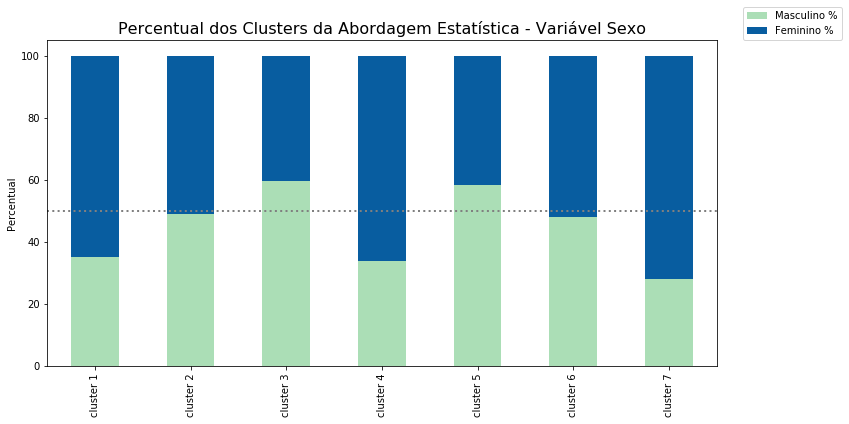

In [55]:
grafico_genero = ls_barras_empilhadas[i].set_index('Cluster').loc[['Masculino %','Feminino %'],:].reset_index().rename_axis('',axis=1)
grafico_barras_empilhadas(grafico_genero,ls_nomes[i],'Sexo',True)

In [56]:
ls_barras_empilhadas[4]

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,3367,2502,3852,2127,2268,2155,2883
2,QTD Pacientes %,17.58,13.06,20.11,11.1,11.84,11.25,15.05
3,Masculino,1924,913,1616,1486,862,751,1155
4,Masculino %,57.14,36.49,41.95,69.86,38.01,34.85,40.06
5,Feminino,1443,1589,2236,641,1406,1404,1728
6,Feminino %,42.86,63.51,58.05,30.14,61.99,65.15,59.94
7,Adultos,3367,0,0,1262,0,1152,1736
8,Adultos %,100,0,0,59.33,0,53.46,60.22
9,Meia-idade,0,0,2121,811,903,1003,1147
10,Meia-idade %,0,0,55.06,38.13,39.81,46.54,39.78


In [57]:
#   Junção de C1+C2+C3, C4+C5 e C6+C7
# 

ls_simplifica = [qtd_dados_cadastrais,qtd_dados_medidas,qtd_dados_medidas_masc,qtd_dados_medidas_fem, qtd_categoria]
ls_simplifica_nome = ['cadastro', 'medidas', 'medidas_masc', 'medidas_fem', 'categoria']

indice = 1

df_abordagem = ls_simplifica[indice]
abordagem = ls_simplifica_nome[indice]

cluster_123 = sum(df_abordagem.iloc[0,1:4]) #+ df_abordagem.iloc[1,1:] + df_abordagem.iloc[2,1:]
cluster_45 = sum(df_abordagem.iloc[0,4:6])# + df_abordagem.iloc[4,1:]
cluster_67 = sum(df_abordagem.iloc[0,6:])# + df_abordagem.iloc[6,1:]

df = pd.DataFrame()
df['Cluster'] = ['C1-C3','C4-C5','C6-C7']

df['QTD Pacientes'] = [cluster_123,cluster_45,cluster_67]
df['QTD Pacientes %'] = np.round(df['QTD Pacientes'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Masculino'] = [sum(df_abordagem.iloc[2,1:4]),sum(df_abordagem.iloc[2,4:6]),sum(df_abordagem.iloc[2,6:])]
df['Masculino %'] = np.round(df['Masculino'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Feminino'] = [sum(df_abordagem.iloc[4,1:4]),sum(df_abordagem.iloc[4,4:6]),sum(df_abordagem.iloc[4,6:])]
df['Feminino %'] = np.round(df['Feminino'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Adultos'] = [sum(df_abordagem.iloc[6,1:4]),sum(df_abordagem.iloc[6,4:6]),sum(df_abordagem.iloc[6,6:])]
df['Adultos %'] = np.round(df['Adultos'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Meia-idade'] = [sum(df_abordagem.iloc[8,1:4]),sum(df_abordagem.iloc[8,4:6]),sum(df_abordagem.iloc[8,6:])]
df['Meia-idade %'] = np.round(df['Meia-idade'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Idoso'] = [sum(df_abordagem.iloc[10,1:4]),sum(df_abordagem.iloc[10,4:6]),sum(df_abordagem.iloc[10,6:])]
df['Idoso %'] = np.round(df['Idoso'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Peso Normal'] = [sum(df_abordagem.iloc[12,1:4]),sum(df_abordagem.iloc[12,4:6]),sum(df_abordagem.iloc[12,6:])]
df['Peso Normal %'] = np.round(df['Peso Normal'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Sobrepeso'] = [sum(df_abordagem.iloc[14,1:4]),sum(df_abordagem.iloc[14,4:6]),sum(df_abordagem.iloc[14,6:])]
df['Sobrepeso %'] = np.round(df['Sobrepeso'] / np.sum(df['QTD Pacientes']) * 100,2)

df['Obesidade'] = [sum(df_abordagem.iloc[16,1:4]),sum(df_abordagem.iloc[16,4:6]),sum(df_abordagem.iloc[16,6:])]
df['Obesidade %'] = np.round(df['Obesidade'] / np.sum(df['QTD Pacientes']) * 100,2)

df = df.T
df.columns = df.iloc[0,:]
df = df.iloc[1:,:]

df.to_excel(DIR_ABORDAGENS / "simplifica" / f"{algoritmo.upper()}_simplifica_clusters_approach_{abordagem}.xlsx", index = False)

In [58]:
df

Cluster,C1-C3,C4-C5,C6-C7
QTD Pacientes,7710,6728,4716
QTD Pacientes %,40.25,35.13,24.62
Masculino,3307,3955,1445
Masculino %,17.27,20.65,7.54
Feminino,4403,2773,3271
Feminino %,22.99,14.48,17.08
Adultos,2840,3363,1314
Adultos %,14.83,17.56,6.86
Meia-idade,2390,2292,1303
Meia-idade %,12.48,11.97,6.8


##  Abordagem 2: Medidas
## Gera arquivo único de todos os pacientes com dados completos e seus clusters 

In [59]:
df_medidas_completo = pd.read_csv(DIRETORIO_PRINCIPAL / "KMeansRandom/KMEANS_approach_medidas_todos_pacientes.csv",
                                  sep=';', encoding='latin1')

In [60]:
def genero_0_1(genero):
    if genero.lower() == 'f':
        return 0
    else:
        return 1
    
def nova_abordagem(df):
    saida = df.loc[:,['numero_identificacao','genero','idade','IMC']]
    saida['genero'] = saida['genero'].apply(genero_0_1)
    for i in range(len(set(df['grupo']))):
        ls_grupo = []
        for paciente in df['grupo']:
            if paciente == i + 1:
                ls_grupo.append(1)
            else:
                ls_grupo.append(0)
        saida[f'C{i+1}'] = ls_grupo
    return saida
    

In [61]:
df_saida = nova_abordagem(df_medidas_completo)

In [62]:
df_saida.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'todos_pacientes_clusters.csv', 
             sep=';',index=False,encoding='UTF-8')

df_saida

,numero_identificacao,genero,idade,IMC,C1,C2,C3,C4,C5,C6,C7
0,4,1,94.0,33.2,0,0,0,0,0,1,0
1,5,1,70.0,29.4,0,0,0,0,0,1,0
2,6,1,19.0,25.8,0,0,0,0,0,0,1
3,7,0,40.0,24.2,0,0,0,0,0,0,1
4,8,1,28.0,40.6,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1,47.0,27.5,0,1,0,0,0,0,0
19150,21787,1,49.0,26.9,0,0,0,0,1,0,0
19151,21788,0,35.0,33.3,0,0,0,0,0,1,0
19152,21792,0,68.0,25.0,1,0,0,0,0,0,0


In [63]:
df_medidas_completo

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,grupo,data_exame,sist 9:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,M,94.0,85.0,160,33.2,6,2018-09-10 12:25:23,105.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,1948-10-07,M,70.0,80.0,165,29.4,6,2018-12-26 07:39:41,103.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,1999-03-23,M,19.0,100.0,197,25.8,7,2018-12-26 08:06:19,147.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1978-01-26,F,40.0,65.0,"1,64",24.2,7,2018-12-26 08:19:06,140.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,1990-03-07,M,28.0,120.0,172,40.6,1,2018-12-26 08:26:59,113.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1972-11-25,M,47.0,75.0,165,27.5,2,2020-09-10 16:03:08,163.0,...,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60,1.134475
19150,21787,1970-10-19,M,49.0,90.0,183,26.9,5,2020-09-10 16:21:02,114.0,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
19151,21788,1985-03-15,F,35.0,93.0,167,33.3,6,2020-09-10 16:44:53,107.0,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243
19152,21792,1952-04-21,F,68.0,64.0,160,25.0,1,2020-09-10 17:25:50,94.0,...,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13,1.251898


In [64]:
def faixas_imc(imc):
    classes = ["Peso Normal","Obesidade"]
    intervalos = [(0, 30),(30, 1000)]
    #classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = ["baixo peso","normal","sobrepeso","obesidade grau I","obesidade grau II","obesidade Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        
def faixas_imc_classe(imc):
    classes = [1, 2]
    intervalos = [(0, 30),(30, 1000)]
    #classes = [1, 2, 3]
    #intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Adultos","Idoso"]
    intervalos = [(0, 65),(65, 200)]
    #classes = ["Adultos","Meia-idade","Idoso"]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias_classe(idade):
    classes = [1, 2]
    intervalos = [(0, 65),(65, 200)]
    #classes = [1, 2, 3]
    #intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def genero_binario(genero):
    if genero == 'F':
        return 0
    else:
        return 1

def verifica_grupo(coluna,grupo):
    saida = list()
    
    for linha in coluna:
        if linha == grupo:
            saida.append(1)
        else:
            saida.append(0)
    return saida

genero_1_0 = {'genero':{'F':0,'M':1}}

def modifica_df(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    grupos  = set(df['grupo'])
    for grupo in grupos:
        df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df

def modifica_df_cluster(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    #grupos  = set(df['grupo'])
    #for grupo in grupos:
    #    df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df['Cluster'] = df['grupo']
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_cluster_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df


def nova_abordagem_simplificado(df):
    saida = df.loc[:,['numero_identificacao','genero','idade','IMC']]
    saida['idade'] = saida['idade'].apply(faixas_etarias_classe)
    saida['IMC'] = saida['IMC'].apply(faixas_imc_classe)
    saida['genero'] = saida['genero'].apply(genero_binario)
    for i in range(len(set(df['grupo']))):
        ls_grupo = []
        for paciente in df['grupo']:
            if paciente == i + 1:
                ls_grupo.append(1)
            else:
                ls_grupo.append(0)
        saida[f'C{i+1}'] = ls_grupo
    return saida

In [65]:
df_saida_categoria = nova_abordagem_simplificado(df_medidas_completo)
df_saida_categoria

,numero_identificacao,genero,idade,IMC,C1,C2,C3,C4,C5,C6,C7
0,4,1,2,2,0,0,0,0,0,1,0
1,5,1,2,1,0,0,0,0,0,1,0
2,6,1,1,1,0,0,0,0,0,0,1
3,7,0,1,1,0,0,0,0,0,0,1
4,8,1,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1,1,1,0,1,0,0,0,0,0
19150,21787,1,1,1,0,0,0,0,1,0,0
19151,21788,0,1,2,0,0,0,0,0,1,0
19152,21792,0,2,1,1,0,0,0,0,0,0


In [66]:
df_saida_categoria.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'todos_pacientes_cat_simplifica_clusters.csv', 
             sep=';',index=False,encoding='UTF-8')
df_saida_categoria

,numero_identificacao,genero,idade,IMC,C1,C2,C3,C4,C5,C6,C7
0,4,1,2,2,0,0,0,0,0,1,0
1,5,1,2,1,0,0,0,0,0,1,0
2,6,1,1,1,0,0,0,0,0,0,1
3,7,0,1,1,0,0,0,0,0,0,1
4,8,1,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1,1,1,0,1,0,0,0,0,0
19150,21787,1,1,1,0,0,0,0,1,0,0
19151,21788,0,1,2,0,0,0,0,0,1,0
19152,21792,0,2,1,1,0,0,0,0,0,0


## Análise para comparar entre os Clusters a covariável Obesidade 

In [67]:
#  Verifica categoria binária de NÃO obeso  = 0 e
#                                    obeso = 1
#
def obesidade_0_1(IMC):
    if IMC < 30:
        return 0
    else:
        return 1

In [68]:
df_medidas_obeso = df_medidas_completo.loc[:,:'IMC']
df_medidas_obeso['obeso'] = df_medidas_completo['IMC'].apply(obesidade_0_1)
df_medidas_obeso = pd.concat([df_medidas_obeso,df_medidas_completo.loc[:,'grupo':]],axis=1)
df_medidas_obeso

,numero_identificacao,data_nascimento,genero,idade,peso,altura,IMC,obeso,grupo,data_exame,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,1923-10-05,M,94.0,85.0,160,33.2,1,6,2018-09-10 12:25:23,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,1948-10-07,M,70.0,80.0,165,29.4,0,6,2018-12-26 07:39:41,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,1999-03-23,M,19.0,100.0,197,25.8,0,7,2018-12-26 08:06:19,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1978-01-26,F,40.0,65.0,"1,64",24.2,0,7,2018-12-26 08:19:06,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,1990-03-07,M,28.0,120.0,172,40.6,1,1,2018-12-26 08:26:59,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,21786,1972-11-25,M,47.0,75.0,165,27.5,0,2,2020-09-10 16:03:08,...,116.0,12224.5,9265.0,2439.0,474.5,18.66,14.80,49,60,1.134475
19150,21787,1970-10-19,M,49.0,90.0,183,26.9,0,5,2020-09-10 16:21:02,...,85.0,10970.0,6819.0,3319.0,738.0,17.22,13.67,32,27,1.045759
19151,21788,1985-03-15,F,35.0,93.0,167,33.3,1,6,2020-09-10 16:44:53,...,62.0,9245.0,4935.5,3556.0,713.5,14.36,8.29,14,26,1.029243
19152,21792,1952-04-21,F,68.0,64.0,160,25.0,0,1,2020-09-10 17:25:50,...,68.0,8989.5,5660.0,2815.5,460.0,14.14,9.38,19,13,1.251898


## Abordagem Simplificado 2

In [69]:
# Quantidade da abordagem por simplificado2
try:
    qtd_dados_simplificado2 = pd.DataFrame()

    qtd_dados_simplificado2['Cluster'] = [f'cluster {n}' for n in range(1,len(abordagem_simplificado) + 1)]
    qtd_dados_simplificado2['QTD Pacientes'] = [len(n) for n in abordagem_simplificado]
    total_pacientes = np.sum([len(n) for n in abordagem_simplificado])
    qtd_dados_simplificado2['QTD Pacientes %'] = [np.round(len(n)/total_pacientes*100,2) for n in abordagem_simplificado]
    lista_total_grupos = [len(i) for i in abordagem_simplificado]
    lista_total_grupos = np.array(lista_total_grupos)
    lista_faixa_genero = ['Masculino','Masculino %','Feminino','Feminino %']

    colunas_genero = [[],[],[],[],[],[]]
    for grupo in range(len(abordagem_simplificado)):
        resultado = faixa_genero(abordagem_simplificado[grupo])
        colunas_genero[0].append(resultado[0])
        colunas_genero[1].append(resultado[1])
        colunas_genero[2].append(resultado[2])
        colunas_genero[3].append(resultado[3])

    for faixa in range(len(lista_faixa_genero)):
        qtd_dados_simplificado2[lista_faixa_genero[faixa]] = colunas_genero[faixa]

    lista_faixa_idade = ["Adultos","Idoso"]
    #lista_faixa_idade = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]


    for faixa in range(len(lista_faixa_idade)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['idade'].apply(faixas_etarias) == lista_faixa_idade[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado2[lista_faixa_idade[faixa]] = lista_grupos
        qtd_dados_simplificado2[f'{lista_faixa_idade[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)


    lista_faixa_imc = ["Peso Normal","Obesidade"]
    #lista_faixa_imc = ["Abaixo do peso","Peso Normal","Sobrepeso","Obesidade grau 1","Obesidade grau 2","Obesidade Grau 3"]
    
#################################################################################################
    for faixa in range(len(lista_faixa_imc)):
        lista_grupos = list()
        
        for grupo in range(len(abordagem_simplificado)):
            lista_grupos.append(len(abordagem_simplificado[grupo][abordagem_simplificado[grupo]['IMC'].apply(faixas_imc) == lista_faixa_imc[faixa]]))
        np.array(lista_grupos)
        qtd_dados_simplificado2[lista_faixa_imc[faixa]] = lista_grupos
        qtd_dados_simplificado2[f'{lista_faixa_imc[faixa]} %'] = np.round(lista_grupos / lista_total_grupos * 100, 2)
    #print('1')
    #qtd_dados_simplificado2['Não obeso'] = qtd_dados_simplificado2['Peso Normal'] + qtd_dados_simplificado2['Sobrepeso']
    #qtd_dados_simplificado2['Não obeso %'] =  np.round(qtd_dados_simplificado2['Não obeso'] / lista_total_grupos * 100, 2)
    
    lista_calculo = ['Media Sistolica em 24h','Media Diastolica em 24h','Media Sistolica Daytime','Media Sistolica Nighttime',
                    'Media Diastolica Daytime','Media Diastolica Nighttime','Variancia Sistolica em 24h','Variancia Diastolica em 24h',
                    'Mediana Sistolica em 24h', 'Mediana Diastolica em 24h','AUC Sistolica em 24h','AUC Diastolica em 24h',
                     'DP Sistolica em 24h','DP Diastolica em 24h']

    funcao = [media_sistolica,media_diastolica,media_sistolica_dia,media_sistolica_noite,media_diastolica_dia,
               media_diastolica_noite,variancia_sistolica,variancia_diastolica,mediana_sistolica,mediana_diastolica,
              auc_sistolica,auc_diastolica,desvio_sistolica,desvio_diastolica]
    
    for analise in range(len(lista_calculo)):
        lista_analise = list()
        for grupo in range(len(abordagem_simplificado)):
            lista_analise.append(funcao[analise](abordagem_simplificado[grupo]))

        qtd_dados_simplificado2[lista_calculo[analise]] = lista_analise
   
    lista_descenso = []
    for grupo in range(len(abordagem_simplificado)):
        lista_descenso.append(descenso_noturno(abordagem_simplificado[grupo]))

    qtd_dados_simplificado2['Descenso Noturno %'] = lista_descenso
    qtd_dados_simplificado2_sem_T = qtd_dados_simplificado2
    qtd_dados_simplificado2 = qtd_dados_simplificado2.T.reset_index()
    qtd_dados_simplificado2.columns = qtd_dados_simplificado2.iloc[0,:]
    qtd_dados_simplificado2 = qtd_dados_simplificado2.iloc[1:,:]
    #  grava arquivo com qtd e % das doenças em cada grupo
    qtd_dados_simplificado2.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado2.csv", 
                           sep=";", encoding="latin1", index=False)
    
except:
    pass

In [70]:
qtd_dados_simplificado2

,Cluster,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
1,QTD Pacientes,1747,742,2297,2842,4431,4125,2970
2,QTD Pacientes %,9.12,3.87,11.99,14.84,23.13,21.54,15.51
3,Masculino,616,364,1367,958,2588,1985,829
4,Masculino %,35.26,49.06,59.51,33.71,58.41,48.12,27.91
5,Feminino,1131,378,930,1884,1843,2140,2141
6,Feminino %,64.74,50.94,40.49,66.29,41.59,51.88,72.09
7,Adultos,630,440,1915,1332,3740,3457,1988
8,Adultos %,36.06,59.3,83.37,46.87,84.41,83.81,66.94
9,Idoso,1117,302,382,1510,691,668,982
10,Idoso %,63.94,40.7,16.63,53.13,15.59,16.19,33.06


In [71]:
qtd_dados_simplificado2_modificado = qtd_dados_simplificado2.loc[[1,3,5,7,9,11,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],:]
qtd_dados_simplificado2_modificado.index = np.arange(len(qtd_dados_simplificado2_modificado))
percent = qtd_dados_simplificado2.loc[[2,4,6,8,10,12,14],:]
percent.index = np.arange(len(percent))
percent.columns = ['Cluster', 'C1 (%)', 'C2 (%)', 'C3 (%)', 'C4 (%)','C5 (%)', 'C6 (%)', 'C7 (%)']
aux = pd.concat([qtd_dados_simplificado2_modificado.loc[:,:'cluster 1'],percent.iloc[:,1]],axis=1)

for i in range(len(percent.columns)-2):
    aux = pd.concat([aux, qtd_dados_simplificado2_modificado.loc[:,f'cluster {i+2}'],
                                                    percent.iloc[:,i+2]],axis=1)
qtd_dados_simplificado2_modificado = aux
qtd_dados_simplificado2_modificado.to_csv(DIR_ABORDAGENS /  f"{algoritmo.upper()}_qtd_approach_simplificado_percent.csv", 
                           sep=";", encoding="latin1", index=False)
    

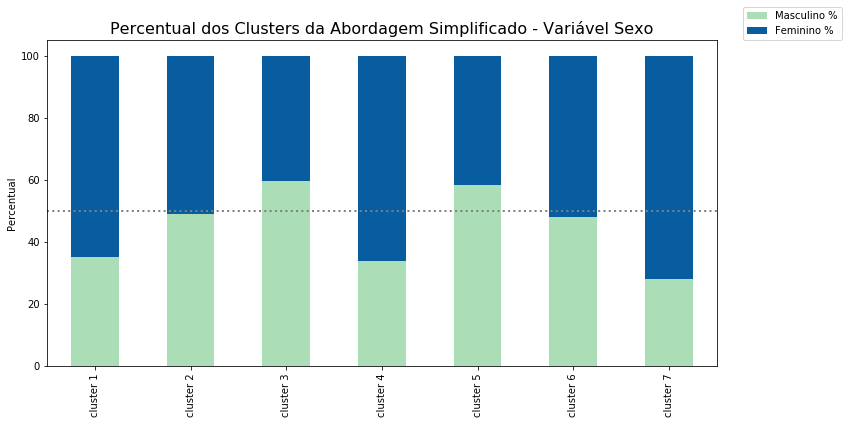

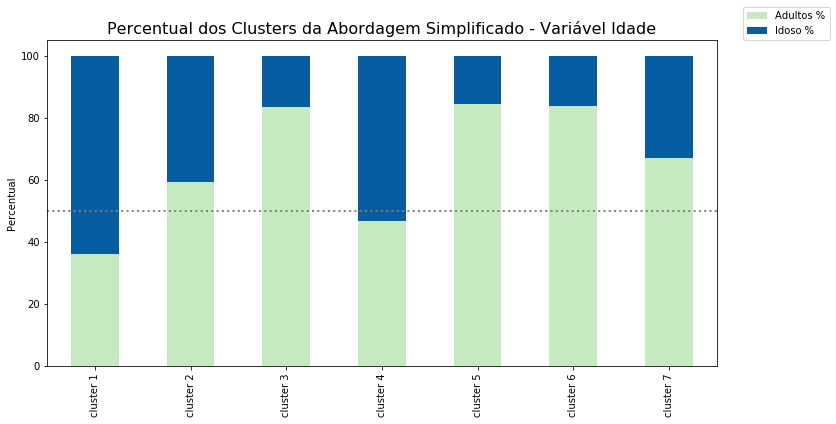

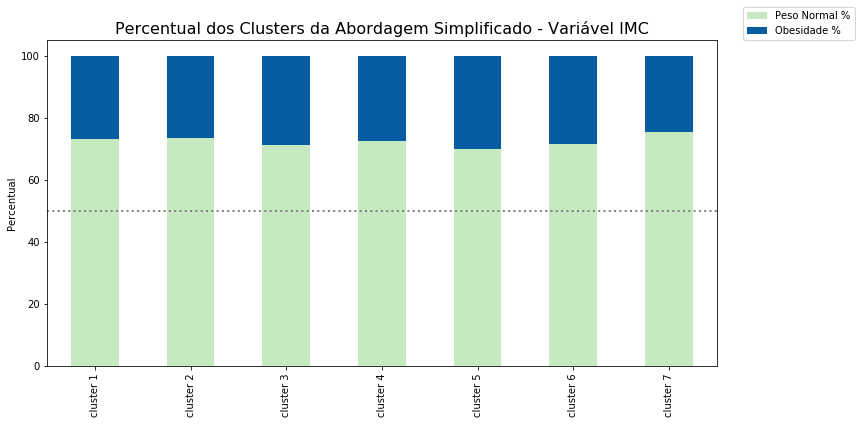

In [72]:
grafico_genero = qtd_dados_simplificado2.set_index('Cluster').loc[['Masculino %','Feminino %'],:].reset_index().rename_axis('',axis=1)
grafico_idade = qtd_dados_simplificado2.set_index('Cluster').loc[['Adultos %','Idoso %'],:].reset_index().rename_axis('',axis=1)
grafico_imc = qtd_dados_simplificado2.set_index('Cluster').loc[['Peso Normal %', 'Obesidade %'],:].reset_index().rename_axis('',axis=1)
#grafico_idade = ls_barras_empilhadas[i].set_index('Cluster').loc[['Jovens %','Adultos %','Meia-idade %','Idoso %', 'Ancião %', 'Velhice extrema %'],:].reset_index().rename_axis('',axis=1)
#grafico_imc = ls_barras_empilhadas[i].set_index('Cluster').loc[['Abaixo do peso %', 'Peso Normal %', 'Sobrepeso %', 'Obesidade grau 1 %', 'Obesidade grau 2 %', 'Obesidade Grau 3 %'],:].reset_index().rename_axis('',axis=1)

if ls_nomes[i] != 'Medidas Masc'and ls_nomes[i] !='Medidas Fem':
    grafico_barras_empilhadas(grafico_genero,'Simplificado','Sexo',True)
grafico_barras_empilhadas(grafico_idade,'Simplificado','Idade')
grafico_barras_empilhadas(grafico_imc,'Simplificado','IMC')

In [73]:
def histograma_simplificado(ls_abordagens,nome_abordagem):
    for i in range(len(ls_abordagens)):
        media = ls_abordagens[i].loc[:,'diast 9:00':'diast 8:45'].apply( (lambda linha: np.average(linha.dropna()) ), axis=1)
        intervalo = range(int((min(media)//10)*10), int((max(media)//10 + 1)*10) + 1, 5)
        plt.figure(figsize=(12,6))
        plt.grid(axis="y", linestyle="--", color="red")
        plt.hist(media, bins=intervalo, rwidth=0.8)
        plt.xticks(intervalo)
        plt.xlabel('Média Pressão Diastólica')
        plt.ylabel('Quantidade de Pacientes')
        plt.title(f"Pacientes da Abordagem {nome_abordagem} x Pressão Diastólica - Grupo {i + 1}")
        plt.savefig(DIR_ABORDAGENS / "graficos_analise" / f'grafico_histograma_diastolica_{nome_abordagem.lower().replace(" ","_")}_grupo{i + 1}.svg',
               bbox_inches="tight", pad_inches=1)
        plt.show()

In [74]:
df_medidas_obeso.to_csv(path_or_buf = DIR_ABORDAGENS / "correlacao_medidas" / 'obeso_naoobeso.csv', 
             sep=';',index=False,encoding='UTF-8')

##  Abordagem 2: Medidas
## Grava arquivo com simplificação das covariáveis

In [75]:
# Gênero, Idade e IMC reunidos em 2 categorias apenas
# para simplificar a análise e o cálculo do p_value
#  Frequência de Obesos (IMC>=30) e Não Obesos (IMC<30) em cada cluster
#  
#?????????????????????????????????????????????????????????????????????????????????????????????

## Verifica quais diagnósticos em cada cluster, frequência e prevalência

In [76]:
list(abordagem_medidas[0].loc[:,'Hipotensao':'Normotenso'].columns)

['Hipotensao',
 'Sistolica Isolada',
 'Diastolica Isolada',
 'Dipping',
 'Non Dipping',
 'Extreme Dipping',
 'Reverse Dipping',
 'Morning Surge',
 'Masked',
 'Whitecoat',
 'Normotenso']

In [77]:
def qtd_diagnosticos(df):
    ls_doencas = [   'Hipotensao',
                     'Sistolica Isolada',
                     'Diastolica Isolada',
                     'Dipping',
                     'Non Dipping',
                     'Extreme Dipping',
                     'Reverse Dipping',
                     'Morning Surge',
                     'Masked',
                     'Whitecoat',
                     'Normotenso']
    
    saida = pd.DataFrame()
    coluna = ls_doencas.copy()
    coluna.append('Total por Doenca')
    coluna.append('Total de pacientes')
    saida['Doencas'] = coluna
    for cluster in range(len(df)):
        ls_qtd = []
        for doenca in ls_doencas:
            ls_qtd.append(len(df[cluster][df[cluster][doenca] == True]))
        total = np.sum(ls_qtd)
        ls_qtd.append(total)
        ls_qtd.append(len(df[cluster]))
        saida[f'C{cluster + 1}'] = np.array(ls_qtd)
        percentual = list(np.round(saida[f'C{cluster + 1}'][:-1] / total * 100, 2))
        percentual.append(100)
        saida[f'C{cluster + 1} %'] = percentual
    return saida

In [78]:
saida = qtd_diagnosticos(abordagem_medidas)
saida

,Doencas,C1,C1 %,C2,C2 %,C3,C3 %,C4,C4 %,C5,C5 %,C6,C6 %,C7,C7 %
0,Hipotensao,4095,37.04,381,19.51,2833,36.09,3958,30.94,1413,22.54,2969,37.02,1608,31.80
1,Sistolica Isolada,9,0.08,0,0.00,8,0.10,3,0.02,0,0.00,0,0.00,3,0.06
2,Diastolica Isolada,29,0.26,0,0.00,7,0.09,44,0.34,1,0.02,0,0.00,0,0.00
3,Dipping,1540,13.93,174,8.91,742,9.45,1743,13.62,817,13.03,917,11.43,361,7.14
4,Non Dipping,1917,17.34,336,17.20,1309,16.68,1897,14.83,1007,16.06,1435,17.89,782,15.47
5,Extreme Dipping,271,2.45,51,2.61,126,1.61,411,3.21,202,3.22,183,2.28,72,1.42
6,Reverse Dipping,398,3.60,181,9.27,665,8.47,379,2.96,272,4.34,433,5.40,532,10.52
7,Morning Surge,748,6.76,98,5.02,463,5.90,887,6.93,350,5.58,527,6.57,242,4.79
8,Masked,9,0.08,0,0.00,10,0.13,10,0.08,0,0.00,2,0.02,0,0.00
9,Whitecoat,2035,18.40,732,37.48,1685,21.47,3461,27.05,2207,35.20,1555,19.39,1456,28.80


In [79]:
abordagem_medidas[0].describe()

,numero_identificacao,idade,peso,IMC,grupo,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
count,4126.000000,4126.000000,4126.000000,4126.000000,4126.0,4126.000000,4126.00000,4126.000000,4126.000000,4126.000000,...,4126.000000,4126.000000,4126.000000,4126.000000,4126.00000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000
mean,11117.764178,51.135967,78.506544,27.933858,1.0,117.939166,118.28381,118.539021,118.585070,118.692681,...,75.736912,9297.801260,6086.201285,2640.910567,528.94062,11.358856,10.340000,9.090887,11.637906,1.091381
std,6330.958881,13.559983,16.377940,4.710439,0.0,11.406301,11.41517,11.291007,11.323685,11.223507,...,3.891753,263.480721,267.589859,304.078626,68.80076,2.540503,2.062852,5.385883,6.221625,0.072328
min,8.000000,18.000000,37.000000,12.100000,1.0,66.000000,72.00000,65.000000,65.000000,65.000000,...,62.000000,8348.000000,5335.500000,1698.500000,332.50000,4.570000,3.980000,0.000000,0.000000,0.833208
25%,5658.500000,41.000000,67.000000,24.700000,1.0,111.000000,111.00000,112.000000,111.000000,112.000000,...,73.000000,9120.125000,5895.625000,2427.000000,481.50000,9.580000,8.902500,5.000000,7.000000,1.043347
50%,11190.000000,51.000000,77.000000,27.200000,1.0,118.000000,118.00000,118.000000,118.000000,118.000000,...,76.000000,9316.000000,6080.000000,2646.750000,528.00000,11.090000,10.220000,8.000000,11.000000,1.089053
75%,16692.250000,61.000000,88.000000,30.500000,1.0,125.000000,125.00000,125.000000,125.000000,125.000000,...,78.000000,9493.500000,6274.375000,2861.500000,575.00000,12.810000,11.630000,12.000000,15.000000,1.137844
max,21792.000000,92.000000,180.000000,54.700000,1.0,186.000000,176.00000,179.000000,198.000000,194.000000,...,90.000000,9999.000000,6954.000000,3470.500000,808.50000,33.020000,23.550000,54.000000,49.000000,1.607116


In [80]:
len(abordagem_medidas[0][abordagem_medidas[0]['Hipotensao'] == True])

4095